In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as ss
plt.rcParams['axes.grid'] = True

### Weather data for CCAT

In [2]:
wd = pd.read_csv("ccat_site_weather_data_2006_to_2014.csv", parse_dates=['datetime'])
wd

datetime  temperature_C  pressure_mbar  \
0      2006-05-11 21:14:10+00:00           -0.8          519.2   
1      2006-05-11 21:29:10+00:00           -0.5          519.2   
2      2006-05-11 21:44:10+00:00           -1.4          519.2   
3      2006-05-11 21:59:10+00:00           -2.8          519.2   
4      2006-05-11 22:14:10+00:00           -3.7          519.1   
...                          ...            ...            ...   
298918 2014-11-30 16:44:10+00:00            0.8          518.5   
298919 2014-11-30 16:59:10+00:00            1.1          518.5   
298920 2014-11-30 17:14:10+00:00            1.2          518.5   
298921 2014-11-30 17:29:10+00:00            1.0          518.4   
298922 2014-11-30 17:44:10+00:00            1.1          518.3   

        relative_humidity  wind_speed_avg_mps  wind_speed_peak_mps  \
0                      11                 0.5                  2.8   
1                      11                 0.1                  1.3   
2                      12                 0.0                  1.2   
3                      13                 0.8                  2.1   
4                      13                 1.4                  2.5   
...                   ...                 ...                  ...   
298918                 11                 2.1                 13.0   
298919                 11                 1.8                 12.2   
298920                 11                 1.9                 14.1   
298921                 11                 1.2                 12.0   
298922                 11                 3.4                 15.7   

        wind_direction_avg_deg  wind_direction_stddev_deg  
0                          155                         64  
1                          121                         59  
2                          188                         65  
3                           79                         23  
4                           93                         16  
...                        ...                        ...  
298918                     223                         80  
298919                     236                         80  
298920                     222                         85  
298921                     195                         92  
298922                     241                         70  

[298923 rows x 8 columns]

In [5]:
wd.loc['2006-06-1':'2006-11-1']

Empty DataFrame
Columns: [datetime, temperature_C, pressure_mbar, relative_humidity, wind_speed_avg_mps, wind_speed_peak_mps, wind_direction_avg_deg, wind_direction_stddev_deg]
Index: []

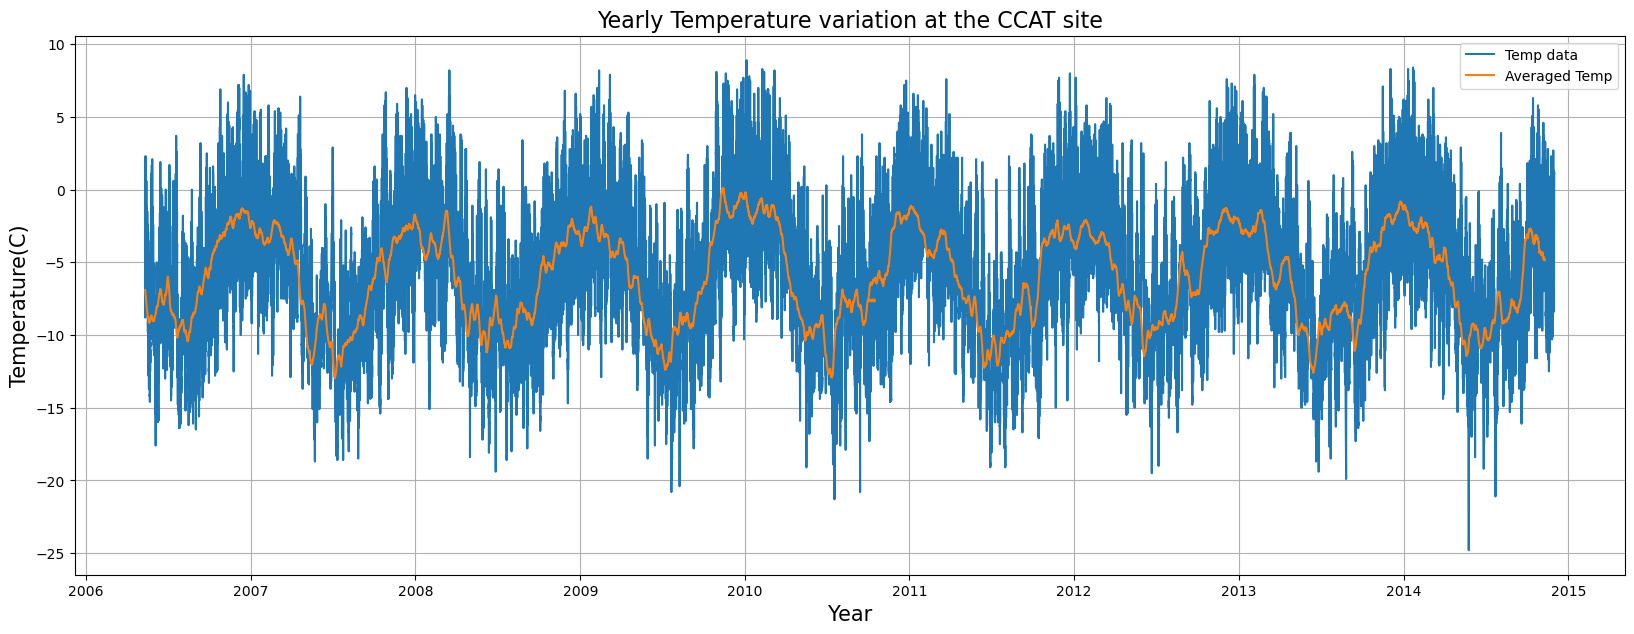

In [8]:
# running average of the data
window =2000 
t_avg =[]
temp_data = np.array(wd.temperature_C)

for i in range(len(temp_data) - window + 1):
    t_avg.append(np.mean(temp_data[i:i+window]))

plt.figure(figsize=(20,7))
plt.xlabel("Year",size=15)
plt.ylabel("Temperature(C)",size=15)
plt.title("Yearly Temperature variation at the CCAT site",size=16)
plt.plot(wd.datetime,wd.temperature_C,label="Temp data")
plt.plot(wd.datetime[0:len(t_avg)],t_avg,label="Averaged Temp")
plt.legend()
plt.show()

In [175]:
np.shape(wd.datetime) 

(298923,)

In [176]:
np.shape(t_avg) 

(298424,)

In [3]:
np.mean(wd.relative_humidity)

33.67200248893528

In [ ]:
# plt.figure(figsize=(20,7))
plt.xlabel("Year",size=15)
plt.ylabel("Pressure(mbar)",size=15)
plt.title("Yearly Pressure variation at the CCAT site",size=16)
plt.plot(wd.datetime,wd.pressure_mbar)
plt.show()

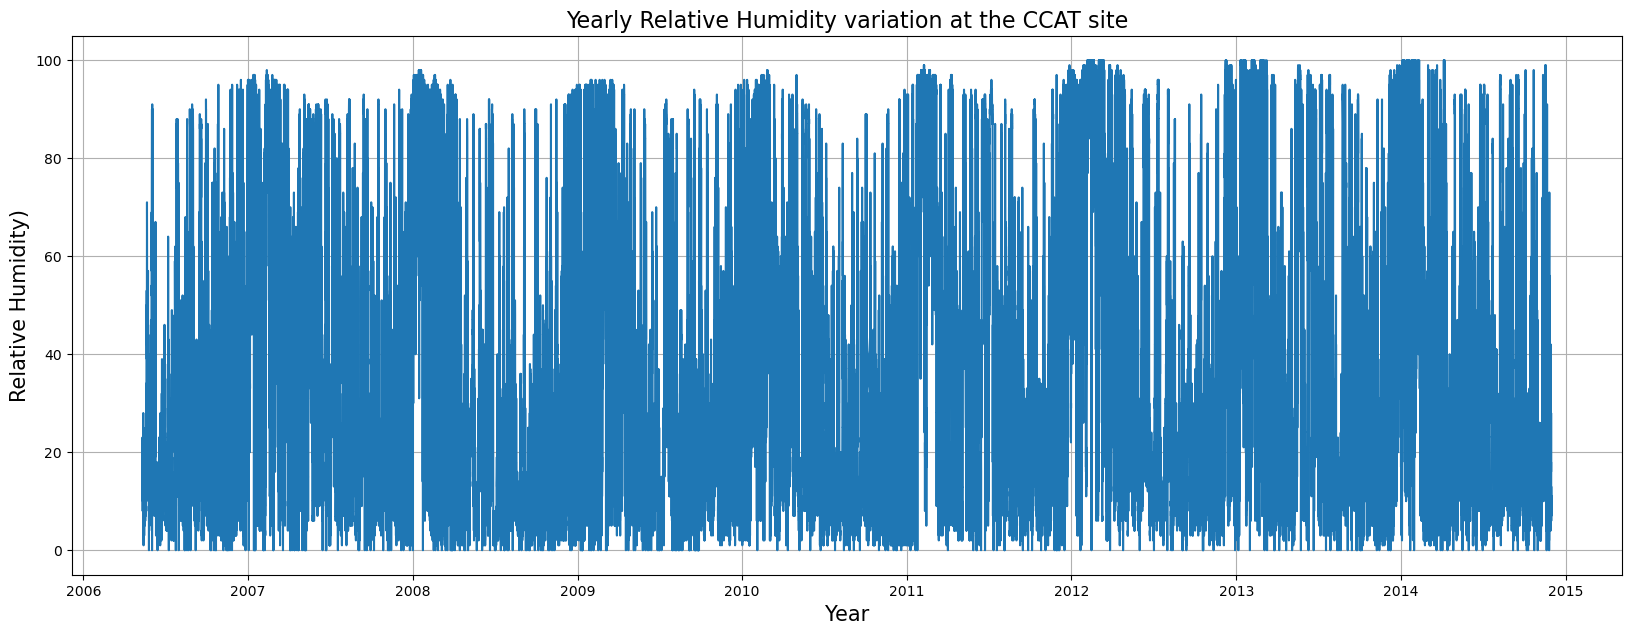

In [168]:
plt.figure(figsize=(20,7))
plt.xlabel("Year",size=15)
plt.ylabel("Relative Humidity)",size=15)
plt.title("Yearly Relative Humidity variation at the CCAT site",size=16)
plt.plot(wd.datetime,wd.relative_humidity)
plt.show()

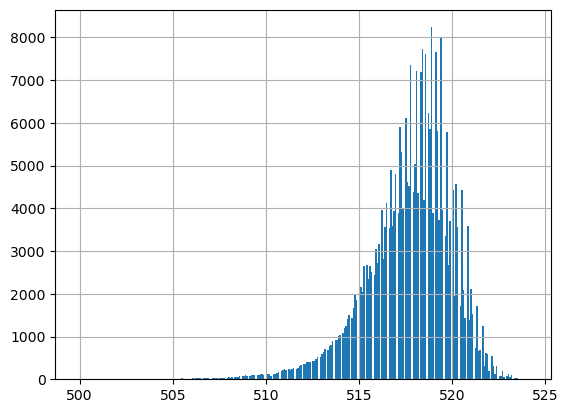

In [184]:
plt.hist(wd.pressure_mbar,bins='auto')
plt.show()

### P-cam modules :

#### 1. 2 -3 mm ~  99.93 to 149.89 GHz
#### 2. 1.1 - 1.3 mm ~ 230.60 to 272.53 GHz 
#### 3. 740 - 860 um ~ 348.59 to 405.12 GHz
#### 4. 350um ~ 856.6 GHz


# 1) 
### Annual :  Frequency (GHz) Vs Opacity (neper) plots for various H20 profiles, Relative Humnidity (RH) and Liquid Water Profile (LWP)

#### 0% RH and 0 g*m^-2 LWP ---> Dry air
#### 24 RH and 100 g*m^-2 LWP ---> Typical condition at CCAT site 

In [5]:
# load all files and extract the frequency and opacity values

#---------------------------------------------------------------------------- 5th percentile H20 profile------------------------------------------------------

CCAT_annual_5_0RH_0LWP =  np.loadtxt("CCAT_annual_5_0RH_0LWP.out") 
CCAT_annual_5_24RH_100LWP =  np.loadtxt("CCAT_annual_5_24RH_100LWP.out") 
CCAT_annual_5_24RH_100LWP_pcam =  np.loadtxt("CCAT_annual_5_24RH_100LWP_pcam.out") 

f_annual_5_0RH_0LWP = CCAT_annual_5_0RH_0LWP[:,0]
t_annual_5_0RH_0LWP = CCAT_annual_5_0RH_0LWP[:,1]

f_annual_5_24RH_100LWP = CCAT_annual_5_24RH_100LWP[:,0]
t_annual_5_24RH_100LWP = CCAT_annual_5_24RH_100LWP[:,1]

f_annual_5_24RH_100LWP_pcam = CCAT_annual_5_24RH_100LWP_pcam[:,0]
t_annual_5_24RH_100LWP_pcam = CCAT_annual_5_24RH_100LWP_pcam[:,1]

#----------------------------------------------------------------------------25th percentile H20 profile-------------------------------------------------------

CCAT_annual_25_0RH_0LWP =  np.loadtxt("CCAT_annual_25_0RH_0LWP.out") 
CCAT_annual_25_24RH_100LWP =  np.loadtxt("CCAT_annual_25_24RH_100LWP.out")
CCAT_annual_25_24RH_100LWP_pcam =  np.loadtxt("CCAT_annual_25_24RH_100LWP_pcam.out")

f_annual_25_0RH_0LWP = CCAT_annual_25_0RH_0LWP[:,0]
t_annual_25_0RH_0LWP = CCAT_annual_25_0RH_0LWP[:,1]

f_annual_25_24RH_100LWP = CCAT_annual_25_24RH_100LWP[:,0]
t_annual_25_24RH_100LWP = CCAT_annual_25_24RH_100LWP[:,1]

f_annual_25_24RH_100LWP_pcam = CCAT_annual_25_24RH_100LWP_pcam[:,0]
t_annual_25_24RH_100LWP_pcam = CCAT_annual_25_24RH_100LWP_pcam[:,1]

#----------------------------------------------------------------------------50th percentile H20 profile-------------------------------------------------------

CCAT_annual_50_0RH_0LWP =  np.loadtxt("CCAT_annual_50_0RH_0LWP.out") 
CCAT_annual_50_24RH_100LWP =  np.loadtxt("CCAT_annual_50_24RH_100LWP.out")
CCAT_annual_50_24RH_100LWP_pcam =  np.loadtxt("CCAT_annual_50_24RH_100LWP_pcam.out")

f_annual_50_0RH_0LWP = CCAT_annual_50_0RH_0LWP[:,0]
t_annual_50_0RH_0LWP = CCAT_annual_50_0RH_0LWP[:,1]

f_annual_50_24RH_100LWP = CCAT_annual_50_24RH_100LWP[:,0]
t_annual_50_24RH_100LWP = CCAT_annual_50_24RH_100LWP[:,1]

f_annual_50_24RH_100LWP_pcam = CCAT_annual_50_24RH_100LWP_pcam[:,0]
t_annual_50_24RH_100LWP_pcam = CCAT_annual_50_24RH_100LWP_pcam[:,1]

#----------------------------------------------------------------------------75th percentile H20 profile-------------------------------------------------------

CCAT_annual_75_0RH_0LWP =  np.loadtxt("CCAT_annual_75_0RH_0LWP.out") 
CCAT_annual_75_24RH_100LWP =  np.loadtxt("CCAT_annual_75_24RH_100LWP.out")
CCAT_annual_75_24RH_100LWP_pcam =  np.loadtxt("CCAT_annual_75_24RH_100LWP_pcam.out")

f_annual_75_0RH_0LWP = CCAT_annual_75_0RH_0LWP[:,0]
t_annual_75_0RH_0LWP = CCAT_annual_75_0RH_0LWP[:,1]

f_annual_75_24RH_100LWP = CCAT_annual_75_24RH_100LWP[:,0]
t_annual_75_24RH_100LWP = CCAT_annual_75_24RH_100LWP[:,1]

f_annual_75_24RH_100LWP_pcam = CCAT_annual_75_24RH_100LWP_pcam[:,0]
t_annual_75_24RH_100LWP_pcam = CCAT_annual_75_24RH_100LWP_pcam[:,1]

#----------------------------------------------------------------------------95th percentile H20 profile-------------------------------------------------------

CCAT_annual_95_0RH_0LWP =  np.loadtxt("CCAT_annual_95_0RH_0LWP.out") 
CCAT_annual_95_24RH_100LWP =  np.loadtxt("CCAT_annual_95_24RH_100LWP.out")
CCAT_annual_95_24RH_100LWP_pcam =  np.loadtxt("CCAT_annual_95_24RH_100LWP_pcam.out")

f_annual_95_0RH_0LWP = CCAT_annual_95_0RH_0LWP[:,0]
t_annual_95_0RH_0LWP = CCAT_annual_95_0RH_0LWP[:,1]

f_annual_95_24RH_100LWP = CCAT_annual_95_24RH_100LWP[:,0]
t_annual_95_24RH_100LWP = CCAT_annual_95_24RH_100LWP[:,1]

f_annual_95_24RH_100LWP_pcam = CCAT_annual_95_24RH_100LWP_pcam[:,0]
t_annual_95_24RH_100LWP_pcam = CCAT_annual_95_24RH_100LWP_pcam[:,1]

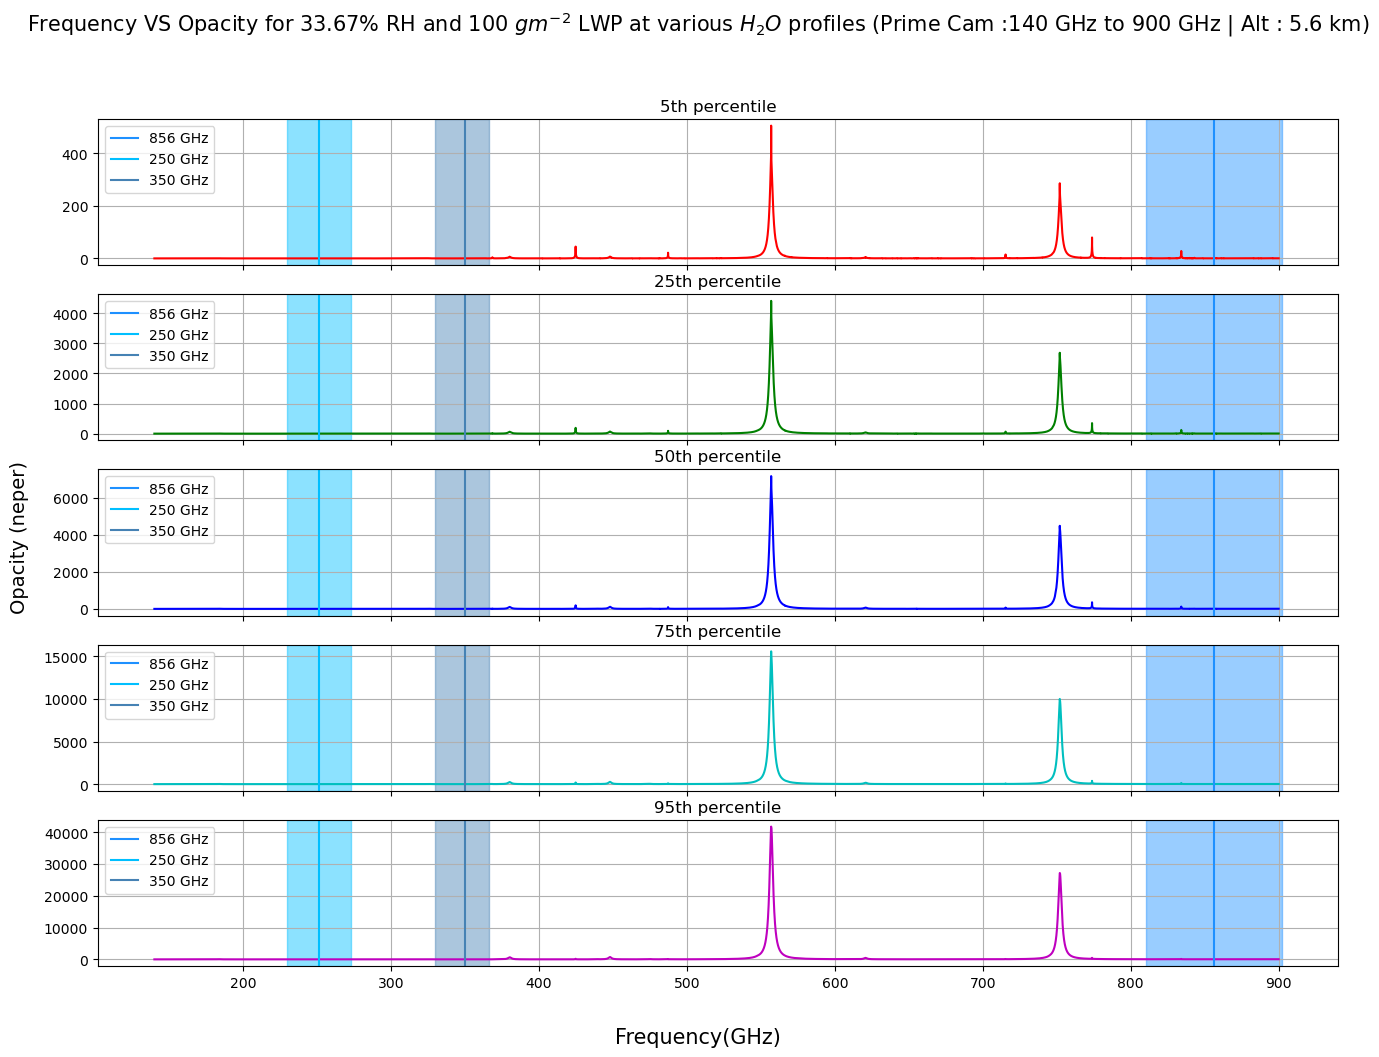

In [6]:
fig,axs = plt.subplots(5,1,sharex=True,sharey=False,figsize=(16,11))
fig.suptitle("Frequency VS Opacity for 33.67% RH and 100 $ gm^{-2} $ LWP at various $ H_2O $ profiles (Prime Cam :140 GHz to 900 GHz | Alt : 5.6 km)",size=15)



axs[0].plot(f_annual_5_24RH_100LWP_pcam,t_annual_5_24RH_100LWP_pcam,'r')#,label="5th percentile $ H_2O $")
axs[0].set_title("5th percentile")
axs[0].axvspan(810, 902, color='dodgerblue', alpha=0.45)#, label="350um")
axs[0].axvline(x = 856.6, color = 'dodgerblue', label = '856 GHz')
#axs[0].axvspan(99, 150, color='dodgerblue', alpha=0.45, label="2-3mm")
axs[0].axvspan(230, 273, color='deepskyblue', alpha=0.45)#, label="1.1-1.3mm")
axs[0].axvline(x = 251.5, color = 'deepskyblue', label = '250 GHz')
axs[0].axvspan(330, 366, color='steelblue', alpha=0.45)#, label="740-860um")
axs[0].axvline(x = 350, color = 'steelblue', label = '350 GHz')
axs[0].legend()


axs[1].plot(f_annual_25_24RH_100LWP_pcam,t_annual_25_24RH_100LWP_pcam,'g')#,label="25th percentile $ H_2O $")
axs[1].set_title("25th percentile")
axs[1].axvspan(810, 902, color='dodgerblue', alpha=0.45)#, label="350um")
axs[1].axvline(x = 856.6, color = 'dodgerblue', label = '856 GHz')
#axs[0].axvspan(99, 150, color='dodgerblue', alpha=0.45, label="2-3mm")
axs[1].axvspan(230, 273, color='deepskyblue', alpha=0.45)#, label="1.1-1.3mm")
axs[1].axvline(x = 251.5, color = 'deepskyblue', label = '250 GHz')
axs[1].axvspan(330, 366, color='steelblue', alpha=0.45)#, label="740-860um")
axs[1].axvline(x = 350, color = 'steelblue', label = '350 GHz')
axs[1].legend()


axs[2].plot(f_annual_50_24RH_100LWP_pcam,t_annual_50_24RH_100LWP_pcam,'b')#,label="50th percentile $ H_2O $")
axs[2].set_title("50th percentile")
axs[2].axvspan(810, 902, color='dodgerblue', alpha=0.45)#, label="350um")
axs[2].axvline(x = 856.6, color = 'dodgerblue', label = '856 GHz')
#axs[0].axvspan(99, 150, color='dodgerblue', alpha=0.45, label="2-3mm")
axs[2].axvspan(230, 273, color='deepskyblue', alpha=0.45)#, label="1.1-1.3mm")
axs[2].axvline(x = 251.5, color = 'deepskyblue', label = '250 GHz')
axs[2].axvspan(330, 366, color='steelblue', alpha=0.45)#, label="740-860um")
axs[2].axvline(x = 350, color = 'steelblue', label = '350 GHz')
axs[2].legend()


axs[3].plot(f_annual_75_24RH_100LWP_pcam,t_annual_75_24RH_100LWP_pcam,'c')#,label="75th percentile $ H_2O $")
axs[3].set_title("75th percentile")
axs[3].axvspan(810, 902, color='dodgerblue', alpha=0.45)#, label="350um")
axs[3].axvline(x = 856.6, color = 'dodgerblue', label = '856 GHz')
#axs[0].axvspan(99, 150, color='dodgerblue', alpha=0.45, label="2-3mm")
axs[3].axvspan(230, 273, color='deepskyblue', alpha=0.45)#, label="1.1-1.3mm")
axs[3].axvline(x = 251.5, color = 'deepskyblue', label = '250 GHz')
axs[3].axvspan(330, 366, color='steelblue', alpha=0.45)#, label="740-860um")
axs[3].axvline(x = 350, color = 'steelblue', label = '350 GHz')
axs[3].legend()


axs[4].plot(f_annual_95_24RH_100LWP_pcam,t_annual_95_24RH_100LWP_pcam,'m')#,label="95th percentile $ H_2O $")
axs[4].set_title("95th percentile")
axs[4].axvspan(810, 902, color='dodgerblue', alpha=0.45)#, label="350um")
axs[4].axvline(x = 856.6, color = 'dodgerblue', label = '856 GHz')
#axs[0].axvspan(99, 150, color='dodgerblue', alpha=0.45, label="2-3mm")
axs[4].axvspan(230, 273, color='deepskyblue', alpha=0.45)#, label="1.1-1.3mm")
axs[4].axvline(x = 251.5, color = 'deepskyblue', label = '250 GHz')
axs[4].axvspan(330, 366, color='steelblue', alpha=0.45)#, label="740-860um")
axs[4].axvline(x = 350, color = 'steelblue', label = '350 GHz')
axs[4].legend()


fig.text(0.5, 0.04, 'Frequency(GHz)', ha='center',size=15)
fig.text(0.07, 0.5, 'Opacity (neper)', va='center', rotation='vertical',size=14)



plt.savefig("v1_outputs/Frequency VS Opacity for 24% RH and 100 $ gm^{-2} $ LWP at various $ H_2O $ profiles (Prime Cam)_V1.jpg",dpi="figure")

plt.show()


In [4]:
# fig,axs = plt.subplots(5,1,sharex=True,sharey=False,figsize=(15,10))
# fig.suptitle("Frequency VS Opacity for 24% RH and 100 $ gm^{-2} $ LWP at various $ H_2O $ profiles (CCAT site)",size=15)


# axs[0].plot(f_annual_5_24RH_100LWP,t_annual_5_24RH_100LWP,'r',label="5th percentile H20")
# axs[0].legend(loc="upper left")

# axs[1].plot(f_annual_25_24RH_100LWP,t_annual_25_24RH_100LWP,'g',label="25th percentile H20")
# axs[1].legend(loc="upper left")

# axs[2].plot(f_annual_50_24RH_100LWP,t_annual_50_24RH_100LWP,'b',label="50th percentile H20")
# axs[2].legend(loc="upper left")

# axs[3].plot(f_annual_75_24RH_100LWP,t_annual_75_24RH_100LWP,'c',label="75th percentile H20")
# axs[3].legend(loc="upper left")

# axs[4].plot(f_annual_95_24RH_100LWP,t_annual_95_24RH_100LWP,'m',label="95th percentile H20")
# axs[4].legend(loc="upper left")


# fig.text(0.5, 0.04, 'Frequency(GHz)', ha='center',size=15)
# fig.text(0.07, 0.5, 'Opacity (neper)', va='center', rotation='vertical',size=14)

# plt.show()

#### spikes in the opacity show us the molecular rotational lines

## 2)
### Various Parameters 0 deg Zenith angle at different H20 profiles and time of year 
#### 0 to 1000 GHz at 10 MHz frequency resolution

#### output: f(GHz), tau, tx, Trj(K), Tb(K)

In [5]:
# ---------------------------------------------------------------------------- ANNUAL -----------------------------------------------------------------------

# load all files and extract the frequency and opacity values

#---------------------------------------------------------------------------- 5th percentile H20 profile------------------------------------------------------
CCAT_annual_5 = np.loadtxt("CCAT_annual_5.out")

f_CCAT_annual_5 = CCAT_annual_5[:,0]
tau_CCAT_annual_5 = CCAT_annual_5[:,1]
tx_CCAT_annual_5 = CCAT_annual_5[:,2]
trj_CCAT_annual_5 = CCAT_annual_5[:,3]
tb_CCAT_annual_5 = CCAT_annual_5[:,4]

#---------------------------------------------------------------------------- 25th percentile H20 profile------------------------------------------------------
CCAT_annual_25 = np.loadtxt("CCAT_annual_25.out")

f_CCAT_annual_25 = CCAT_annual_25[:,0]
tau_CCAT_annual_25 = CCAT_annual_25[:,1]
tx_CCAT_annual_25 = CCAT_annual_25[:,2]
trj_CCAT_annual_25 = CCAT_annual_25[:,3]
tb_CCAT_annual_25 = CCAT_annual_25[:,4]

#---------------------------------------------------------------------------- 50th percentile H20 profile------------------------------------------------------
CCAT_annual_50 = np.loadtxt("CCAT_annual_50.out")

f_CCAT_annual_50 = CCAT_annual_50[:,0]
tau_CCAT_annual_50 = CCAT_annual_50[:,1]
tx_CCAT_annual_50 = CCAT_annual_50[:,2]
trj_CCAT_annual_50 = CCAT_annual_50[:,3]
tb_CCAT_annual_50 = CCAT_annual_50[:,4]

#---------------------------------------------------------------------------- 75th percentile H20 profile------------------------------------------------------
CCAT_annual_75 = np.loadtxt("CCAT_annual_75.out")

f_CCAT_annual_75 = CCAT_annual_75[:,0]
tau_CCAT_annual_75 = CCAT_annual_75[:,1]
tx_CCAT_annual_75 = CCAT_annual_75[:,2]
trj_CCAT_annual_75 = CCAT_annual_75[:,3]
tb_CCAT_annual_75 = CCAT_annual_75[:,4]

#---------------------------------------------------------------------------- 95th percentile H20 profile------------------------------------------------------
CCAT_annual_95 = np.loadtxt("CCAT_annual_95.out")

f_CCAT_annual_95 = CCAT_annual_95[:,0]
tau_CCAT_annual_95 = CCAT_annual_95[:,1]
tx_CCAT_annual_95 = CCAT_annual_95[:,2]
trj_CCAT_annual_95 = CCAT_annual_95[:,3]
tb_CCAT_annual_95 = CCAT_annual_95[:,4]

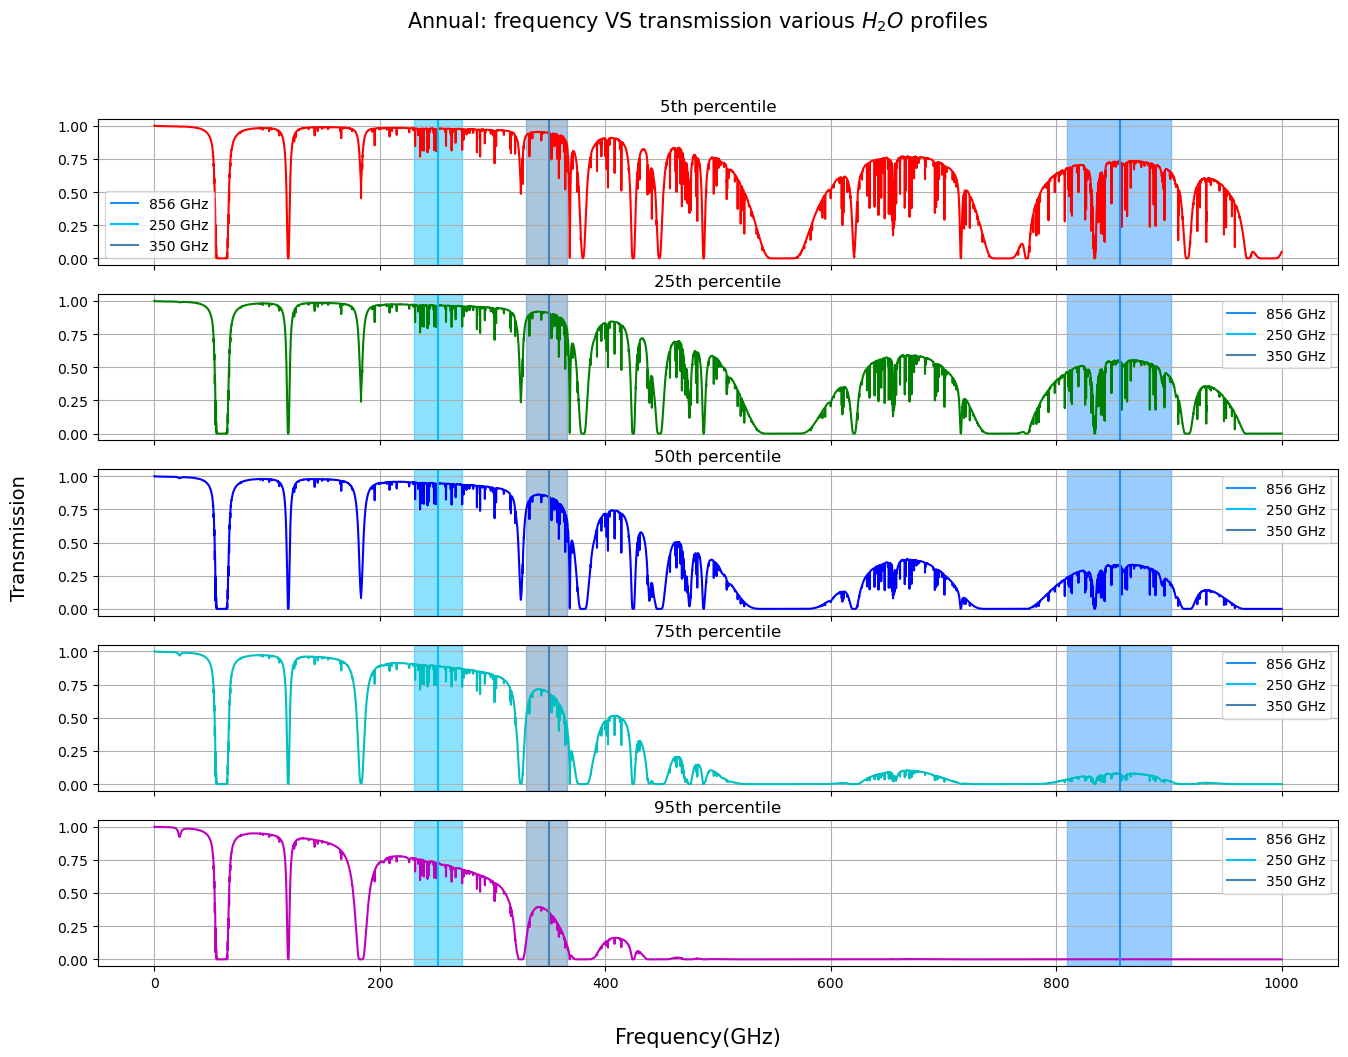

In [6]:
fig,axs = plt.subplots(5,1,sharex=True,sharey=True,figsize=(16,11))
fig.suptitle("Annual: frequency VS transmission various $ H_2O $ profiles",size=15)


axs[0].plot(f_CCAT_annual_5,tx_CCAT_annual_5,'r')#,label="5th percentile $ H_2O $")
axs[0].set_title("5th percentile")
axs[0].axvspan(810, 902, color='dodgerblue', alpha=0.45)#, label="350um")
axs[0].axvline(x = 856.6, color = 'dodgerblue', label = '856 GHz')
#axs[0].axvspan(99, 150, color='dodgerblue', alpha=0.45, label="2-3mm")
axs[0].axvspan(230, 273, color='deepskyblue', alpha=0.45)#, label="1.1-1.3mm")
axs[0].axvline(x = 251.5, color = 'deepskyblue', label = '250 GHz')
axs[0].axvspan(330, 366, color='steelblue', alpha=0.45)#, label="740-860um")
axs[0].axvline(x = 350, color = 'steelblue', label = '350 GHz')
axs[0].legend()

axs[1].plot(f_CCAT_annual_25,tx_CCAT_annual_25,'g')#,label="25th percentile $ H_2O $")
axs[1].set_title("25th percentile")
axs[1].axvspan(810, 902, color='dodgerblue', alpha=0.45)#, label="350um")
axs[1].axvline(x = 856.6, color = 'dodgerblue', label = '856 GHz')
#axs[0].axvspan(99, 150, color='dodgerblue', alpha=0.45, label="2-3mm")
axs[1].axvspan(230, 273, color='deepskyblue', alpha=0.45)#, label="1.1-1.3mm")
axs[1].axvline(x = 251.5, color = 'deepskyblue', label = '250 GHz')
axs[1].axvspan(330, 366, color='steelblue', alpha=0.45)#, label="740-860um")
axs[1].axvline(x = 350, color = 'steelblue', label = '350 GHz')
axs[1].legend()

axs[2].plot(f_CCAT_annual_50,tx_CCAT_annual_50,'b')#,label="50th percentile $ H_2O $")
axs[2].set_title("50th percentile")
axs[2].axvspan(810, 902, color='dodgerblue', alpha=0.45)#, label="350um")
axs[2].axvline(x = 856.6, color = 'dodgerblue', label = '856 GHz')
#axs[0].axvspan(99, 150, color='dodgerblue', alpha=0.45, label="2-3mm")
axs[2].axvspan(230, 273, color='deepskyblue', alpha=0.45)#, label="1.1-1.3mm")
axs[2].axvline(x = 251.5, color = 'deepskyblue', label = '250 GHz')
axs[2].axvspan(330, 366, color='steelblue', alpha=0.45)#, label="740-860um")
axs[2].axvline(x = 350, color = 'steelblue', label = '350 GHz')
axs[2].legend()

axs[3].plot(f_CCAT_annual_75,tx_CCAT_annual_75,'c')#,label="75th percentile $ H_2O $")
axs[3].set_title("75th percentile")
axs[3].axvspan(810, 902, color='dodgerblue', alpha=0.45)#, label="350um")
axs[3].axvline(x = 856.6, color = 'dodgerblue', label = '856 GHz')
#axs[0].axvspan(99, 150, color='dodgerblue', alpha=0.45, label="2-3mm")
axs[3].axvspan(230, 273, color='deepskyblue', alpha=0.45)#, label="1.1-1.3mm")
axs[3].axvline(x = 251.5, color = 'deepskyblue', label = '250 GHz')
axs[3].axvspan(330, 366, color='steelblue', alpha=0.45)#, label="740-860um")
axs[3].axvline(x = 350, color = 'steelblue', label = '350 GHz')
axs[3].legend()

axs[4].plot(f_CCAT_annual_95,tx_CCAT_annual_95,'m')#,label="95th percentile $ H_2O $")
axs[4].set_title("95th percentile")
axs[4].axvspan(810, 902, color='dodgerblue', alpha=0.45)#, label="350um")
axs[4].axvline(x = 856.6, color = 'dodgerblue', label = '856 GHz')
#axs[0].axvspan(99, 150, color='dodgerblue', alpha=0.45, label="2-3mm")
axs[4].axvspan(230, 273, color='deepskyblue', alpha=0.45)#, label="1.1-1.3mm")
axs[4].axvline(x = 251.5, color = 'deepskyblue', label = '250 GHz')
axs[4].axvspan(330, 366, color='steelblue', alpha=0.45)#, label="740-860um")
axs[4].axvline(x = 350, color = 'steelblue', label = '350 GHz')
axs[4].legend()

fig.text(0.5, 0.04, 'Frequency(GHz)', ha='center',size=15)
fig.text(0.07, 0.5, 'Transmission', va='center', rotation='vertical',size=14)

plt.savefig("v1_outputs/Annual: frequency VS transmission various $ H_2O $ profiles_V1.jpg",dpi="figure")

plt.show()

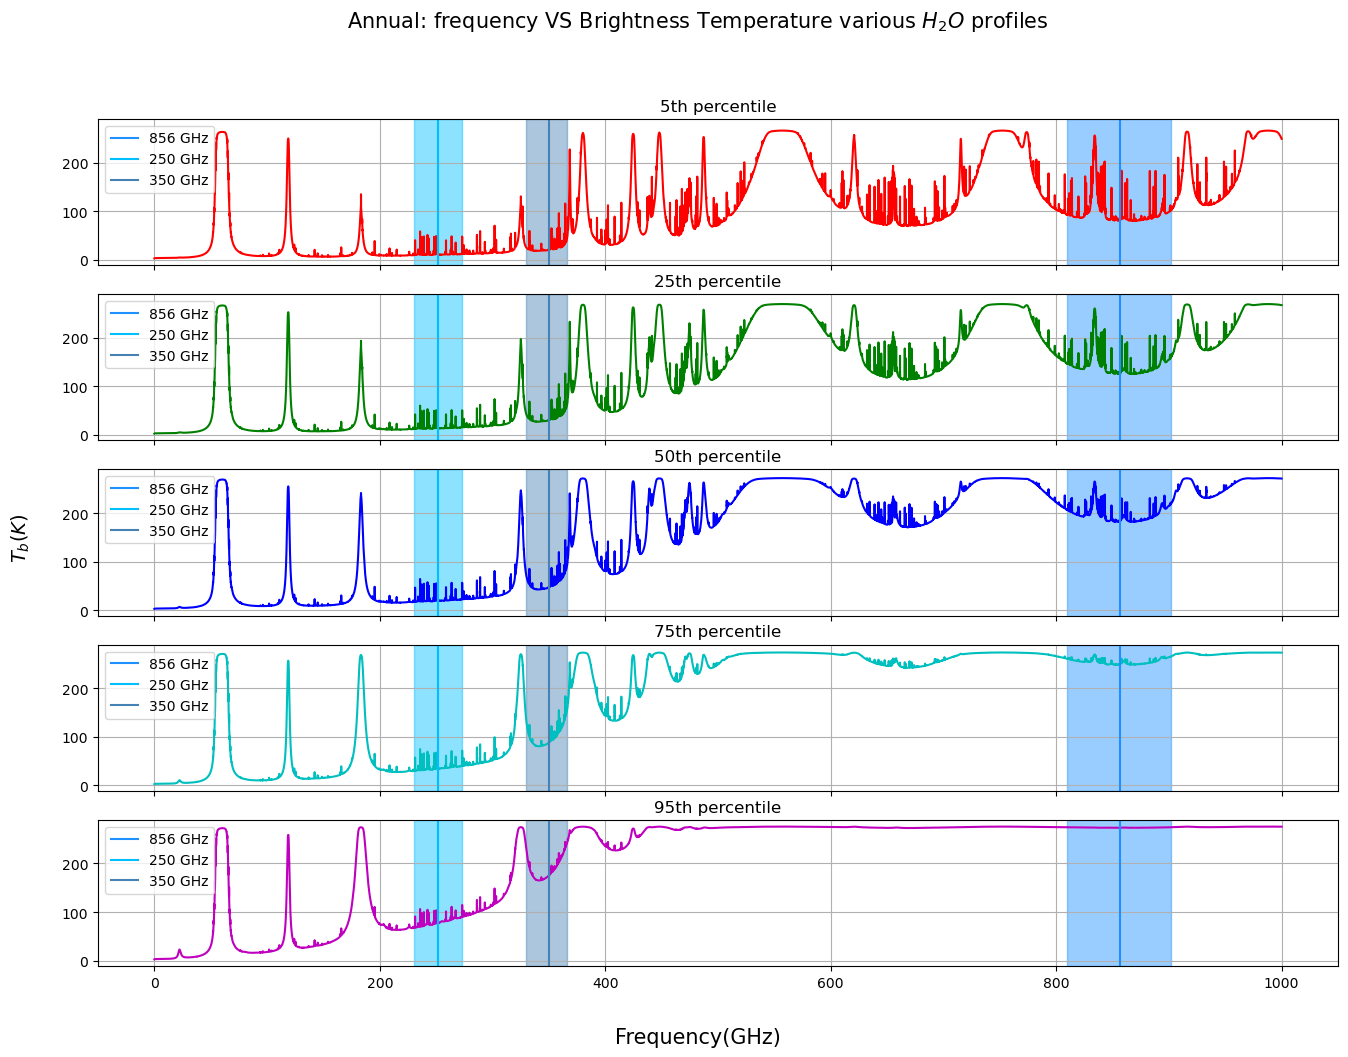

In [7]:
fig,axs = plt.subplots(5,1,sharex=True,sharey=True,figsize=(16,11))
fig.suptitle("Annual: frequency VS Brightness Temperature various $ H_2O $ profiles",size=15)


axs[0].plot(f_CCAT_annual_5,tb_CCAT_annual_5,'r')#,label="5th percentile $ H_2O $")
axs[0].set_title("5th percentile")
axs[0].axvspan(810, 902, color='dodgerblue', alpha=0.45)#, label="350um")
axs[0].axvline(x = 856.6, color = 'dodgerblue', label = '856 GHz')
#axs[0].axvspan(99, 150, color='dodgerblue', alpha=0.45, label="2-3mm")
axs[0].axvspan(230, 273, color='deepskyblue', alpha=0.45)#, label="1.1-1.3mm")
axs[0].axvline(x = 251.5, color = 'deepskyblue', label = '250 GHz')
axs[0].axvspan(330, 366, color='steelblue', alpha=0.45)#, label="740-860um")
axs[0].axvline(x = 350, color = 'steelblue', label = '350 GHz')
axs[0].legend()

axs[1].plot(f_CCAT_annual_25,tb_CCAT_annual_25,'g')#,label="25th percentile $ H_2O $")
axs[1].set_title("25th percentile")
axs[1].axvspan(810, 902, color='dodgerblue', alpha=0.45)#, label="350um")
axs[1].axvline(x = 856.6, color = 'dodgerblue', label = '856 GHz')
#axs[0].axvspan(99, 150, color='dodgerblue', alpha=0.45, label="2-3mm")
axs[1].axvspan(230, 273, color='deepskyblue', alpha=0.45)#, label="1.1-1.3mm")
axs[1].axvline(x = 251.5, color = 'deepskyblue', label = '250 GHz')
axs[1].axvspan(330, 366, color='steelblue', alpha=0.45)#, label="740-860um")
axs[1].axvline(x = 350, color = 'steelblue', label = '350 GHz')
axs[1].legend()

axs[2].plot(f_CCAT_annual_50,tb_CCAT_annual_50,'b')#,label="50th percentile $ H_2O $")
axs[2].set_title("50th percentile")
axs[2].axvspan(810, 902, color='dodgerblue', alpha=0.45)#, label="350um")
axs[2].axvline(x = 856.6, color = 'dodgerblue', label = '856 GHz')
#axs[0].axvspan(99, 150, color='dodgerblue', alpha=0.45, label="2-3mm")
axs[2].axvspan(230, 273, color='deepskyblue', alpha=0.45)#, label="1.1-1.3mm")
axs[2].axvline(x = 251.5, color = 'deepskyblue', label = '250 GHz')
axs[2].axvspan(330, 366, color='steelblue', alpha=0.45)#, label="740-860um")
axs[2].axvline(x = 350, color = 'steelblue', label = '350 GHz')
axs[2].legend()

axs[3].plot(f_CCAT_annual_75,tb_CCAT_annual_75,'c')#,label="75th percentile $ H_2O $")
axs[3].set_title("75th percentile")
axs[3].axvspan(810, 902, color='dodgerblue', alpha=0.45)#, label="350um")
axs[3].axvline(x = 856.6, color = 'dodgerblue', label = '856 GHz')
#axs[0].axvspan(99, 150, color='dodgerblue', alpha=0.45, label="2-3mm")
axs[3].axvspan(230, 273, color='deepskyblue', alpha=0.45)#, label="1.1-1.3mm")
axs[3].axvline(x = 251.5, color = 'deepskyblue', label = '250 GHz')
axs[3].axvspan(330, 366, color='steelblue', alpha=0.45)#, label="740-860um")
axs[3].axvline(x = 350, color = 'steelblue', label = '350 GHz')
axs[3].legend()

axs[4].plot(f_CCAT_annual_95,tb_CCAT_annual_95,'m')#,label="95th percentile $ H_2O $")
axs[4].set_title("95th percentile")
axs[4].axvspan(810, 902, color='dodgerblue', alpha=0.45)#, label="350um")
axs[4].axvline(x = 856.6, color = 'dodgerblue', label = '856 GHz')
#axs[0].axvspan(99, 150, color='dodgerblue', alpha=0.45, label="2-3mm")
axs[4].axvspan(230, 273, color='deepskyblue', alpha=0.45)#, label="1.1-1.3mm")
axs[4].axvline(x = 251.5, color = 'deepskyblue', label = '250 GHz')
axs[4].axvspan(330, 366, color='steelblue', alpha=0.45)#, label="740-860um")
axs[4].axvline(x = 350, color = 'steelblue', label = '350 GHz')
axs[4].legend()


fig.text(0.5, 0.04, 'Frequency(GHz)', ha='center',size=15)
fig.text(0.07, 0.5, '$ T_b (K) $', va='center', rotation='vertical',size=14)

plt.savefig("v1_outputs/Annual: frequency VS Brightness Temperature various $ H_2O $ profiles_V1.jpg",dpi="figure")

plt.show()

In [8]:
# ---------------------------------------------------------------------------- DJF ----------------------------------------------------------------------------------------------

# load all files and extract the frequency and opacity values

#---------------------------------------------------------------------------- 5th percentile H20 profile------------------------------------------------------
CCAT_DJF_5 = np.loadtxt("CCAT_DJF_5.out")

f_CCAT_DJF_5 = CCAT_DJF_5[:,0]
tau_CCAT_DJF_5 = CCAT_DJF_5[:,1]
tx_CCAT_DJF_5 = CCAT_DJF_5[:,2]
trj_CCAT_DJF_5 = CCAT_DJF_5[:,3]
tb_CCAT_DJF_5 = CCAT_DJF_5[:,4]

#---------------------------------------------------------------------------- 25th percentile H20 profile------------------------------------------------------
CCAT_DJF_25 = np.loadtxt("CCAT_DJF_25.out")

f_CCAT_DJF_25 = CCAT_DJF_25[:,0]
tau_CCAT_DJF_25 = CCAT_DJF_25[:,1]
tx_CCAT_DJF_25 = CCAT_DJF_25[:,2]
trj_CCAT_DJF_25 = CCAT_DJF_25[:,3]
tb_CCAT_DJF_25 = CCAT_DJF_25[:,4]

#---------------------------------------------------------------------------- 50th percentile H20 profile------------------------------------------------------
CCAT_DJF_50 = np.loadtxt("CCAT_DJF_50.out")

f_CCAT_DJF_50 = CCAT_DJF_50[:,0]
tau_CCAT_DJF_50 = CCAT_DJF_50[:,1]
tx_CCAT_DJF_50 = CCAT_DJF_50[:,2]
trj_CCAT_DJF_50 = CCAT_DJF_50[:,3]
tb_CCAT_DJF_50 = CCAT_DJF_50[:,4]

#---------------------------------------------------------------------------- 75th percentile H20 profile------------------------------------------------------
CCAT_DJF_75 = np.loadtxt("CCAT_DJF_75.out")

f_CCAT_DJF_75 = CCAT_DJF_75[:,0]
tau_CCAT_DJF_75 = CCAT_DJF_75[:,1]
tx_CCAT_DJF_75 = CCAT_DJF_75[:,2]
trj_CCAT_DJF_75 = CCAT_DJF_75[:,3]
tb_CCAT_DJF_75 = CCAT_DJF_75[:,4]

#---------------------------------------------------------------------------- 95th percentile H20 profile------------------------------------------------------
CCAT_DJF_95 = np.loadtxt("CCAT_DJF_95.out")

f_CCAT_DJF_95 = CCAT_DJF_95[:,0]
tau_CCAT_DJF_95 = CCAT_DJF_95[:,1]
tx_CCAT_DJF_95 = CCAT_DJF_95[:,2]
trj_CCAT_DJF_95 = CCAT_DJF_95[:,3]
tb_CCAT_DJF_95 = CCAT_DJF_95[:,4]

# ---------------------------------------------------------------------------- JFM ------------------------------------------------------------------------------------------------

# load all files and extract the frequency and opacity values

#---------------------------------------------------------------------------- 5th percentile H20 profile------------------------------------------------------
CCAT_JFM_5 = np.loadtxt("CCAT_JFM_5.out")

f_CCAT_JFM_5 = CCAT_JFM_5[:,0]
tau_CCAT_JFM_5 = CCAT_JFM_5[:,1]
tx_CCAT_JFM_5 = CCAT_JFM_5[:,2]
trj_CCAT_JFM_5 = CCAT_JFM_5[:,3]
tb_CCAT_JFM_5 = CCAT_JFM_5[:,4]

#---------------------------------------------------------------------------- 25th percentile H20 profile------------------------------------------------------
CCAT_JFM_25 = np.loadtxt("CCAT_JFM_25.out")

f_CCAT_JFM_25 = CCAT_JFM_25[:,0]
tau_CCAT_JFM_25 = CCAT_JFM_25[:,1]
tx_CCAT_JFM_25 = CCAT_JFM_25[:,2]
trj_CCAT_JFM_25 = CCAT_JFM_25[:,3]
tb_CCAT_JFM_25 = CCAT_JFM_25[:,4]

#---------------------------------------------------------------------------- 50th percentile H20 profile------------------------------------------------------
CCAT_JFM_50 = np.loadtxt("CCAT_JFM_50.out")

f_CCAT_JFM_50 = CCAT_JFM_50[:,0]
tau_CCAT_JFM_50 = CCAT_JFM_50[:,1]
tx_CCAT_JFM_50 = CCAT_JFM_50[:,2]
trj_CCAT_JFM_50 = CCAT_JFM_50[:,3]
tb_CCAT_JFM_50 = CCAT_JFM_50[:,4]

#---------------------------------------------------------------------------- 75th percentile H20 profile------------------------------------------------------
CCAT_JFM_75 = np.loadtxt("CCAT_JFM_75.out")

f_CCAT_JFM_75 = CCAT_JFM_75[:,0]
tau_CCAT_JFM_75 = CCAT_JFM_75[:,1]
tx_CCAT_JFM_75 = CCAT_JFM_75[:,2]
trj_CCAT_JFM_75 = CCAT_JFM_75[:,3]
tb_CCAT_JFM_75 = CCAT_JFM_75[:,4]

#---------------------------------------------------------------------------- 95th percentile H20 profile------------------------------------------------------
CCAT_JFM_95 = np.loadtxt("CCAT_JFM_95.out")

f_CCAT_JFM_95 = CCAT_JFM_95[:,0]
tau_CCAT_JFM_95 = CCAT_JFM_95[:,1]
tx_CCAT_JFM_95 = CCAT_JFM_95[:,2]
trj_CCAT_JFM_95 = CCAT_JFM_95[:,3]
tb_CCAT_JFM_95 = CCAT_JFM_95[:,4]

# ---------------------------------------------------------------------------- MAM -------------------------------------------------------------------------------------------------

# load all files and extract the frequency and opacity values

#---------------------------------------------------------------------------- 5th percentile H20 profile------------------------------------------------------
CCAT_MAM_5 = np.loadtxt("CCAT_MAM_5.out")

f_CCAT_MAM_5 = CCAT_MAM_5[:,0]
tau_CCAT_MAM_5 = CCAT_MAM_5[:,1]
tx_CCAT_MAM_5 = CCAT_MAM_5[:,2]
trj_CCAT_MAM_5 = CCAT_MAM_5[:,3]
tb_CCAT_MAM_5 = CCAT_MAM_5[:,4]

#---------------------------------------------------------------------------- 25th percentile H20 profile------------------------------------------------------
CCAT_MAM_25 = np.loadtxt("CCAT_MAM_25.out")

f_CCAT_MAM_25 = CCAT_MAM_25[:,0]
tau_CCAT_MAM_25 = CCAT_MAM_25[:,1]
tx_CCAT_MAM_25 = CCAT_MAM_25[:,2]
trj_CCAT_MAM_25 = CCAT_MAM_25[:,3]
tb_CCAT_MAM_25 = CCAT_MAM_25[:,4]

#---------------------------------------------------------------------------- 50th percentile H20 profile------------------------------------------------------
CCAT_MAM_50 = np.loadtxt("CCAT_MAM_50.out")

f_CCAT_MAM_50 = CCAT_MAM_50[:,0]
tau_CCAT_MAM_50 = CCAT_MAM_50[:,1]
tx_CCAT_MAM_50 = CCAT_MAM_50[:,2]
trj_CCAT_MAM_50 = CCAT_MAM_50[:,3]
tb_CCAT_MAM_50 = CCAT_MAM_50[:,4]

#---------------------------------------------------------------------------- 75th percentile H20 profile------------------------------------------------------
CCAT_MAM_75 = np.loadtxt("CCAT_MAM_75.out")

f_CCAT_MAM_75 = CCAT_MAM_75[:,0]
tau_CCAT_MAM_75 = CCAT_MAM_75[:,1]
tx_CCAT_MAM_75 = CCAT_MAM_75[:,2]
trj_CCAT_MAM_75 = CCAT_MAM_75[:,3]
tb_CCAT_MAM_75 = CCAT_MAM_75[:,4]

#---------------------------------------------------------------------------- 95th percentile H20 profile------------------------------------------------------
CCAT_MAM_95 = np.loadtxt("CCAT_MAM_95.out")

f_CCAT_MAM_95 = CCAT_MAM_95[:,0]
tau_CCAT_MAM_95 = CCAT_MAM_95[:,1]
tx_CCAT_MAM_95 = CCAT_MAM_95[:,2]
trj_CCAT_MAM_95 = CCAT_MAM_95[:,3]
tb_CCAT_MAM_95 = CCAT_MAM_95[:,4]

# ---------------------------------------------------------------------------- JJA ----------------------------------------------------------------------------------------------------

# load all files and extract the frequency and opacity values

#---------------------------------------------------------------------------- 5th percentile H20 profile------------------------------------------------------
CCAT_JJA_5 = np.loadtxt("CCAT_JJA_5.out")

f_CCAT_JJA_5 = CCAT_JJA_5[:,0]
tau_CCAT_JJA_5 = CCAT_JJA_5[:,1]
tx_CCAT_JJA_5 = CCAT_JJA_5[:,2]
trj_CCAT_JJA_5 = CCAT_JJA_5[:,3]
tb_CCAT_JJA_5 = CCAT_JJA_5[:,4]

#---------------------------------------------------------------------------- 25th percentile H20 profile------------------------------------------------------
CCAT_JJA_25 = np.loadtxt("CCAT_JJA_25.out")

f_CCAT_JJA_25 = CCAT_JJA_25[:,0]
tau_CCAT_JJA_25 = CCAT_JJA_25[:,1]
tx_CCAT_JJA_25 = CCAT_JJA_25[:,2]
trj_CCAT_JJA_25 = CCAT_JJA_25[:,3]
tb_CCAT_JJA_25 = CCAT_JJA_25[:,4]

#---------------------------------------------------------------------------- 50th percentile H20 profile------------------------------------------------------
CCAT_JJA_50 = np.loadtxt("CCAT_JJA_50.out")

f_CCAT_JJA_50 = CCAT_JJA_50[:,0]
tau_CCAT_JJA_50 = CCAT_JJA_50[:,1]
tx_CCAT_JJA_50 = CCAT_JJA_50[:,2]
trj_CCAT_JJA_50 = CCAT_JJA_50[:,3]
tb_CCAT_JJA_50 = CCAT_JJA_50[:,4]

#---------------------------------------------------------------------------- 75th percentile H20 profile------------------------------------------------------
CCAT_JJA_75 = np.loadtxt("CCAT_JJA_75.out")

f_CCAT_JJA_75 = CCAT_JJA_75[:,0]
tau_CCAT_JJA_75 = CCAT_JJA_75[:,1]
tx_CCAT_JJA_75 = CCAT_JJA_75[:,2]
trj_CCAT_JJA_75 = CCAT_JJA_75[:,3]
tb_CCAT_JJA_75 = CCAT_JJA_75[:,4]

#---------------------------------------------------------------------------- 95th percentile H20 profile------------------------------------------------------
CCAT_JJA_95 = np.loadtxt("CCAT_JJA_95.out")

f_CCAT_JJA_95 = CCAT_JJA_95[:,0]
tau_CCAT_JJA_95 = CCAT_JJA_95[:,1]
tx_CCAT_JJA_95 = CCAT_JJA_95[:,2]
trj_CCAT_JJA_95 = CCAT_JJA_95[:,3]
tb_CCAT_JJA_95 = CCAT_JJA_95[:,4]


# ---------------------------------------------------------------------------- SON --------------------------------------------------------------------------------------------------------------------------

# load all files and extract the frequency and opacity values

#---------------------------------------------------------------------------- 5th percentile H20 profile------------------------------------------------------
CCAT_SON_5 = np.loadtxt("CCAT_SON_5.out")

f_CCAT_SON_5 = CCAT_SON_5[:,0]
tau_CCAT_SON_5 = CCAT_SON_5[:,1]
tx_CCAT_SON_5 = CCAT_SON_5[:,2]
trj_CCAT_SON_5 = CCAT_SON_5[:,3]
tb_CCAT_SON_5 = CCAT_SON_5[:,4]

#---------------------------------------------------------------------------- 25th percentile H20 profile------------------------------------------------------
CCAT_SON_25 = np.loadtxt("CCAT_SON_25.out")

f_CCAT_SON_25 = CCAT_SON_25[:,0]
tau_CCAT_SON_25 = CCAT_SON_25[:,1]
tx_CCAT_SON_25 = CCAT_SON_25[:,2]
trj_CCAT_SON_25 = CCAT_SON_25[:,3]
tb_CCAT_SON_25 = CCAT_SON_25[:,4]

#---------------------------------------------------------------------------- 50th percentile H20 profile------------------------------------------------------
CCAT_SON_50 = np.loadtxt("CCAT_SON_50.out")

f_CCAT_SON_50 = CCAT_SON_50[:,0]
tau_CCAT_SON_50 = CCAT_SON_50[:,1]
tx_CCAT_SON_50 = CCAT_SON_50[:,2]
trj_CCAT_SON_50 = CCAT_SON_50[:,3]
tb_CCAT_SON_50 = CCAT_SON_50[:,4]

#---------------------------------------------------------------------------- 75th percentile H20 profile------------------------------------------------------
CCAT_SON_75 = np.loadtxt("CCAT_SON_75.out")

f_CCAT_SON_75 = CCAT_SON_75[:,0]
tau_CCAT_SON_75 = CCAT_SON_75[:,1]
tx_CCAT_SON_75 = CCAT_SON_75[:,2]
trj_CCAT_SON_75 = CCAT_SON_75[:,3]
tb_CCAT_SON_75 = CCAT_SON_75[:,4]

#---------------------------------------------------------------------------- 95th percentile H20 profile------------------------------------------------------
CCAT_SON_95 = np.loadtxt("CCAT_SON_95.out")

f_CCAT_SON_95 = CCAT_SON_95[:,0]
tau_CCAT_SON_95 = CCAT_SON_95[:,1]
tx_CCAT_SON_95 = CCAT_SON_95[:,2]
trj_CCAT_SON_95 = CCAT_SON_95[:,3]
tb_CCAT_SON_95 = CCAT_SON_95[:,4]

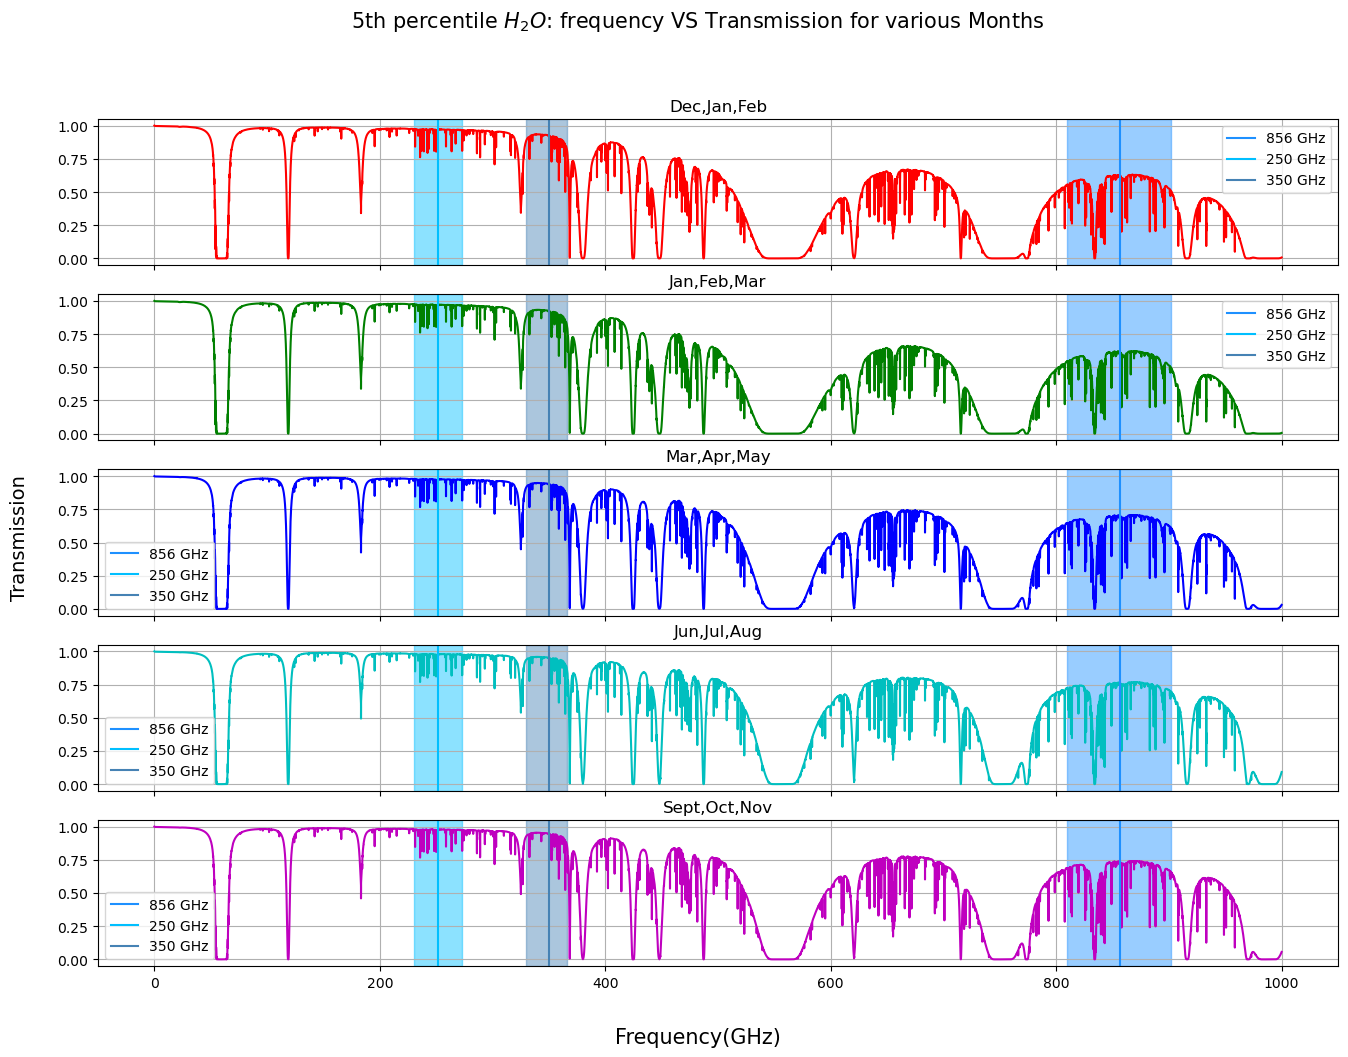

In [104]:
fig,axs = plt.subplots(5,1,sharex=True,sharey=True,figsize=(16,11))
fig.suptitle("5th percentile $ H_2O $: frequency VS Transmission for various Months",size=15)


axs[0].plot(f_CCAT_DJF_5,tx_CCAT_DJF_5,'r')#,label="Dec,Jan,Feb")
axs[0].set_title("Dec,Jan,Feb")
axs[0].axvspan(810, 902, color='dodgerblue', alpha=0.45)#, label="350um")
axs[0].axvline(x = 856.6, color = 'dodgerblue', label = '856 GHz')
#axs[0].axvspan(99, 150, color='dodgerblue', alpha=0.45, label="2-3mm")
axs[0].axvspan(230, 273, color='deepskyblue', alpha=0.45)#, label="1.1-1.3mm")
axs[0].axvline(x = 251.5, color = 'deepskyblue', label = '250 GHz')
axs[0].axvspan(330, 366, color='steelblue', alpha=0.45)#, label="740-860um")
axs[0].axvline(x = 350, color = 'steelblue', label = '350 GHz')
axs[0].legend()

axs[1].plot(f_CCAT_JFM_5,tx_CCAT_JFM_5,'g')#,label="Jan,Feb,Mar")
axs[1].set_title("Jan,Feb,Mar")
axs[1].axvspan(810, 902, color='dodgerblue', alpha=0.45)#, label="350um")
axs[1].axvline(x = 856.6, color = 'dodgerblue', label = '856 GHz')
#axs[0].axvspan(99, 150, color='dodgerblue', alpha=0.45, label="2-3mm")
axs[1].axvspan(230, 273, color='deepskyblue', alpha=0.45)#, label="1.1-1.3mm")
axs[1].axvline(x = 251.5, color = 'deepskyblue', label = '250 GHz')
axs[1].axvspan(330, 366, color='steelblue', alpha=0.45)#, label="740-860um")
axs[1].axvline(x = 350, color = 'steelblue', label = '350 GHz')
axs[1].legend()

axs[2].plot(f_CCAT_MAM_5,tx_CCAT_MAM_5,'b')#,label="Mar,Apr,May")
axs[2].set_title("Mar,Apr,May")
axs[2].axvspan(810, 902, color='dodgerblue', alpha=0.45)#, label="350um")
axs[2].axvline(x = 856.6, color = 'dodgerblue', label = '856 GHz')
#axs[0].axvspan(99, 150, color='dodgerblue', alpha=0.45, label="2-3mm")
axs[2].axvspan(230, 273, color='deepskyblue', alpha=0.45)#, label="1.1-1.3mm")
axs[2].axvline(x = 251.5, color = 'deepskyblue', label = '250 GHz')
axs[2].axvspan(330, 366, color='steelblue', alpha=0.45)#, label="740-860um")
axs[2].axvline(x = 350, color = 'steelblue', label = '350 GHz')
axs[2].legend()

axs[3].plot(f_CCAT_JJA_5,tx_CCAT_JJA_5,'c')#,label="Jun,Jul,Aug")
axs[3].set_title("Jun,Jul,Aug")
axs[3].axvspan(810, 902, color='dodgerblue', alpha=0.45)#, label="350um")
axs[3].axvline(x = 856.6, color = 'dodgerblue', label = '856 GHz')
#axs30].axvspan(99, 150, color='dodgerblue', alpha=0.45, label="2-3mm")
axs[3].axvspan(230, 273, color='deepskyblue', alpha=0.45)#, label="1.1-1.3mm")
axs[3].axvline(x = 251.5, color = 'deepskyblue', label = '250 GHz')
axs[3].axvspan(330, 366, color='steelblue', alpha=0.45)#, label="740-860um")
axs[3].axvline(x = 350, color = 'steelblue', label = '350 GHz')
axs[3].legend()

axs[4].plot(f_CCAT_SON_5,tx_CCAT_SON_5,'m')#,label="Sept,Oct,Nov")
axs[4].set_title("Sept,Oct,Nov")
axs[4].axvspan(810, 902, color='dodgerblue', alpha=0.45)#, label="350um")
axs[4].axvline(x = 856.6, color = 'dodgerblue', label = '856 GHz')
#axs[0].axvspan(99, 150, color='dodgerblue', alpha=0.45, label="2-3mm")
axs[4].axvspan(230, 273, color='deepskyblue', alpha=0.45)#, label="1.1-1.3mm")
axs[4].axvline(x = 251.5, color = 'deepskyblue', label = '250 GHz')
axs[4].axvspan(330, 366, color='steelblue', alpha=0.45)#, label="740-860um")
axs[4].axvline(x = 350, color = 'steelblue', label = '350 GHz')
axs[4].legend()


fig.text(0.5, 0.04, 'Frequency(GHz)', ha='center',size=15)
fig.text(0.07, 0.5, 'Transmission', va='center', rotation='vertical',size=14)

plt.savefig("v1_outputs/5th percentile $ H_2O $: frequency VS Transmission for various Months_V1.jpg",dpi="figure")

plt.show()

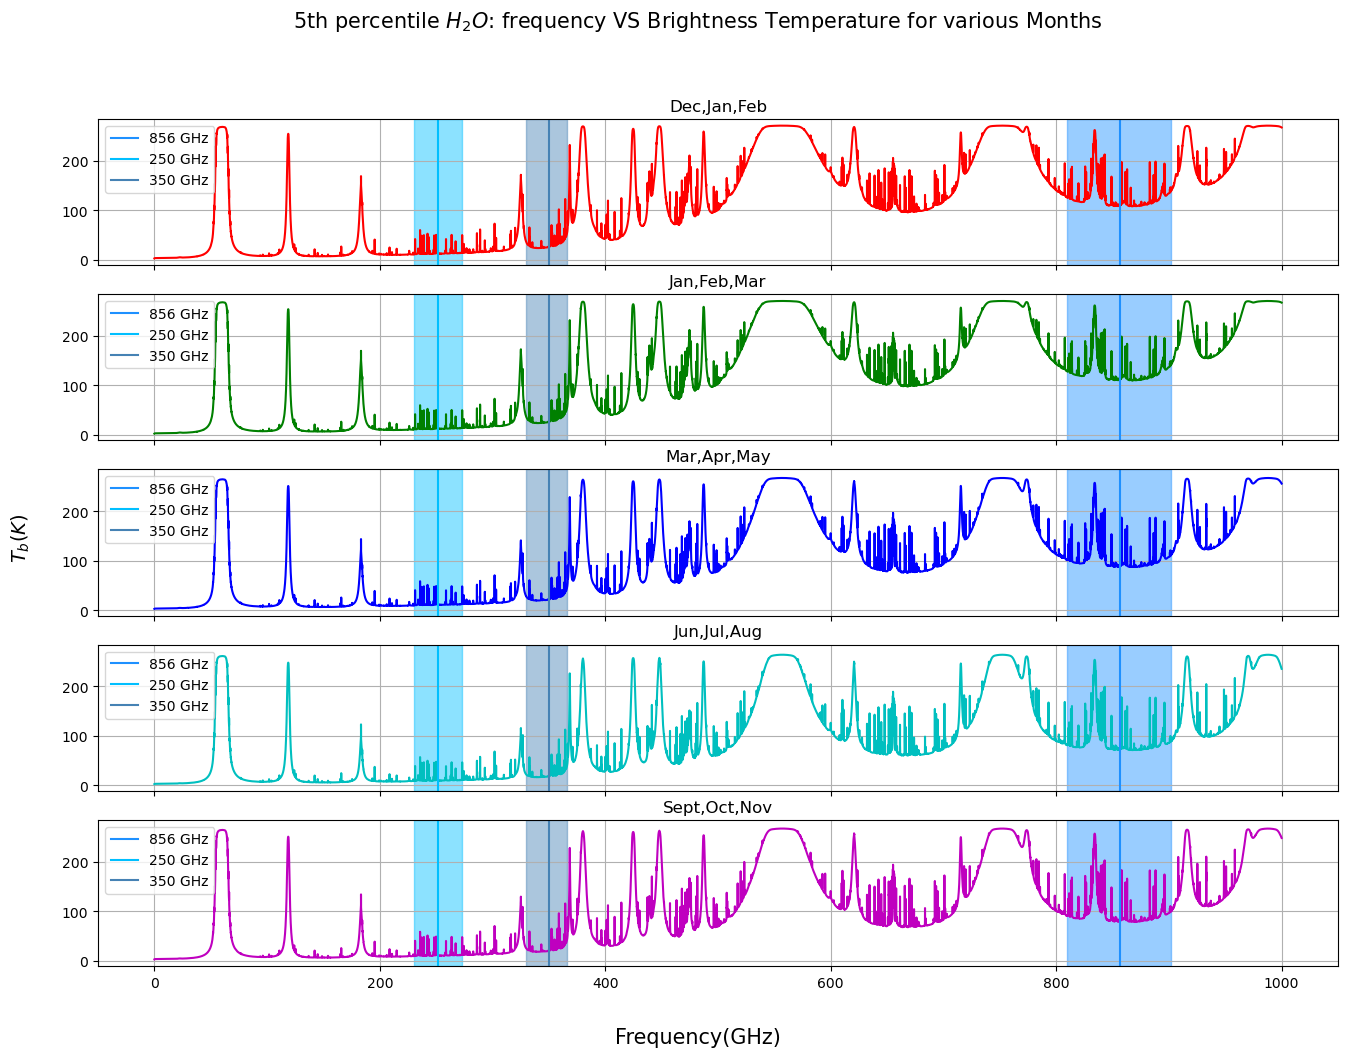

In [105]:
fig,axs = plt.subplots(5,1,sharex=True,sharey=True,figsize=(16,11))
fig.suptitle("5th percentile $ H_2O $: frequency VS Brightness Temperature for various Months",size=15)


axs[0].plot(f_CCAT_DJF_5,tb_CCAT_DJF_5,'r')#,label="Dec,Jan,Feb")
axs[0].set_title("Dec,Jan,Feb")
axs[0].axvspan(810, 902, color='dodgerblue', alpha=0.45)#, label="350um")
axs[0].axvline(x = 856.6, color = 'dodgerblue', label = '856 GHz')
#axs[0].axvspan(99, 150, color='dodgerblue', alpha=0.45, label="2-3mm")
axs[0].axvspan(230, 273, color='deepskyblue', alpha=0.45)#, label="1.1-1.3mm")
axs[0].axvline(x = 251.5, color = 'deepskyblue', label = '250 GHz')
axs[0].axvspan(330, 366, color='steelblue', alpha=0.45)#, label="740-860um")
axs[0].axvline(x = 350, color = 'steelblue', label = '350 GHz')
axs[0].legend()

axs[1].plot(f_CCAT_JFM_5,tb_CCAT_JFM_5,'g')#,label="Jan,Feb,Mar")
axs[1].set_title("Jan,Feb,Mar")
axs[1].axvspan(810, 902, color='dodgerblue', alpha=0.45)#, label="350um")
axs[1].axvline(x = 856.6, color = 'dodgerblue', label = '856 GHz')
#axs[0].axvspan(99, 150, color='dodgerblue', alpha=0.45, label="2-3mm")
axs[1].axvspan(230, 273, color='deepskyblue', alpha=0.45)#, label="1.1-1.3mm")
axs[1].axvline(x = 251.5, color = 'deepskyblue', label = '250 GHz')
axs[1].axvspan(330, 366, color='steelblue', alpha=0.45)#, label="740-860um")
axs[1].axvline(x = 350, color = 'steelblue', label = '350 GHz')
axs[1].legend()

axs[2].plot(f_CCAT_MAM_5,tb_CCAT_MAM_5,'b')#,label="Mar,Apr,May")
axs[2].set_title("Mar,Apr,May")
axs[2].axvspan(810, 902, color='dodgerblue', alpha=0.45)#, label="350um")
axs[2].axvline(x = 856.6, color = 'dodgerblue', label = '856 GHz')
#axs[0].axvspan(99, 150, color='dodgerblue', alpha=0.45, label="2-3mm")
axs[2].axvspan(230, 273, color='deepskyblue', alpha=0.45)#, label="1.1-1.3mm")
axs[2].axvline(x = 251.5, color = 'deepskyblue', label = '250 GHz')
axs[2].axvspan(330, 366, color='steelblue', alpha=0.45)#, label="740-860um")
axs[2].axvline(x = 350, color = 'steelblue', label = '350 GHz')
axs[2].legend()

axs[3].plot(f_CCAT_JJA_5,tb_CCAT_JJA_5,'c')#,label="Jun,Jul,Aug")
axs[3].set_title("Jun,Jul,Aug")
axs[3].axvspan(810, 902, color='dodgerblue', alpha=0.45)#, label="350um")
axs[3].axvline(x = 856.6, color = 'dodgerblue', label = '856 GHz')
#axs[0].axvspan(99, 150, color='dodgerblue', alpha=0.45, label="2-3mm")
axs[3].axvspan(230, 273, color='deepskyblue', alpha=0.45)#, label="1.1-1.3mm")
axs[3].axvline(x = 251.5, color = 'deepskyblue', label = '250 GHz')
axs[3].axvspan(330, 366, color='steelblue', alpha=0.45)#, label="740-860um")
axs[3].axvline(x = 350, color = 'steelblue', label = '350 GHz')
axs[3].legend()

axs[4].plot(f_CCAT_SON_5,tb_CCAT_SON_5,'m')#,label="Sept,Oct,Nov")
axs[4].set_title("Sept,Oct,Nov")
axs[4].axvspan(810, 902, color='dodgerblue', alpha=0.45)#, label="350um")
axs[4].axvline(x = 856.6, color = 'dodgerblue', label = '856 GHz')
#axs[0].axvspan(99, 150, color='dodgerblue', alpha=0.45, label="2-3mm")
axs[4].axvspan(230, 273, color='deepskyblue', alpha=0.45)#, label="1.1-1.3mm")
axs[4].axvline(x = 251.5, color = 'deepskyblue', label = '250 GHz')
axs[4].axvspan(330, 366, color='steelblue', alpha=0.45)#, label="740-860um")
axs[4].axvline(x = 350, color = 'steelblue', label = '350 GHz')
axs[4].legend()


fig.text(0.5, 0.04, 'Frequency(GHz)', ha='center',size=15)
fig.text(0.07, 0.5, '$ T_b (K) $', va='center', rotation='vertical',size=14)

plt.savefig("v1_outputs/5th percentile $ H_2O $: frequency VS Brightness Temperature for various Months_V1.jpg",dpi="figure")

plt.show()

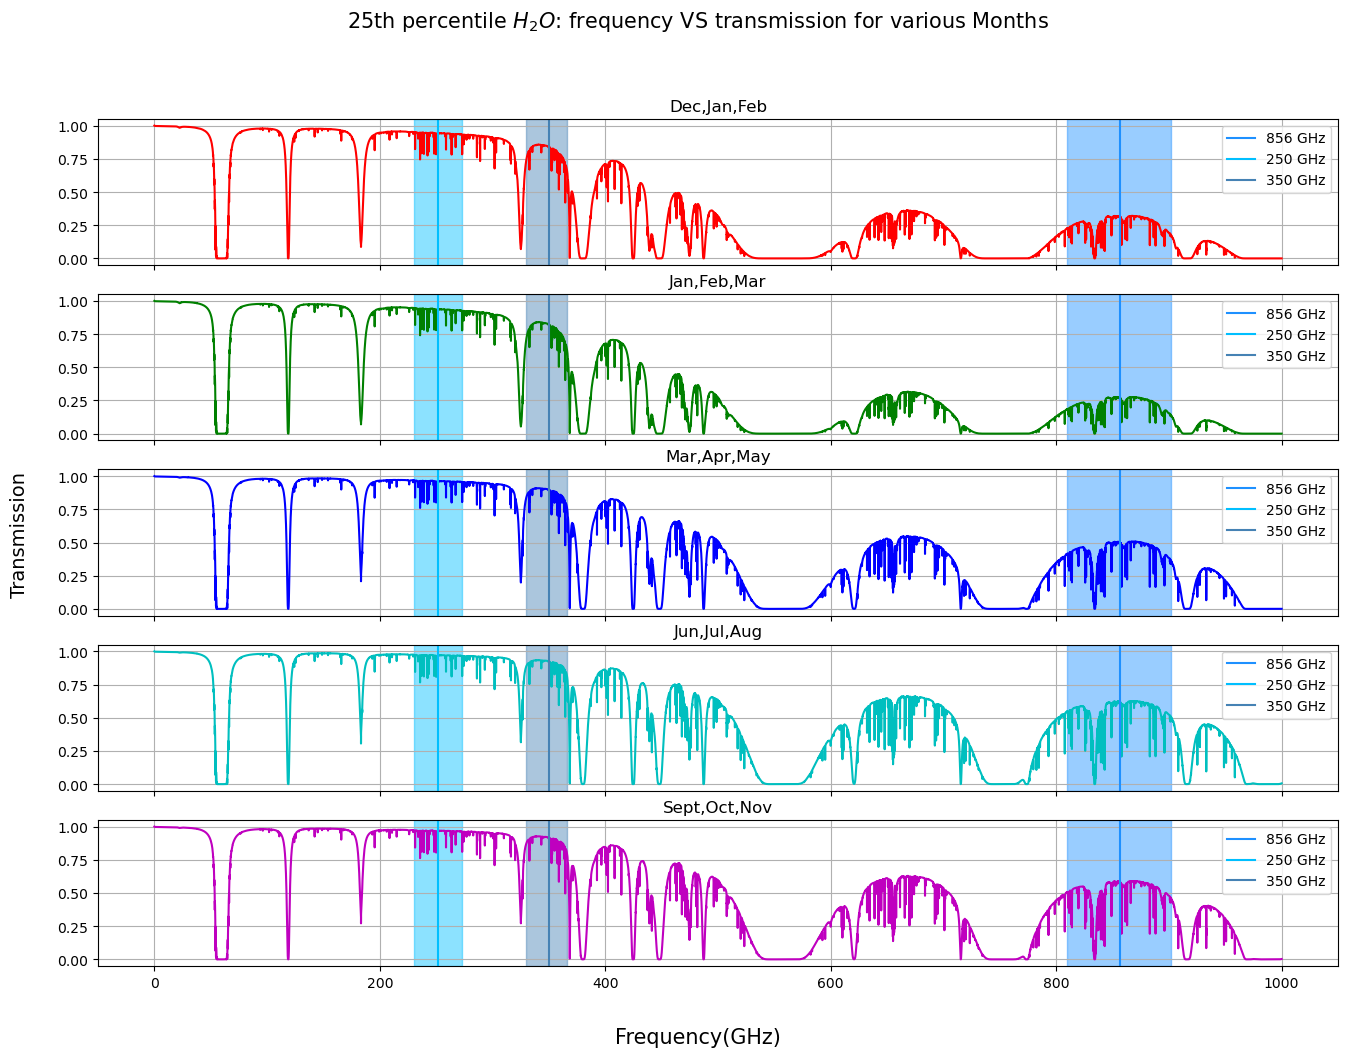

In [106]:
fig,axs = plt.subplots(5,1,sharex=True,sharey=True,figsize=(16,11))
fig.suptitle("25th percentile $ H_2O $: frequency VS transmission for various Months",size=15)


axs[0].plot(f_CCAT_DJF_25,tx_CCAT_DJF_25,'r')#,label="Dec,Jan,Feb")
axs[0].set_title("Dec,Jan,Feb")
axs[0].axvspan(810, 902, color='dodgerblue', alpha=0.45)#, label="350um")
axs[0].axvline(x = 856.6, color = 'dodgerblue', label = '856 GHz')
#axs[0].axvspan(99, 150, color='dodgerblue', alpha=0.45, label="2-3mm")
axs[0].axvspan(230, 273, color='deepskyblue', alpha=0.45)#, label="1.1-1.3mm")
axs[0].axvline(x = 251.5, color = 'deepskyblue', label = '250 GHz')
axs[0].axvspan(330, 366, color='steelblue', alpha=0.45)#, label="740-860um")
axs[0].axvline(x = 350, color = 'steelblue', label = '350 GHz')
axs[0].legend()

axs[1].plot(f_CCAT_JFM_25,tx_CCAT_JFM_25,'g')#,label="Jan,Feb,Mar")
axs[1].set_title("Jan,Feb,Mar")
axs[1].axvspan(810, 902, color='dodgerblue', alpha=0.45)#, label="350um")
axs[1].axvline(x = 856.6, color = 'dodgerblue', label = '856 GHz')
#axs[0].axvspan(99, 150, color='dodgerblue', alpha=0.45, label="2-3mm")
axs[1].axvspan(230, 273, color='deepskyblue', alpha=0.45)#, label="1.1-1.3mm")
axs[1].axvline(x = 251.5, color = 'deepskyblue', label = '250 GHz')
axs[1].axvspan(330, 366, color='steelblue', alpha=0.45)#, label="740-860um")
axs[1].axvline(x = 350, color = 'steelblue', label = '350 GHz')
axs[1].legend()

axs[2].plot(f_CCAT_MAM_25,tx_CCAT_MAM_25,'b')#,label="Mar,Apr,May")
axs[2].set_title("Mar,Apr,May")
axs[2].axvspan(810, 902, color='dodgerblue', alpha=0.45)#, label="350um")
axs[2].axvline(x = 856.6, color = 'dodgerblue', label = '856 GHz')
#axs[0].axvspan(99, 150, color='dodgerblue', alpha=0.45, label="2-3mm")
axs[2].axvspan(230, 273, color='deepskyblue', alpha=0.45)#, label="1.1-1.3mm")
axs[2].axvline(x = 251.5, color = 'deepskyblue', label = '250 GHz')
axs[2].axvspan(330, 366, color='steelblue', alpha=0.45)#, label="740-860um")
axs[2].axvline(x = 350, color = 'steelblue', label = '350 GHz')
axs[2].legend()

axs[3].plot(f_CCAT_JJA_25,tx_CCAT_JJA_25,'c')#,label="Jun,Jul,Aug")
axs[3].set_title("Jun,Jul,Aug")
axs[3].axvspan(810, 902, color='dodgerblue', alpha=0.45)#, label="350um")
axs[3].axvline(x = 856.6, color = 'dodgerblue', label = '856 GHz')
#axs[0].axvspan(99, 150, color='dodgerblue', alpha=0.45, label="2-3mm")
axs[3].axvspan(230, 273, color='deepskyblue', alpha=0.45)#, label="1.1-1.3mm")
axs[3].axvline(x = 251.5, color = 'deepskyblue', label = '250 GHz')
axs[3].axvspan(330, 366, color='steelblue', alpha=0.45)#, label="740-860um")
axs[3].axvline(x = 350, color = 'steelblue', label = '350 GHz')
axs[3].legend()

axs[4].plot(f_CCAT_SON_25,tx_CCAT_SON_25,'m')#,label="Sept,Oct,Nov")
axs[4].set_title("Sept,Oct,Nov")
axs[4].axvspan(810, 902, color='dodgerblue', alpha=0.45)#, label="350um")
axs[4].axvline(x = 856.6, color = 'dodgerblue', label = '856 GHz')
#axs[0].axvspan(99, 150, color='dodgerblue', alpha=0.45, label="2-3mm")
axs[4].axvspan(230, 273, color='deepskyblue', alpha=0.45)#, label="1.1-1.3mm")
axs[4].axvline(x = 251.5, color = 'deepskyblue', label = '250 GHz')
axs[4].axvspan(330, 366, color='steelblue', alpha=0.45)#, label="740-860um")
axs[4].axvline(x = 350, color = 'steelblue', label = '350 GHz')
axs[4].legend()


fig.text(0.5, 0.04, 'Frequency(GHz)', ha='center',size=15)
fig.text(0.07, 0.5, ' Transmission', va='center', rotation='vertical',size=14)

plt.savefig("v1_outputs/25th percentile $ H_2O $: frequency VS transmission for various Months_V1.jpg",dpi="figure")

plt.show()

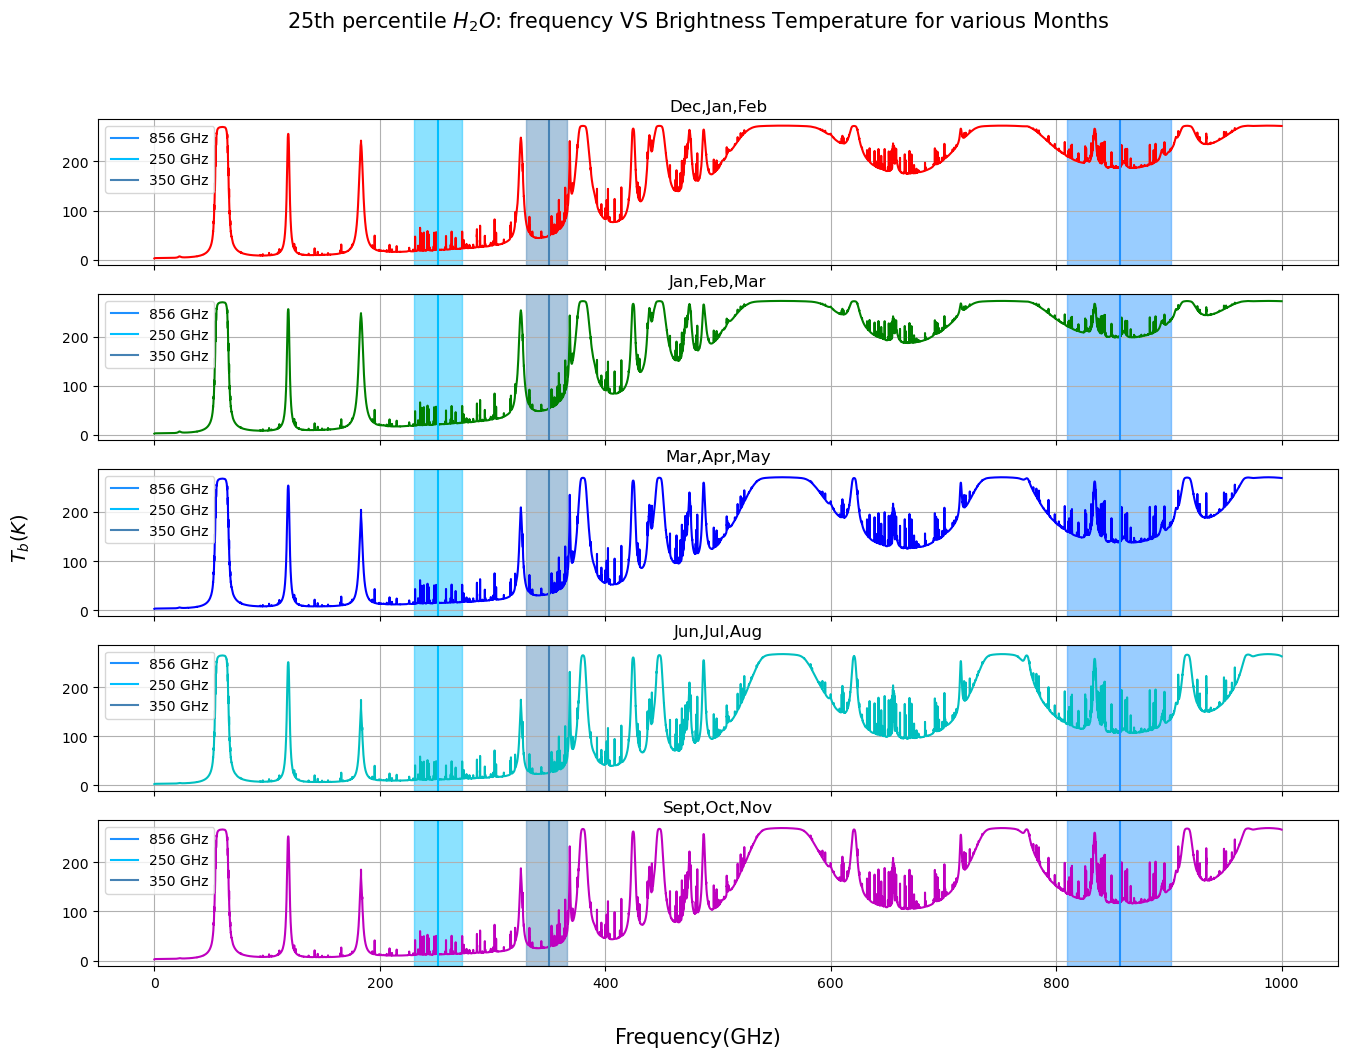

In [107]:
fig,axs = plt.subplots(5,1,sharex=True,sharey=True,figsize=(16,11))
fig.suptitle("25th percentile $ H_2O $: frequency VS Brightness Temperature for various Months",size=15)


axs[0].plot(f_CCAT_DJF_25,tb_CCAT_DJF_25,'r')#,label="Dec,Jan,Feb")
axs[0].set_title("Dec,Jan,Feb")
axs[0].axvspan(810, 902, color='dodgerblue', alpha=0.45)#, label="350um")
axs[0].axvline(x = 856.6, color = 'dodgerblue', label = '856 GHz')
#axs[0].axvspan(99, 150, color='dodgerblue', alpha=0.45, label="2-3mm")
axs[0].axvspan(230, 273, color='deepskyblue', alpha=0.45)#, label="1.1-1.3mm")
axs[0].axvline(x = 251.5, color = 'deepskyblue', label = '250 GHz')
axs[0].axvspan(330, 366, color='steelblue', alpha=0.45)#, label="740-860um")
axs[0].axvline(x = 350, color = 'steelblue', label = '350 GHz')
axs[0].legend()

axs[1].plot(f_CCAT_JFM_25,tb_CCAT_JFM_25,'g')#,label="Jan,Feb,Mar")
axs[1].set_title("Jan,Feb,Mar")
axs[1].axvspan(810, 902, color='dodgerblue', alpha=0.45)#, label="350um")
axs[1].axvline(x = 856.6, color = 'dodgerblue', label = '856 GHz')
#ax0].axvspan(99, 150, color='dodgerblue', alpha=0.45, label="2-3mm")
axs[1].axvspan(230, 273, color='deepskyblue', alpha=0.45)#, label="1.1-1.3mm")
axs[1].axvline(x = 251.5, color = 'deepskyblue', label = '250 GHz')
axs[1].axvspan(330, 366, color='steelblue', alpha=0.45)#, label="740-860um")
axs[1].axvline(x = 350, color = 'steelblue', label = '350 GHz')
axs[1].legend()

axs[2].plot(f_CCAT_MAM_25,tb_CCAT_MAM_25,'b')#,label="Mar,Apr,May")
axs[2].set_title("Mar,Apr,May")
axs[2].axvspan(810, 902, color='dodgerblue', alpha=0.45)#, label="350um")
axs[2].axvline(x = 856.6, color = 'dodgerblue', label = '856 GHz')
#axs[0].axvspan(99, 150, color='dodgerblue', alpha=0.45, label="2-3mm")
axs[2].axvspan(230, 273, color='deepskyblue', alpha=0.45)#, label="1.1-1.3mm")
axs[2].axvline(x = 251.5, color = 'deepskyblue', label = '250 GHz')
axs[2].axvspan(330, 366, color='steelblue', alpha=0.45)#, label="740-860um")
axs[2].axvline(x = 350, color = 'steelblue', label = '350 GHz')
axs[2].legend()

axs[3].plot(f_CCAT_JJA_25,tb_CCAT_JJA_25,'c')#,label="Jun,Jul,Aug")
#axs[3].plot(f_CCAT_JJA_25,tx_CCAT_JJA_25,'c',label="Jun,Jul,Aug")
axs[3].set_title("Jun,Jul,Aug")
axs[3].axvspan(810, 902, color='dodgerblue', alpha=0.45)#, label="350um")
axs[3].axvline(x = 856.6, color = 'dodgerblue', label = '856 GHz')
#axs[0].axvspan(99, 150, color='dodgerblue', alpha=0.45, label="2-3mm")
axs[3].axvspan(230, 273, color='deepskyblue', alpha=0.45)#, label="1.1-1.3mm")
axs[3].axvline(x = 251.5, color = 'deepskyblue', label = '250 GHz')
axs[3].axvspan(330, 366, color='steelblue', alpha=0.45)#, label="740-860um")
axs[3].axvline(x = 350, color = 'steelblue', label = '350 GHz')
axs[3].legend()

axs[4].plot(f_CCAT_SON_25,tb_CCAT_SON_25,'m')#,label="Sept,Oct,Nov")
axs[4].set_title("Sept,Oct,Nov")
axs[4].axvspan(810, 902, color='dodgerblue', alpha=0.45)#, label="350um")
axs[4].axvline(x = 856.6, color = 'dodgerblue', label = '856 GHz')
#axs[0].axvspan(99, 150, color='dodgerblue', alpha=0.45, label="2-3mm")
axs[4].axvspan(230, 273, color='deepskyblue', alpha=0.45)#, label="1.1-1.3mm")
axs[4].axvline(x = 251.5, color = 'deepskyblue', label = '250 GHz')
axs[4].axvspan(330, 366, color='steelblue', alpha=0.45)#, label="740-860um")
axs[4].axvline(x = 350, color = 'steelblue', label = '350 GHz')
axs[4].legend()


fig.text(0.5, 0.04, 'Frequency(GHz)', ha='center',size=15)
fig.text(0.07, 0.5, '$ T_b (K) $', va='center', rotation='vertical',size=14)

plt.savefig("v1_outputs/25th percentile $ H_2O $: frequency VS Brightness Temperature for various Months_V1.jpg",dpi="figure")

plt.show()

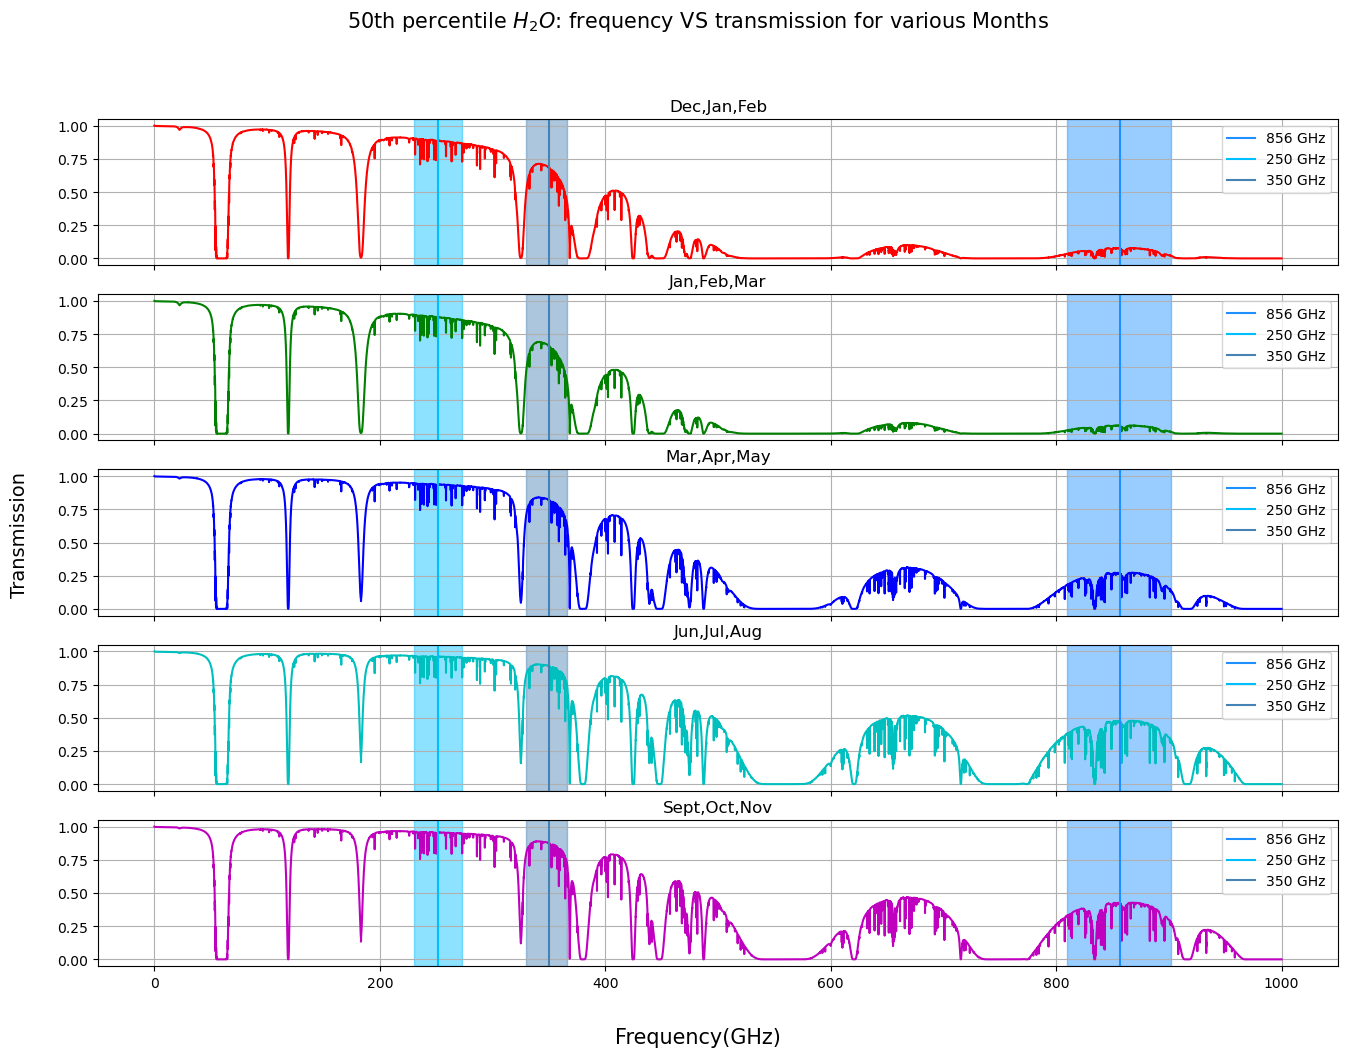

In [108]:
fig,axs = plt.subplots(5,1,sharex=True,sharey=True,figsize=(16,11))
fig.suptitle("50th percentile $ H_2O $: frequency VS transmission for various Months",size=15)


axs[0].plot(f_CCAT_DJF_50,tx_CCAT_DJF_50,'r')#,label="Dec,Jan,Feb")
axs[0].set_title("Dec,Jan,Feb")
axs[0].axvspan(810, 902, color='dodgerblue', alpha=0.45)#, label="350um")
axs[0].axvline(x = 856.6, color = 'dodgerblue', label = '856 GHz')
#axs[0].axvspan(99, 150, color='dodgerblue', alpha=0.45, label="2-3mm")
axs[0].axvspan(230, 273, color='deepskyblue', alpha=0.45)#, label="1.1-1.3mm")
axs[0].axvline(x = 251.5, color = 'deepskyblue', label = '250 GHz')
axs[0].axvspan(330, 366, color='steelblue', alpha=0.45)#, label="740-860um")
axs[0].axvline(x = 350, color = 'steelblue', label = '350 GHz')
axs[0].legend()

axs[1].plot(f_CCAT_JFM_50,tx_CCAT_JFM_50,'g')#,label="Jan,Feb,Mar")
axs[1].set_title("Jan,Feb,Mar")
axs[1].axvspan(810, 902, color='dodgerblue', alpha=0.45)#, label="350um")
axs[1].axvline(x = 856.6, color = 'dodgerblue', label = '856 GHz')
#axs[0].axvspan(99, 150, color='dodgerblue', alpha=0.45, label="2-3mm")
axs[1].axvspan(230, 273, color='deepskyblue', alpha=0.45)#, label="1.1-1.3mm")
axs[1].axvline(x = 251.5, color = 'deepskyblue', label = '250 GHz')
axs[1].axvspan(330, 366, color='steelblue', alpha=0.45)#, label="740-860um")
axs[1].axvline(x = 350, color = 'steelblue', label = '350 GHz')
axs[1].legend()

axs[2].plot(f_CCAT_MAM_50,tx_CCAT_MAM_50,'b')#,label="Mar,Apr,May")
axs[2].set_title("Mar,Apr,May")
axs[2].axvspan(810, 902, color='dodgerblue', alpha=0.45)#, label="350um")
axs[2].axvline(x = 856.6, color = 'dodgerblue', label = '856 GHz')
#axs[0].axvspan(99, 150, color='dodgerblue', alpha=0.45, label="2-3mm")
axs[2].axvspan(230, 273, color='deepskyblue', alpha=0.45)#, label="1.1-1.3mm")
axs[2].axvline(x = 251.5, color = 'deepskyblue', label = '250 GHz')
axs[2].axvspan(330, 366, color='steelblue', alpha=0.45)#, label="740-860um")
axs[2].axvline(x = 350, color = 'steelblue', label = '350 GHz')
axs[2].legend()

axs[3].plot(f_CCAT_JJA_50,tx_CCAT_JJA_50,'c')#,label="Jun,Jul,Aug")
axs[3].set_title("Jun,Jul,Aug")
axs[3].axvspan(810, 902, color='dodgerblue', alpha=0.45)#, label="350um")
axs[3].axvline(x = 856.6, color = 'dodgerblue', label = '856 GHz')
#axs[0].axvspan(99, 150, color='dodgerblue', alpha=0.45, label="2-3mm")
axs[3].axvspan(230, 273, color='deepskyblue', alpha=0.45)#, label="1.1-1.3mm")
axs[3].axvline(x = 251.5, color = 'deepskyblue', label = '250 GHz')
axs[3].axvspan(330, 366, color='steelblue', alpha=0.45)#, label="740-860um")
axs[3].axvline(x = 350, color = 'steelblue', label = '350 GHz')
axs[3].legend()

axs[4].plot(f_CCAT_SON_50,tx_CCAT_SON_50,'m')#,label="Sept,Oct,Nov")
axs[4].set_title("Sept,Oct,Nov")
axs[4].axvspan(810, 902, color='dodgerblue', alpha=0.45)#, label="350um")
axs[4].axvline(x = 856.6, color = 'dodgerblue', label = '856 GHz')
#axs[0].axvspan(99, 150, color='dodgerblue', alpha=0.45, label="2-3mm")
axs[4].axvspan(230, 273, color='deepskyblue', alpha=0.45)#, label="1.1-1.3mm")
axs[4].axvline(x = 251.5, color = 'deepskyblue', label = '250 GHz')
axs[4].axvspan(330, 366, color='steelblue', alpha=0.45)#, label="740-860um")
axs[4].axvline(x = 350, color = 'steelblue', label = '350 GHz')
axs[4].legend()



fig.text(0.5, 0.04, 'Frequency(GHz)', ha='center',size=15)
fig.text(0.07, 0.5, ' Transmission', va='center', rotation='vertical',size=14)

plt.savefig("v1_outputs/50th percentile $ H_2O $: frequency VS transmission for various Months_V1.jpg",dpi="figure")

plt.show()

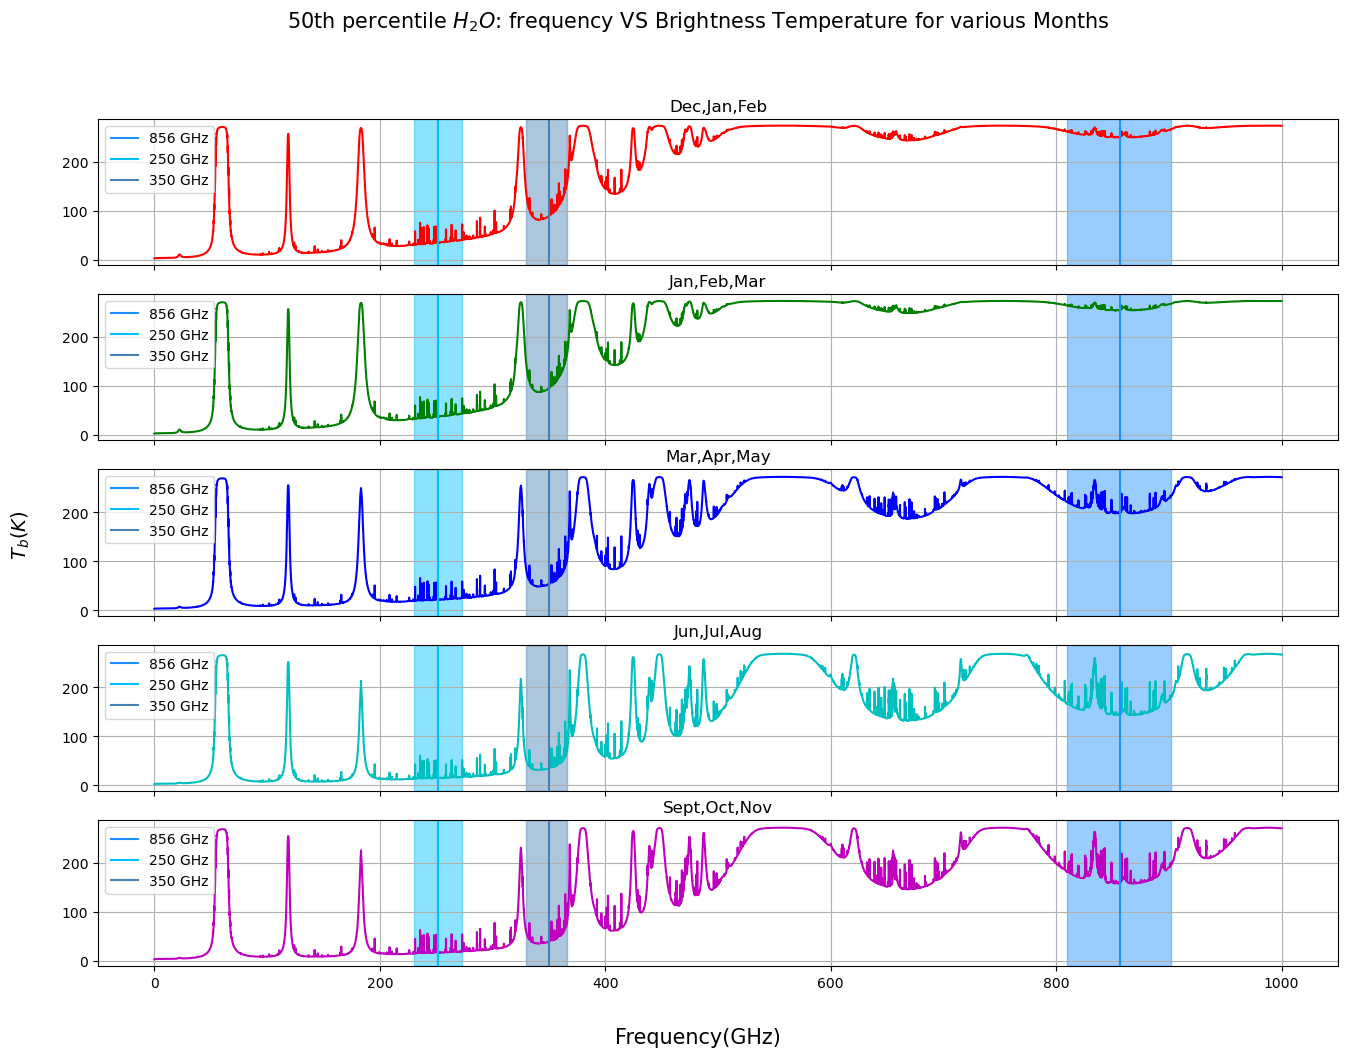

In [109]:
fig,axs = plt.subplots(5,1,sharex=True,sharey=True,figsize=(16,11))
fig.suptitle("50th percentile $ H_2O $: frequency VS Brightness Temperature for various Months",size=15)


axs[0].plot(f_CCAT_DJF_50,tb_CCAT_DJF_50,'r')#,label="Dec,Jan,Feb")
axs[0].set_title("Dec,Jan,Feb")
axs[0].axvspan(810, 902, color='dodgerblue', alpha=0.45)#, label="350um")
axs[0].axvline(x = 856.6, color = 'dodgerblue', label = '856 GHz')
#axs[0].axvspan(99, 150, color='dodgerblue', alpha=0.45, label="2-3mm")
axs[0].axvspan(230, 273, color='deepskyblue', alpha=0.45)#, label="1.1-1.3mm")
axs[0].axvline(x = 251.5, color = 'deepskyblue', label = '250 GHz')
axs[0].axvspan(330, 366, color='steelblue', alpha=0.45)#, label="740-860um")
axs[0].axvline(x = 350, color = 'steelblue', label = '350 GHz')
axs[0].legend()

axs[1].plot(f_CCAT_JFM_50,tb_CCAT_JFM_50,'g')#,label="Jan,Feb,Mar")
axs[1].set_title("Jan,Feb,Mar")
axs[1].axvspan(810, 902, color='dodgerblue', alpha=0.45)#, label="350um")
axs[1].axvline(x = 856.6, color = 'dodgerblue', label = '856 GHz')
#axs[0].axvspan(99, 150, color='dodgerblue', alpha=0.45, label="2-3mm")
axs[1].axvspan(230, 273, color='deepskyblue', alpha=0.45)#, label="1.1-1.3mm")
axs[1].axvline(x = 251.5, color = 'deepskyblue', label = '250 GHz')
axs[1].axvspan(330, 366, color='steelblue', alpha=0.45)#, label="740-860um")
axs[1].axvline(x = 350, color = 'steelblue', label = '350 GHz')
axs[1].legend()

axs[2].plot(f_CCAT_MAM_50,tb_CCAT_MAM_50,'b')#,label="Mar,Apr,May")
axs[2].set_title("Mar,Apr,May")
axs[2].axvspan(810, 902, color='dodgerblue', alpha=0.45)#, label="350um")
axs[2].axvline(x = 856.6, color = 'dodgerblue', label = '856 GHz')
#axs[0].axvspan(99, 150, color='dodgerblue', alpha=0.45, label="2-3mm")
axs[2].axvspan(230, 273, color='deepskyblue', alpha=0.45)#, label="1.1-1.3mm")
axs[2].axvline(x = 251.5, color = 'deepskyblue', label = '250 GHz')
axs[2].axvspan(330, 366, color='steelblue', alpha=0.45)#, label="740-860um")
axs[2].axvline(x = 350, color = 'steelblue', label = '350 GHz')
axs[2].legend()

axs[3].plot(f_CCAT_JJA_50,tb_CCAT_JJA_50,'c')#,label="Jun,Jul,Aug")
axs[3].set_title("Jun,Jul,Aug")
axs[3].axvspan(810, 902, color='dodgerblue', alpha=0.45)#, label="350um")
axs[3].axvline(x = 856.6, color = 'dodgerblue', label = '856 GHz')
#axs[0].axvspan(99, 150, color='dodgerblue', alpha=0.45, label="2-3mm")
axs[3].axvspan(230, 273, color='deepskyblue', alpha=0.45)#, label="1.1-1.3mm")
axs[3].axvline(x = 251.5, color = 'deepskyblue', label = '250 GHz')
axs[3].axvspan(330, 366, color='steelblue', alpha=0.45)#, label="740-860um")
axs[3].axvline(x = 350, color = 'steelblue', label = '350 GHz')
axs[3].legend()


axs[4].plot(f_CCAT_SON_50,tb_CCAT_SON_50,'m')#,label="Sept,Oct,Nov")
axs[4].set_title("Sept,Oct,Nov")
axs[4].axvspan(810, 902, color='dodgerblue', alpha=0.45)#, label="350um")
axs[4].axvline(x = 856.6, color = 'dodgerblue', label = '856 GHz')
#axs[0].axvspan(99, 150, color='dodgerblue', alpha=0.45, label="2-3mm")
axs[4].axvspan(230, 273, color='deepskyblue', alpha=0.45)#, label="1.1-1.3mm")
axs[4].axvline(x = 251.5, color = 'deepskyblue', label = '250 GHz')
axs[4].axvspan(330, 366, color='steelblue', alpha=0.45)#, label="740-860um")
axs[4].axvline(x = 350, color = 'steelblue', label = '350 GHz')
axs[4].legend()

fig.text(0.5, 0.04, 'Frequency(GHz)', ha='center',size=15)
fig.text(0.07, 0.5, ' $ T_b (K) $', va='center', rotation='vertical',size=14)

plt.savefig("v1_outputs/50th percentile $ H_2O $: frequency VS Brightness Temperature for various Months_V1.jpg",dpi="figure")

plt.show()

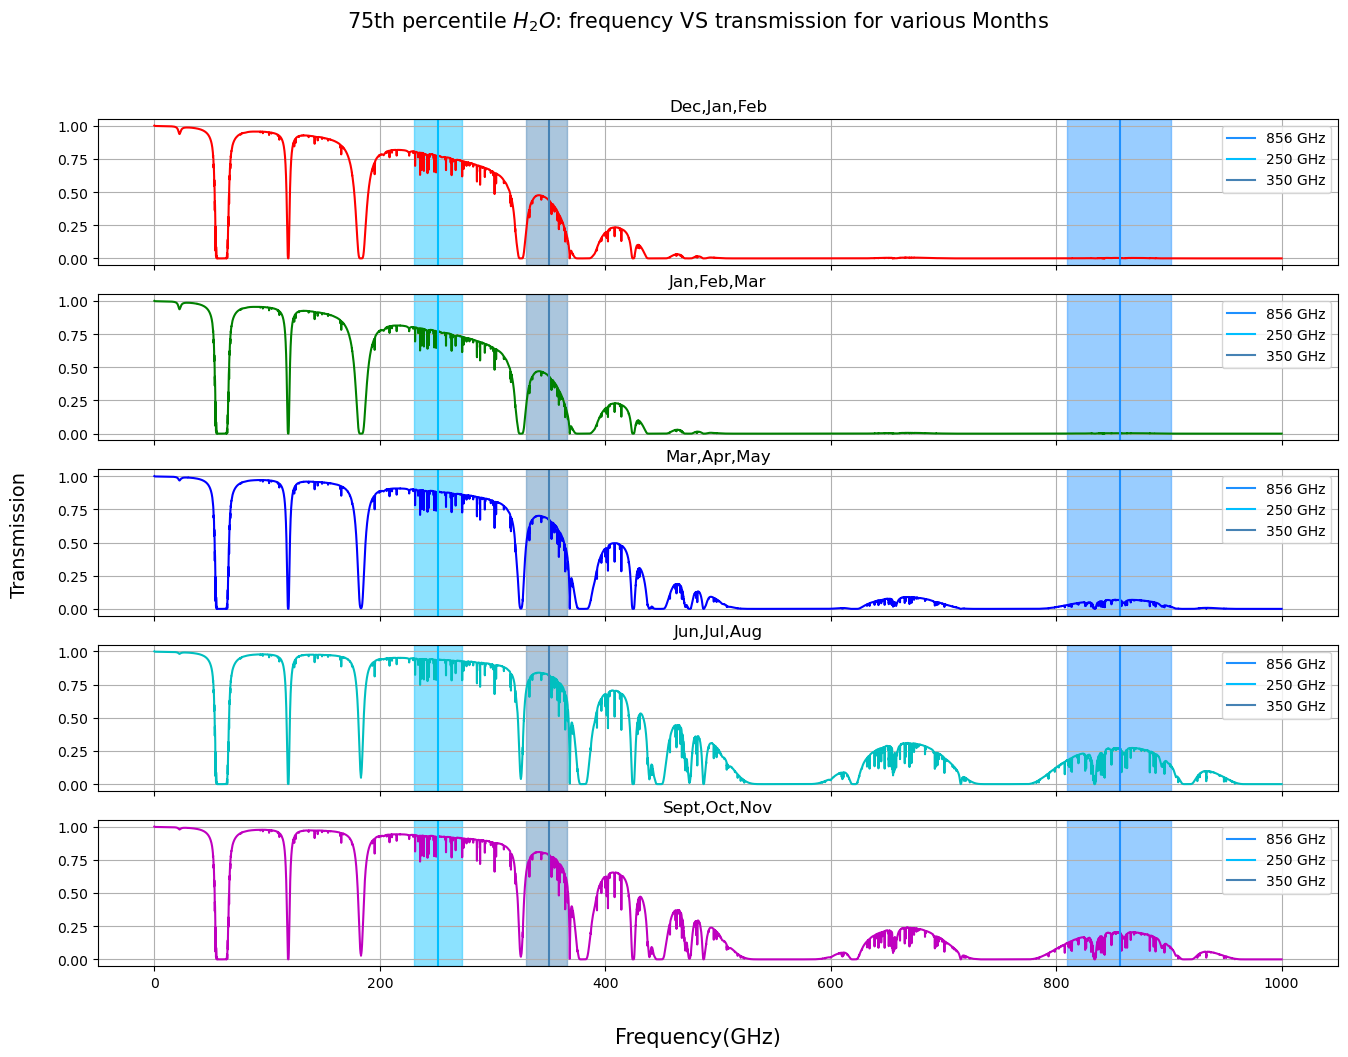

In [110]:
fig,axs = plt.subplots(5,1,sharex=True,sharey=True,figsize=(16,11))
fig.suptitle("75th percentile $ H_2O $: frequency VS transmission for various Months",size=15)


axs[0].plot(f_CCAT_DJF_75,tx_CCAT_DJF_75,'r')#,label="Dec,Jan,Feb")
axs[0].set_title("Dec,Jan,Feb")
axs[0].axvspan(810, 902, color='dodgerblue', alpha=0.45)#, label="350um")
axs[0].axvline(x = 856.6, color = 'dodgerblue', label = '856 GHz')
#axs[0].axvspan(99, 150, color='dodgerblue', alpha=0.45, label="2-3mm")
axs[0].axvspan(230, 273, color='deepskyblue', alpha=0.45)#, label="1.1-1.3mm")
axs[0].axvline(x = 251.5, color = 'deepskyblue', label = '250 GHz')
axs[0].axvspan(330, 366, color='steelblue', alpha=0.45)#, label="740-860um")
axs[0].axvline(x = 350, color = 'steelblue', label = '350 GHz')
axs[0].legend()

axs[1].plot(f_CCAT_JFM_75,tx_CCAT_JFM_75,'g')#,label="Jan,Feb,Mar")
axs[1].set_title("Jan,Feb,Mar")
axs[1].axvspan(810, 902, color='dodgerblue', alpha=0.45)#, label="350um")
axs[1].axvline(x = 856.6, color = 'dodgerblue', label = '856 GHz')
#axs[0].axvspan(99, 150, color='dodgerblue', alpha=0.45, label="2-3mm")
axs[1].axvspan(230, 273, color='deepskyblue', alpha=0.45)#, label="1.1-1.3mm")
axs[1].axvline(x = 251.5, color = 'deepskyblue', label = '250 GHz')
axs[1].axvspan(330, 366, color='steelblue', alpha=0.45)#, label="740-860um")
axs[1].axvline(x = 350, color = 'steelblue', label = '350 GHz')
axs[1].legend()


axs[2].plot(f_CCAT_MAM_75,tx_CCAT_MAM_75,'b')#,label="Mar,Apr,May")
axs[2].set_title("Mar,Apr,May")
axs[2].axvspan(810, 902, color='dodgerblue', alpha=0.45)#, label="350um")
axs[2].axvline(x = 856.6, color = 'dodgerblue', label = '856 GHz')
#axs[0].axvspan(99, 150, color='dodgerblue', alpha=0.45, label="2-3mm")
axs[2].axvspan(230, 273, color='deepskyblue', alpha=0.45)#, label="1.1-1.3mm")
axs[2].axvline(x = 251.5, color = 'deepskyblue', label = '250 GHz')
axs[2].axvspan(330, 366, color='steelblue', alpha=0.45)#, label="740-860um")
axs[2].axvline(x = 350, color = 'steelblue', label = '350 GHz')
axs[2].legend()

axs[3].plot(f_CCAT_JJA_75,tx_CCAT_JJA_75,'c')#,label="Jun,Jul,Aug")
axs[3].set_title("Jun,Jul,Aug")
axs[3].axvspan(810, 902, color='dodgerblue', alpha=0.45)#, label="350um")
axs[3].axvline(x = 856.6, color = 'dodgerblue', label = '856 GHz')
#axs[0].axvspan(99, 150, color='dodgerblue', alpha=0.45, label="2-3mm")
axs[3].axvspan(230, 273, color='deepskyblue', alpha=0.45)#, label="1.1-1.3mm")
axs[3].axvline(x = 251.5, color = 'deepskyblue', label = '250 GHz')
axs[3].axvspan(330, 366, color='steelblue', alpha=0.45)#, label="740-860um")
axs[3].axvline(x = 350, color = 'steelblue', label = '350 GHz')
axs[3].legend()

axs[4].plot(f_CCAT_SON_75,tx_CCAT_SON_75,'m')#,label="Sept,Oct,Nov")
axs[4].set_title("Sept,Oct,Nov")
axs[4].axvspan(810, 902, color='dodgerblue', alpha=0.45)#, label="350um")
axs[4].axvline(x = 856.6, color = 'dodgerblue', label = '856 GHz')
#axs[0].axvspan(99, 150, color='dodgerblue', alpha=0.45, label="2-3mm")
axs[4].axvspan(230, 273, color='deepskyblue', alpha=0.45)#, label="1.1-1.3mm")
axs[4].axvline(x = 251.5, color = 'deepskyblue', label = '250 GHz')
axs[4].axvspan(330, 366, color='steelblue', alpha=0.45)#, label="740-860um")
axs[4].axvline(x = 350, color = 'steelblue', label = '350 GHz')
axs[4].legend()


fig.text(0.5, 0.04, 'Frequency(GHz)', ha='center',size=15)
fig.text(0.07, 0.5, ' Transmission', va='center', rotation='vertical',size=14)


plt.savefig("v1_outputs/75th percentile $ H_2O $: frequency VS transmission for various Months_V1.jpg",dpi="figure")

plt.show()

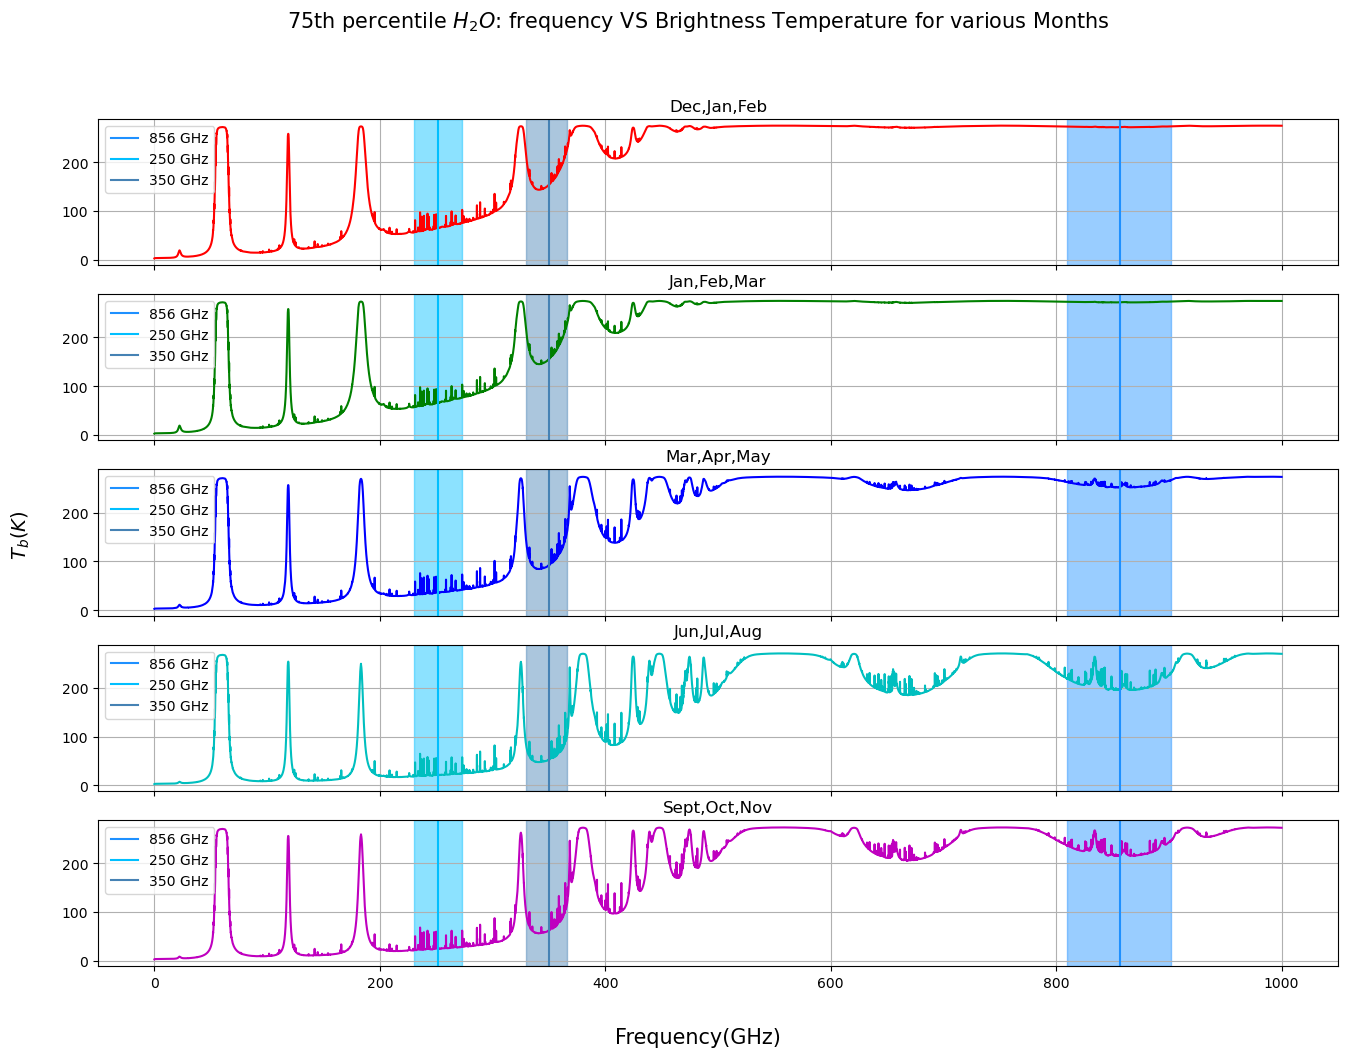

In [111]:
fig,axs = plt.subplots(5,1,sharex=True,sharey=True,figsize=(16,11))
fig.suptitle("75th percentile $ H_2O $: frequency VS Brightness Temperature for various Months",size=15)


axs[0].plot(f_CCAT_DJF_75,tb_CCAT_DJF_75,'r')#,label="Dec,Jan,Feb")
axs[0].set_title("Dec,Jan,Feb")
axs[0].axvspan(810, 902, color='dodgerblue', alpha=0.45)#, label="350um")
axs[0].axvline(x = 856.6, color = 'dodgerblue', label = '856 GHz')
#axs[0].axvspan(99, 150, color='dodgerblue', alpha=0.45, label="2-3mm")
axs[0].axvspan(230, 273, color='deepskyblue', alpha=0.45)#, label="1.1-1.3mm")
axs[0].axvline(x = 251.5, color = 'deepskyblue', label = '250 GHz')
axs[0].axvspan(330, 366, color='steelblue', alpha=0.45)#, label="740-860um")
axs[0].axvline(x = 350, color = 'steelblue', label = '350 GHz')
axs[0].legend()

axs[1].plot(f_CCAT_JFM_75,tb_CCAT_JFM_75,'g')#,label="Jan,Feb,Mar")
axs[1].set_title("Jan,Feb,Mar")
axs[1].axvspan(810, 902, color='dodgerblue', alpha=0.45)#, label="350um")
axs[1].axvline(x = 856.6, color = 'dodgerblue', label = '856 GHz')
#axs[0].axvspan(99, 150, color='dodgerblue', alpha=0.45, label="2-3mm")
axs[1].axvspan(230, 273, color='deepskyblue', alpha=0.45)#, label="1.1-1.3mm")
axs[1].axvline(x = 251.5, color = 'deepskyblue', label = '250 GHz')
axs[1].axvspan(330, 366, color='steelblue', alpha=0.45)#, label="740-860um")
axs[1].axvline(x = 350, color = 'steelblue', label = '350 GHz')
axs[1].legend()

axs[2].plot(f_CCAT_MAM_75,tb_CCAT_MAM_75,'b')#,label="Mar,Apr,May")
axs[2].set_title("Mar,Apr,May")
axs[2].axvspan(810, 902, color='dodgerblue', alpha=0.45)#, label="350um")
axs[2].axvline(x = 856.6, color = 'dodgerblue', label = '856 GHz')
#axs[0].axvspan(99, 150, color='dodgerblue', alpha=0.45, label="2-3mm")
axs[2].axvspan(230, 273, color='deepskyblue', alpha=0.45)#, label="1.1-1.3mm")
axs[2].axvline(x = 251.5, color = 'deepskyblue', label = '250 GHz')
axs[2].axvspan(330, 366, color='steelblue', alpha=0.45)#, label="740-860um")
axs[2].axvline(x = 350, color = 'steelblue', label = '350 GHz')
axs[2].legend()


axs[3].plot(f_CCAT_JJA_75,tb_CCAT_JJA_75,'c')#,label="Jun,Jul,Aug")
axs[3].set_title("Jun,Jul,Aug")
axs[3].axvspan(810, 902, color='dodgerblue', alpha=0.45)#, label="350um")
axs[3].axvline(x = 856.6, color = 'dodgerblue', label = '856 GHz')
#axs[0].axvspan(99, 150, color='dodgerblue', alpha=0.45, label="2-3mm")
axs[3].axvspan(230, 273, color='deepskyblue', alpha=0.45)#, label="1.1-1.3mm")
axs[3].axvline(x = 251.5, color = 'deepskyblue', label = '250 GHz')
axs[3].axvspan(330, 366, color='steelblue', alpha=0.45)#, label="740-860um")
axs[3].axvline(x = 350, color = 'steelblue', label = '350 GHz')
axs[3].legend()

axs[4].plot(f_CCAT_SON_75,tb_CCAT_SON_75,'m')#,label="Sept,Oct,Nov")
axs[4].set_title("Sept,Oct,Nov")
axs[4].axvspan(810, 902, color='dodgerblue', alpha=0.45)#, label="350um")
axs[4].axvline(x = 856.6, color = 'dodgerblue', label = '856 GHz')
#axs[0].axvspan(99, 150, color='dodgerblue', alpha=0.45, label="2-3mm")
axs[4].axvspan(230, 273, color='deepskyblue', alpha=0.45)#, label="1.1-1.3mm")
axs[4].axvline(x = 251.5, color = 'deepskyblue', label = '250 GHz')
axs[4].axvspan(330, 366, color='steelblue', alpha=0.45)#, label="740-860um")
axs[4].axvline(x = 350, color = 'steelblue', label = '350 GHz')
axs[4].legend()


fig.text(0.5, 0.04, 'Frequency(GHz)', ha='center',size=15)
fig.text(0.07, 0.5, ' $ T_b (K) $', va='center', rotation='vertical',size=14)

plt.savefig("v1_outputs/75th percentile $ H_2O $: frequency VS Brightness Temperature for various Months_V1.jpg",dpi="figure")

plt.show()

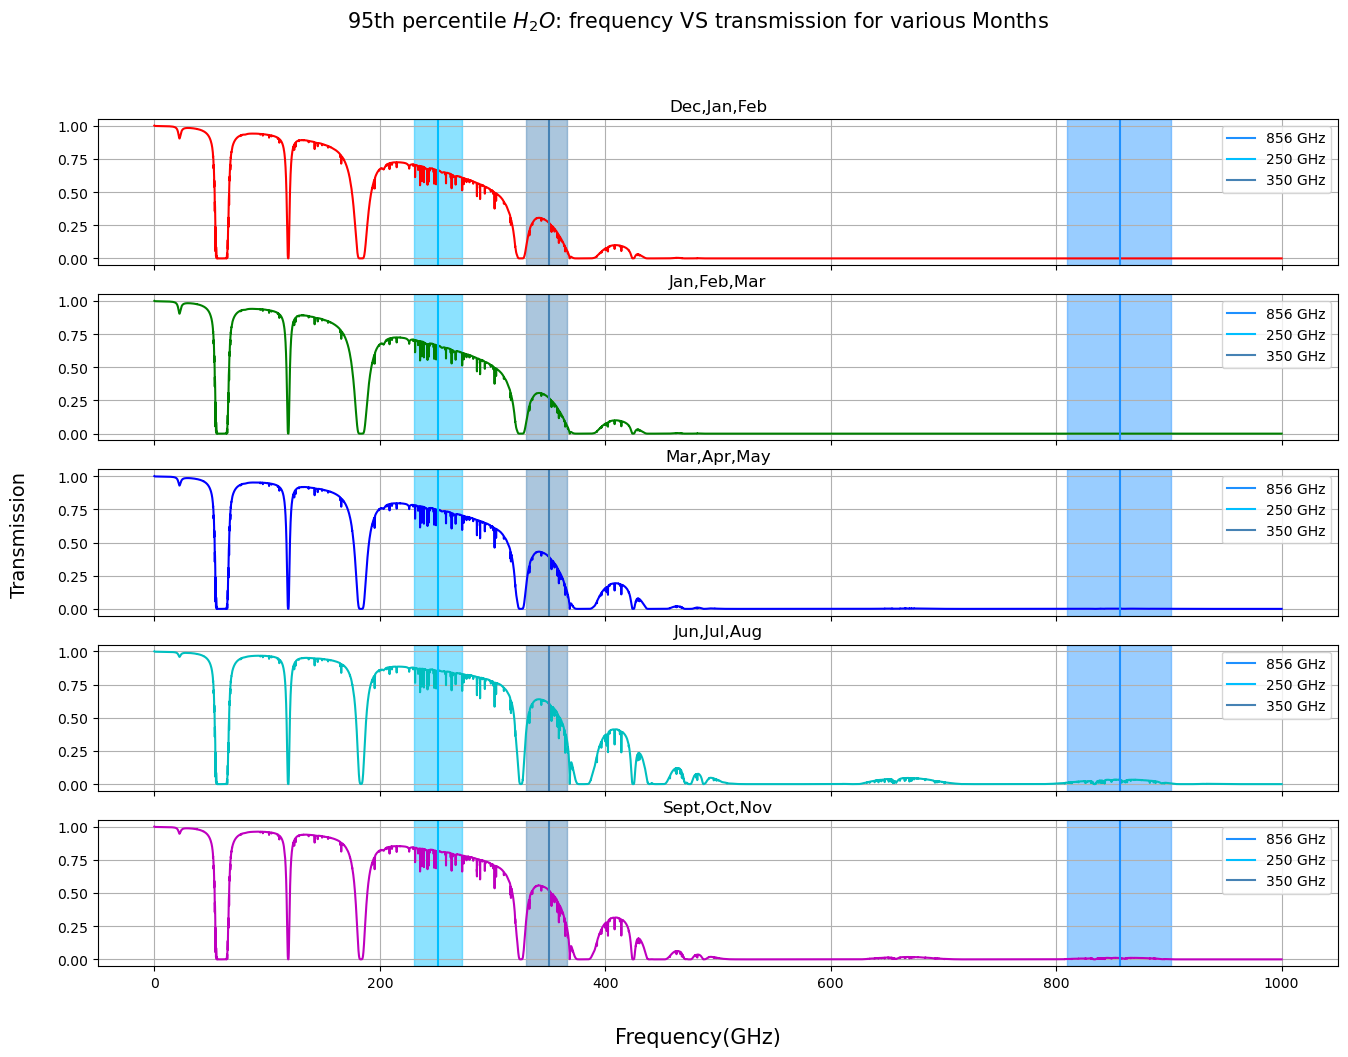

In [112]:
fig,axs = plt.subplots(5,1,sharex=True,sharey=True,figsize=(16,11))
fig.suptitle("95th percentile $ H_2O $: frequency VS transmission for various Months",size=15)


axs[0].plot(f_CCAT_DJF_95,tx_CCAT_DJF_95,'r')#,label="Dec,Jan,Feb")
axs[0].set_title("Dec,Jan,Feb")
axs[0].axvspan(810, 902, color='dodgerblue', alpha=0.45)#, label="350um")
axs[0].axvline(x = 856.6, color = 'dodgerblue', label = '856 GHz')
#axs[0].axvspan(99, 150, color='dodgerblue', alpha=0.45, label="2-3mm")
axs[0].axvspan(230, 273, color='deepskyblue', alpha=0.45)#, label="1.1-1.3mm")
axs[0].axvline(x = 251.5, color = 'deepskyblue', label = '250 GHz')
axs[0].axvspan(330, 366, color='steelblue', alpha=0.45)#, label="740-860um")
axs[0].axvline(x = 350, color = 'steelblue', label = '350 GHz')
axs[0].legend()

axs[1].plot(f_CCAT_JFM_95,tx_CCAT_JFM_95,'g')#,label="Jan,Feb,Mar")
axs[1].set_title("Jan,Feb,Mar")
axs[1].axvspan(810, 902, color='dodgerblue', alpha=0.45)#, label="350um")
axs[1].axvline(x = 856.6, color = 'dodgerblue', label = '856 GHz')
#axs[0].axvspan(99, 150, color='dodgerblue', alpha=0.45, label="2-3mm")
axs[1].axvspan(230, 273, color='deepskyblue', alpha=0.45)#, label="1.1-1.3mm")
axs[1].axvline(x = 251.5, color = 'deepskyblue', label = '250 GHz')
axs[1].axvspan(330, 366, color='steelblue', alpha=0.45)#, label="740-860um")
axs[1].axvline(x = 350, color = 'steelblue', label = '350 GHz')
axs[1].legend()

axs[2].plot(f_CCAT_MAM_95,tx_CCAT_MAM_95,'b')#,label="Mar,Apr,May")
axs[2].set_title("Mar,Apr,May")
axs[2].axvspan(810, 902, color='dodgerblue', alpha=0.45)#, label="350um")
axs[2].axvline(x = 856.6, color = 'dodgerblue', label = '856 GHz')
#axs[0].axvspan(99, 150, color='dodgerblue', alpha=0.45, label="2-3mm")
axs[2].axvspan(230, 273, color='deepskyblue', alpha=0.45)#, label="1.1-1.3mm")
axs[2].axvline(x = 251.5, color = 'deepskyblue', label = '250 GHz')
axs[2].axvspan(330, 366, color='steelblue', alpha=0.45)#, label="740-860um")
axs[2].axvline(x = 350, color = 'steelblue', label = '350 GHz')
axs[2].legend()


axs[3].plot(f_CCAT_JJA_95,tx_CCAT_JJA_95,'c')#,label="Jun,Jul,Aug")
axs[3].set_title("Jun,Jul,Aug")
axs[3].axvspan(810, 902, color='dodgerblue', alpha=0.45)#, label="350um")
axs[3].axvline(x = 856.6, color = 'dodgerblue', label = '856 GHz')
#axs[0].axvspan(99, 150, color='dodgerblue', alpha=0.45, label="2-3mm")
axs[3].axvspan(230, 273, color='deepskyblue', alpha=0.45)#, label="1.1-1.3mm")
axs[3].axvline(x = 251.5, color = 'deepskyblue', label = '250 GHz')
axs[3].axvspan(330, 366, color='steelblue', alpha=0.45)#, label="740-860um")
axs[3].axvline(x = 350, color = 'steelblue', label = '350 GHz')
axs[3].legend()

axs[4].plot(f_CCAT_SON_95,tx_CCAT_SON_95,'m')#,label="Sept,Oct,Nov")
axs[4].set_title("Sept,Oct,Nov")
axs[4].axvspan(810, 902, color='dodgerblue', alpha=0.45)#, label="350um")
axs[4].axvline(x = 856.6, color = 'dodgerblue', label = '856 GHz')
#axs[0].axvspan(99, 150, color='dodgerblue', alpha=0.45, label="2-3mm")
axs[4].axvspan(230, 273, color='deepskyblue', alpha=0.45)#, label="1.1-1.3mm")
axs[4].axvline(x = 251.5, color = 'deepskyblue', label = '250 GHz')
axs[4].axvspan(330, 366, color='steelblue', alpha=0.45)#, label="740-860um")
axs[4].axvline(x = 350, color = 'steelblue', label = '350 GHz')
axs[4].legend()


fig.text(0.5, 0.04, 'Frequency(GHz)', ha='center',size=15)
fig.text(0.07, 0.5, ' Transmission', va='center', rotation='vertical',size=14)

plt.savefig("v1_outputs/95th percentile $ H_2O $: frequency VS transmission for various Months_V1.jpg",dpi="figure")

plt.show()

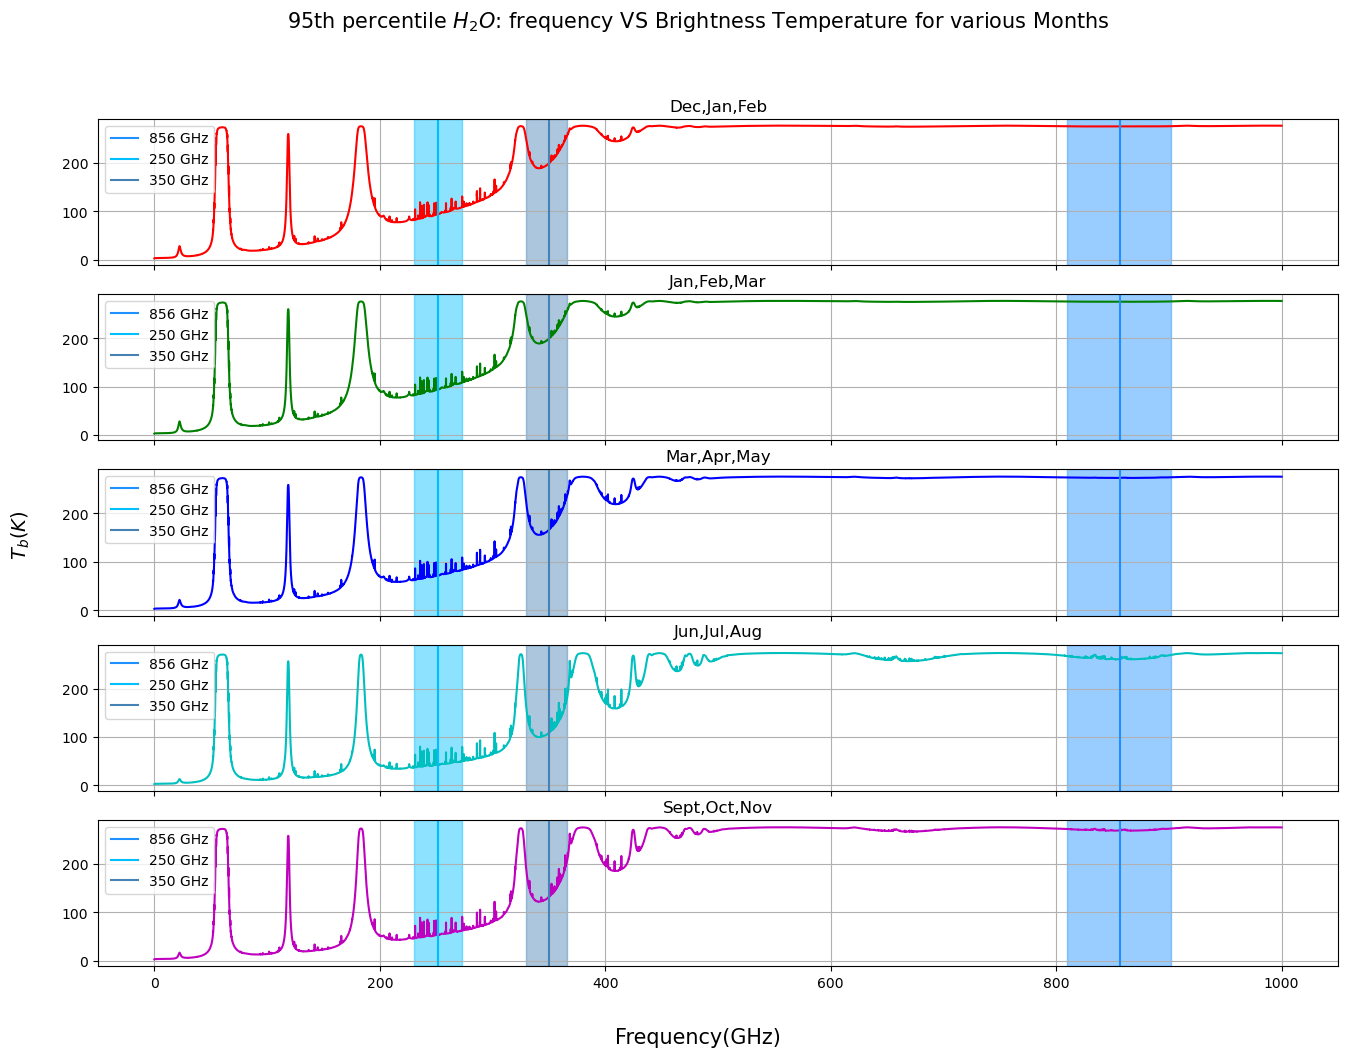

In [113]:
fig,axs = plt.subplots(5,1,sharex=True,sharey=True,figsize=(16,11))
fig.suptitle("95th percentile $ H_2O $: frequency VS Brightness Temperature for various Months",size=15)


axs[0].plot(f_CCAT_DJF_95,tb_CCAT_DJF_95,'r')#,label="Dec,Jan,Feb")
axs[0].set_title("Dec,Jan,Feb")
axs[0].axvspan(810, 902, color='dodgerblue', alpha=0.45)#, label="350um")
axs[0].axvline(x = 856.6, color = 'dodgerblue', label = '856 GHz')
#axs[0].axvspan(99, 150, color='dodgerblue', alpha=0.45, label="2-3mm")
axs[0].axvspan(230, 273, color='deepskyblue', alpha=0.45)#, label="1.1-1.3mm")
axs[0].axvline(x = 251.5, color = 'deepskyblue', label = '250 GHz')
axs[0].axvspan(330, 366, color='steelblue', alpha=0.45)#, label="740-860um")
axs[0].axvline(x = 350, color = 'steelblue', label = '350 GHz')
axs[0].legend()


axs[1].plot(f_CCAT_JFM_95,tb_CCAT_JFM_95,'g')#,label="Jan,Feb,Mar")
axs[1].set_title("Jan,Feb,Mar")
axs[1].axvspan(810, 902, color='dodgerblue', alpha=0.45)#, label="350um")
axs[1].axvline(x = 856.6, color = 'dodgerblue', label = '856 GHz')
#axs[0].axvspan(99, 150, color='dodgerblue', alpha=0.45, label="2-3mm")
axs[1].axvspan(230, 273, color='deepskyblue', alpha=0.45)#, label="1.1-1.3mm")
axs[1].axvline(x = 251.5, color = 'deepskyblue', label = '250 GHz')
axs[1].axvspan(330, 366, color='steelblue', alpha=0.45)#, label="740-860um")
axs[1].axvline(x = 350, color = 'steelblue', label = '350 GHz')
axs[1].legend()


axs[2].plot(f_CCAT_MAM_95,tb_CCAT_MAM_95,'b')#,label="Mar,Apr,May")
axs[2].set_title("Mar,Apr,May")
axs[2].axvspan(810, 902, color='dodgerblue', alpha=0.45)#, label="350um")
axs[2].axvline(x = 856.6, color = 'dodgerblue', label = '856 GHz')
#axs[0].axvspan(99, 150, color='dodgerblue', alpha=0.45, label="2-3mm")
axs[2].axvspan(230, 273, color='deepskyblue', alpha=0.45)#, label="1.1-1.3mm")
axs[2].axvline(x = 251.5, color = 'deepskyblue', label = '250 GHz')
axs[2].axvspan(330, 366, color='steelblue', alpha=0.45)#, label="740-860um")
axs[2].axvline(x = 350, color = 'steelblue', label = '350 GHz')
axs[2].legend()

axs[3].plot(f_CCAT_JJA_95,tb_CCAT_JJA_95,'c')#,label="Jun,Jul,Aug")
axs[3].set_title("Jun,Jul,Aug")
axs[3].axvspan(810, 902, color='dodgerblue', alpha=0.45)#, label="350um")
axs[3].axvline(x = 856.6, color = 'dodgerblue', label = '856 GHz')
#axs[0].axvspan(99, 150, color='dodgerblue', alpha=0.45, label="2-3mm")
axs[3].axvspan(230, 273, color='deepskyblue', alpha=0.45)#, label="1.1-1.3mm")
axs[3].axvline(x = 251.5, color = 'deepskyblue', label = '250 GHz')
axs[3].axvspan(330, 366, color='steelblue', alpha=0.45)#, label="740-860um")
axs[3].axvline(x = 350, color = 'steelblue', label = '350 GHz')
axs[3].legend()


axs[4].plot(f_CCAT_SON_95,tb_CCAT_SON_95,'m')#,label="Sept,Oct,Nov")
axs[4].set_title("Sept,Oct,Nov")
axs[4].axvspan(810, 902, color='dodgerblue', alpha=0.45)#, label="350um")
axs[4].axvline(x = 856.6, color = 'dodgerblue', label = '856 GHz')
#axs[0].axvspan(99, 150, color='dodgerblue', alpha=0.45, label="2-3mm")
axs[4].axvspan(230, 273, color='deepskyblue', alpha=0.45)#, label="1.1-1.3mm")
axs[4].axvline(x = 251.5, color = 'deepskyblue', label = '250 GHz')
axs[4].axvspan(330, 366, color='steelblue', alpha=0.45)#, label="740-860um")
axs[4].axvline(x = 350, color = 'steelblue', label = '350 GHz')
axs[4].legend()


fig.text(0.5, 0.04, 'Frequency(GHz)', ha='center',size=15)
fig.text(0.07, 0.5, ' $ T_b (K) $', va='center', rotation='vertical',size=14)

plt.savefig("v1_outputs/95th percentile $ H_2O $: frequency VS Brightness Temperature for various Months_V1.jpg",dpi="figure")

plt.show()

## 3)

### Skydips at 350 um at 856 GHz ( i.e from 810.6 GHz to 902.6 GHz with 10 MHz resolution, 92 GHz bandwidth ) set at 5.6 KMs

#### power loading at the detectors and fractional frequency shifts as a function of elevation angle

#### output:Z(km), ZA(deg), f(GHz), tau, tx, Trj(K), Tb(K)

#### EA = 90 - ZA

#### power at the detector = T_rj * k * bw(Hz)

In [10]:
# defining constants 

k = 1.38064e-23 #boltzman constant
bw = 92e9 #Hz
eff =0.3 # 30% detector efficiency

In [11]:
#------------------------------------------------------------------ loading data --------------------------------------------------------------


#------------------------------------------------------------------ANNUAL----------------------------------------------------------------

submm_load_CCAT_350um_annual_5 = np.loadtxt("submm_load_CCAT_350um_annual_5_skydip.out")
submm_load_CCAT_350um_annual_50 = np.loadtxt("submm_load_CCAT_350um_annual_50_skydip.out")
submm_load_CCAT_350um_annual_95 = np.loadtxt("submm_load_CCAT_350um_annual_95_skydip.out")

# extracting the parameters

ea_submm_load_CCAT_350um_annual_5 = 90-submm_load_CCAT_350um_annual_5[:,1]
f_submm_load_CCAT_350um_annual_5 = submm_load_CCAT_350um_annual_5[:,2]
tau_submm_load_CCAT_350um_annual_5 =submm_load_CCAT_350um_annual_5[:,3]
tx_submm_load_CCAT_350um_annual_5 =submm_load_CCAT_350um_annual_5[:,4]
trj_submm_load_CCAT_350um_annual_5 = submm_load_CCAT_350um_annual_5[:,5]
tb_submm_load_CCAT_350um_annual_5 = submm_load_CCAT_350um_annual_5[:,6]



ea_submm_load_CCAT_350um_annual_50 = 90-submm_load_CCAT_350um_annual_50[:,1]
f_submm_load_CCAT_350um_annual_50 = submm_load_CCAT_350um_annual_50[:,2]
tau_submm_load_CCAT_350um_annual_50 =submm_load_CCAT_350um_annual_50[:,3]
tx_submm_load_CCAT_350um_annual_50 =submm_load_CCAT_350um_annual_50[:,4]
trj_submm_load_CCAT_350um_annual_50 = submm_load_CCAT_350um_annual_50[:,5]
tb_submm_load_CCAT_350um_annual_50 = submm_load_CCAT_350um_annual_50[:,6]

ea_submm_load_CCAT_350um_annual_95 = 90-submm_load_CCAT_350um_annual_95[:,1]
f_submm_load_CCAT_350um_annual_95 = submm_load_CCAT_350um_annual_95[:,2]
tau_submm_load_CCAT_350um_annual_95 =submm_load_CCAT_350um_annual_95[:,3]
tx_submm_load_CCAT_350um_annual_95 =submm_load_CCAT_350um_annual_95[:,4]
trj_submm_load_CCAT_350um_annual_95 = submm_load_CCAT_350um_annual_95[:,5]
tb_submm_load_CCAT_350um_annual_95 = submm_load_CCAT_350um_annual_95[:,6]



#------------------------------------------------------------------DJF----------------------------------------------------------------

submm_load_CCAT_350um_DJF_5 = np.loadtxt("submm_load_CCAT_350um_DJF_5_skydip.out")
submm_load_CCAT_350um_DJF_50 = np.loadtxt("submm_load_CCAT_350um_DJF_50_skydip.out")
submm_load_CCAT_350um_DJF_95 = np.loadtxt("submm_load_CCAT_350um_DJF_95_skydip.out")

# extracting the parameters

ea_submm_load_CCAT_350um_DJF_5 = 90-submm_load_CCAT_350um_DJF_5[:,1]
f_submm_load_CCAT_350um_DJF_5 = submm_load_CCAT_350um_DJF_5[:,2]
tau_submm_load_CCAT_350um_DJF_5 =submm_load_CCAT_350um_DJF_5[:,3]
tx_submm_load_CCAT_350um_DJF_5 =submm_load_CCAT_350um_DJF_5[:,4]
trj_submm_load_CCAT_350um_DJF_5 = submm_load_CCAT_350um_DJF_5[:,5]
tb_submm_load_CCAT_350um_DJF_5 = submm_load_CCAT_350um_DJF_5[:,6]

ea_submm_load_CCAT_350um_DJF_50 = 90-submm_load_CCAT_350um_DJF_50[:,1]
f_submm_load_CCAT_350um_DJF_50 = submm_load_CCAT_350um_DJF_50[:,2]
tau_submm_load_CCAT_350um_DJF_50 =submm_load_CCAT_350um_DJF_50[:,3]
tx_submm_load_CCAT_350um_DJF_50 =submm_load_CCAT_350um_DJF_50[:,4]
trj_submm_load_CCAT_350um_DJF_50 = submm_load_CCAT_350um_DJF_50[:,5]
tb_submm_load_CCAT_350um_DJF_50 = submm_load_CCAT_350um_DJF_50[:,6]

ea_submm_load_CCAT_350um_DJF_95 = 90-submm_load_CCAT_350um_DJF_95[:,1]
f_submm_load_CCAT_350um_DJF_95 = submm_load_CCAT_350um_DJF_95[:,2]
tau_submm_load_CCAT_350um_DJF_95 =submm_load_CCAT_350um_DJF_95[:,3]
tx_submm_load_CCAT_350um_DJF_95 =submm_load_CCAT_350um_DJF_95[:,4]
trj_submm_load_CCAT_350um_DJF_95 = submm_load_CCAT_350um_DJF_95[:,5]
tb_submm_load_CCAT_350um_DJF_95 = submm_load_CCAT_350um_DJF_95[:,6]


#------------------------------------------------------------------JFM----------------------------------------------------------------

submm_load_CCAT_350um_JFM_5 = np.loadtxt("submm_load_CCAT_350um_JFM_5_skydip.out")
submm_load_CCAT_350um_JFM_50 = np.loadtxt("submm_load_CCAT_350um_JFM_50_skydip.out")
submm_load_CCAT_350um_JFM_95 = np.loadtxt("submm_load_CCAT_350um_JFM_95_skydip.out")

# extracting the parameters

ea_submm_load_CCAT_350um_JFM_5 = 90-submm_load_CCAT_350um_JFM_5[:,1]
f_submm_load_CCAT_350um_JFM_5 = submm_load_CCAT_350um_JFM_5[:,2]
tau_submm_load_CCAT_350um_JFM_5 =submm_load_CCAT_350um_JFM_5[:,3]
tx_submm_load_CCAT_350um_JFM_5 =submm_load_CCAT_350um_JFM_5[:,4]
trj_submm_load_CCAT_350um_JFM_5 = submm_load_CCAT_350um_JFM_5[:,5]
tb_submm_load_CCAT_350um_JFM_5 = submm_load_CCAT_350um_JFM_5[:,6]

ea_submm_load_CCAT_350um_JFM_50 = 90-submm_load_CCAT_350um_JFM_50[:,1]
f_submm_load_CCAT_350um_JFM_50 = submm_load_CCAT_350um_JFM_50[:,2]
tau_submm_load_CCAT_350um_JFM_50 =submm_load_CCAT_350um_JFM_50[:,3]
tx_submm_load_CCAT_350um_JFM_50 =submm_load_CCAT_350um_JFM_50[:,4]
trj_submm_load_CCAT_350um_JFM_50 = submm_load_CCAT_350um_JFM_50[:,5]
tb_submm_load_CCAT_350um_JFM_50 = submm_load_CCAT_350um_JFM_50[:,6]

ea_submm_load_CCAT_350um_JFM_95 = 90-submm_load_CCAT_350um_JFM_95[:,1]
f_submm_load_CCAT_350um_JFM_95 = submm_load_CCAT_350um_JFM_95[:,2]
tau_submm_load_CCAT_350um_JFM_95 =submm_load_CCAT_350um_JFM_95[:,3]
tx_submm_load_CCAT_350um_JFM_95 =submm_load_CCAT_350um_JFM_95[:,4]
trj_submm_load_CCAT_350um_JFM_95 = submm_load_CCAT_350um_JFM_95[:,5]
tb_submm_load_CCAT_350um_JFM_95 = submm_load_CCAT_350um_JFM_95[:,6]


#------------------------------------------------------------------MAM----------------------------------------------------------------

submm_load_CCAT_350um_MAM_5 = np.loadtxt("submm_load_CCAT_350um_MAM_5_skydip.out")
submm_load_CCAT_350um_MAM_50 = np.loadtxt("submm_load_CCAT_350um_MAM_50_skydip.out")
submm_load_CCAT_350um_MAM_95 = np.loadtxt("submm_load_CCAT_350um_MAM_95_skydip.out")

# extracting the parameters

ea_submm_load_CCAT_350um_MAM_5 = 90-submm_load_CCAT_350um_MAM_5[:,1]
f_submm_load_CCAT_350um_MAM_5 = submm_load_CCAT_350um_MAM_5[:,2]
tau_submm_load_CCAT_350um_MAM_5 =submm_load_CCAT_350um_MAM_5[:,3]
tx_submm_load_CCAT_350um_MAM_5 =submm_load_CCAT_350um_MAM_5[:,4]
trj_submm_load_CCAT_350um_MAM_5 = submm_load_CCAT_350um_MAM_5[:,5]
tb_submm_load_CCAT_350um_MAM_5 = submm_load_CCAT_350um_MAM_5[:,6]

ea_submm_load_CCAT_350um_MAM_50 = 90-submm_load_CCAT_350um_MAM_50[:,1]
f_submm_load_CCAT_350um_MAM_50 = submm_load_CCAT_350um_MAM_50[:,2]
tau_submm_load_CCAT_350um_MAM_50 =submm_load_CCAT_350um_MAM_50[:,3]
tx_submm_load_CCAT_350um_MAM_50 =submm_load_CCAT_350um_MAM_50[:,4]
trj_submm_load_CCAT_350um_MAM_50 = submm_load_CCAT_350um_MAM_50[:,5]
tb_submm_load_CCAT_350um_MAM_50 = submm_load_CCAT_350um_MAM_50[:,6]

ea_submm_load_CCAT_350um_MAM_95 = 90-submm_load_CCAT_350um_MAM_95[:,1]
f_submm_load_CCAT_350um_MAM_95 = submm_load_CCAT_350um_MAM_95[:,2]
tau_submm_load_CCAT_350um_MAM_95 =submm_load_CCAT_350um_MAM_95[:,3]
tx_submm_load_CCAT_350um_MAM_95 =submm_load_CCAT_350um_MAM_95[:,4]
trj_submm_load_CCAT_350um_MAM_95 = submm_load_CCAT_350um_MAM_95[:,5]
tb_submm_load_CCAT_350um_MAM_95 = submm_load_CCAT_350um_MAM_95[:,6]

#------------------------------------------------------------------JJA----------------------------------------------------------------

submm_load_CCAT_350um_JJA_5 = np.loadtxt("submm_load_CCAT_350um_JJA_5_skydip.out")
submm_load_CCAT_350um_JJA_50 = np.loadtxt("submm_load_CCAT_350um_JJA_50_skydip.out")
submm_load_CCAT_350um_JJA_95 = np.loadtxt("submm_load_CCAT_350um_JJA_95_skydip.out")

# extracting the parameters

ea_submm_load_CCAT_350um_JJA_5 = 90-submm_load_CCAT_350um_JJA_5[:,1]
f_submm_load_CCAT_350um_JJA_5 = submm_load_CCAT_350um_JJA_5[:,2]
tau_submm_load_CCAT_350um_JJA_5 =submm_load_CCAT_350um_JJA_5[:,3]
tx_submm_load_CCAT_350um_JJA_5 =submm_load_CCAT_350um_JJA_5[:,4]
trj_submm_load_CCAT_350um_JJA_5 = submm_load_CCAT_350um_JJA_5[:,5]
tb_submm_load_CCAT_350um_JJA_5 = submm_load_CCAT_350um_JJA_5[:,6]

ea_submm_load_CCAT_350um_JJA_50 = 90-submm_load_CCAT_350um_JJA_50[:,1]
f_submm_load_CCAT_350um_JJA_50 = submm_load_CCAT_350um_JJA_50[:,2]
tau_submm_load_CCAT_350um_JJA_50 =submm_load_CCAT_350um_JJA_50[:,3]
tx_submm_load_CCAT_350um_JJA_50 =submm_load_CCAT_350um_JJA_50[:,4]
trj_submm_load_CCAT_350um_JJA_50 = submm_load_CCAT_350um_JJA_50[:,5]
tb_submm_load_CCAT_350um_JJA_50 = submm_load_CCAT_350um_JJA_50[:,6]

ea_submm_load_CCAT_350um_JJA_95 = 90-submm_load_CCAT_350um_JJA_95[:,1]
f_submm_load_CCAT_350um_JJA_95 = submm_load_CCAT_350um_JJA_95[:,2]
tau_submm_load_CCAT_350um_JJA_95 =submm_load_CCAT_350um_JJA_95[:,3]
tx_submm_load_CCAT_350um_JJA_95 =submm_load_CCAT_350um_JJA_95[:,4]
trj_submm_load_CCAT_350um_JJA_95 = submm_load_CCAT_350um_JJA_95[:,5]
tb_submm_load_CCAT_350um_JJA_95 = submm_load_CCAT_350um_JJA_95[:,6]

#------------------------------------------------------------------SON----------------------------------------------------------------

submm_load_CCAT_350um_SON_5 = np.loadtxt("submm_load_CCAT_350um_SON_5_skydip.out")
submm_load_CCAT_350um_SON_50 = np.loadtxt("submm_load_CCAT_350um_SON_50_skydip.out")
submm_load_CCAT_350um_SON_95 = np.loadtxt("submm_load_CCAT_350um_SON_95_skydip.out")

# extracting the parameters

ea_submm_load_CCAT_350um_SON_5 = 90-submm_load_CCAT_350um_SON_5[:,1]
f_submm_load_CCAT_350um_SON_5 = submm_load_CCAT_350um_SON_5[:,2]
tau_submm_load_CCAT_350um_SON_5 =submm_load_CCAT_350um_SON_5[:,3]
tx_submm_load_CCAT_350um_SON_5 =submm_load_CCAT_350um_SON_5[:,4]
trj_submm_load_CCAT_350um_SON_5 = submm_load_CCAT_350um_SON_5[:,5]
tb_submm_load_CCAT_350um_SON_5 = submm_load_CCAT_350um_SON_5[:,6]

ea_submm_load_CCAT_350um_SON_50 = 90-submm_load_CCAT_350um_SON_50[:,1]
f_submm_load_CCAT_350um_SON_50 = submm_load_CCAT_350um_SON_50[:,2]
tau_submm_load_CCAT_350um_SON_50 =submm_load_CCAT_350um_SON_50[:,3]
tx_submm_load_CCAT_350um_SON_50 =submm_load_CCAT_350um_SON_50[:,4]
trj_submm_load_CCAT_350um_SON_50 = submm_load_CCAT_350um_SON_50[:,5]
tb_submm_load_CCAT_350um_SON_50 = submm_load_CCAT_350um_SON_50[:,6]

ea_submm_load_CCAT_350um_SON_95 = 90-submm_load_CCAT_350um_SON_95[:,1]
f_submm_load_CCAT_350um_SON_95 = submm_load_CCAT_350um_SON_95[:,2]
tau_submm_load_CCAT_350um_SON_95 =submm_load_CCAT_350um_SON_95[:,3]
tx_submm_load_CCAT_350um_SON_95 =submm_load_CCAT_350um_SON_95[:,4]
trj_submm_load_CCAT_350um_SON_95 = submm_load_CCAT_350um_SON_95[:,5]
tb_submm_load_CCAT_350um_SON_95 = submm_load_CCAT_350um_SON_95[:,6]

In [12]:
# power loading at the detectors in W

#-------------------------------------------------------------------------------------------ANNUAL-----------------------------------------------------------

pow_submm_load_CCAT_350um_annual_5 = eff * trj_submm_load_CCAT_350um_annual_5 * k * bw 
pow_submm_load_CCAT_350um_annual_50 = eff * trj_submm_load_CCAT_350um_annual_50 * k * bw 
pow_submm_load_CCAT_350um_annual_95 = eff * trj_submm_load_CCAT_350um_annual_95 * k * bw 

#------------------------------------------------------------------------------------------DJF----------------------------------------------------------------
pow_submm_load_CCAT_350um_DJF_5 = eff * trj_submm_load_CCAT_350um_DJF_5 * k * bw 
pow_submm_load_CCAT_350um_DJF_50 = eff * trj_submm_load_CCAT_350um_DJF_50 * k * bw 
pow_submm_load_CCAT_350um_DJF_95 = eff * trj_submm_load_CCAT_350um_DJF_95 * k * bw 

#------------------------------------------------------------------------------------------JFM----------------------------------------------------------------
pow_submm_load_CCAT_350um_JFM_5 = eff * trj_submm_load_CCAT_350um_JFM_5 * k * bw 
pow_submm_load_CCAT_350um_JFM_50 = eff * trj_submm_load_CCAT_350um_JFM_50 * k * bw 
pow_submm_load_CCAT_350um_JFM_95 = eff * trj_submm_load_CCAT_350um_JFM_95 * k * bw 

#------------------------------------------------------------------------------------------MAM----------------------------------------------------------------
pow_submm_load_CCAT_350um_MAM_5 = eff * trj_submm_load_CCAT_350um_MAM_5 * k * bw 
pow_submm_load_CCAT_350um_MAM_50 = eff * trj_submm_load_CCAT_350um_MAM_50 * k * bw 
pow_submm_load_CCAT_350um_MAM_95 = eff * trj_submm_load_CCAT_350um_MAM_95 * k * bw 

#------------------------------------------------------------------------------------------JJA----------------------------------------------------------------
pow_submm_load_CCAT_350um_JJA_5 = eff * trj_submm_load_CCAT_350um_JJA_5 * k * bw 
pow_submm_load_CCAT_350um_JJA_50 = eff * trj_submm_load_CCAT_350um_JJA_50 * k * bw 
pow_submm_load_CCAT_350um_JJA_95 = eff * trj_submm_load_CCAT_350um_JJA_95 * k * bw 

#------------------------------------------------------------------------------------------SON----------------------------------------------------------------
pow_submm_load_CCAT_350um_SON_5 = eff * trj_submm_load_CCAT_350um_SON_5 * k * bw 
pow_submm_load_CCAT_350um_SON_50 = eff * trj_submm_load_CCAT_350um_SON_50 * k * bw 
pow_submm_load_CCAT_350um_SON_95 = eff * trj_submm_load_CCAT_350um_SON_95 * k * bw 

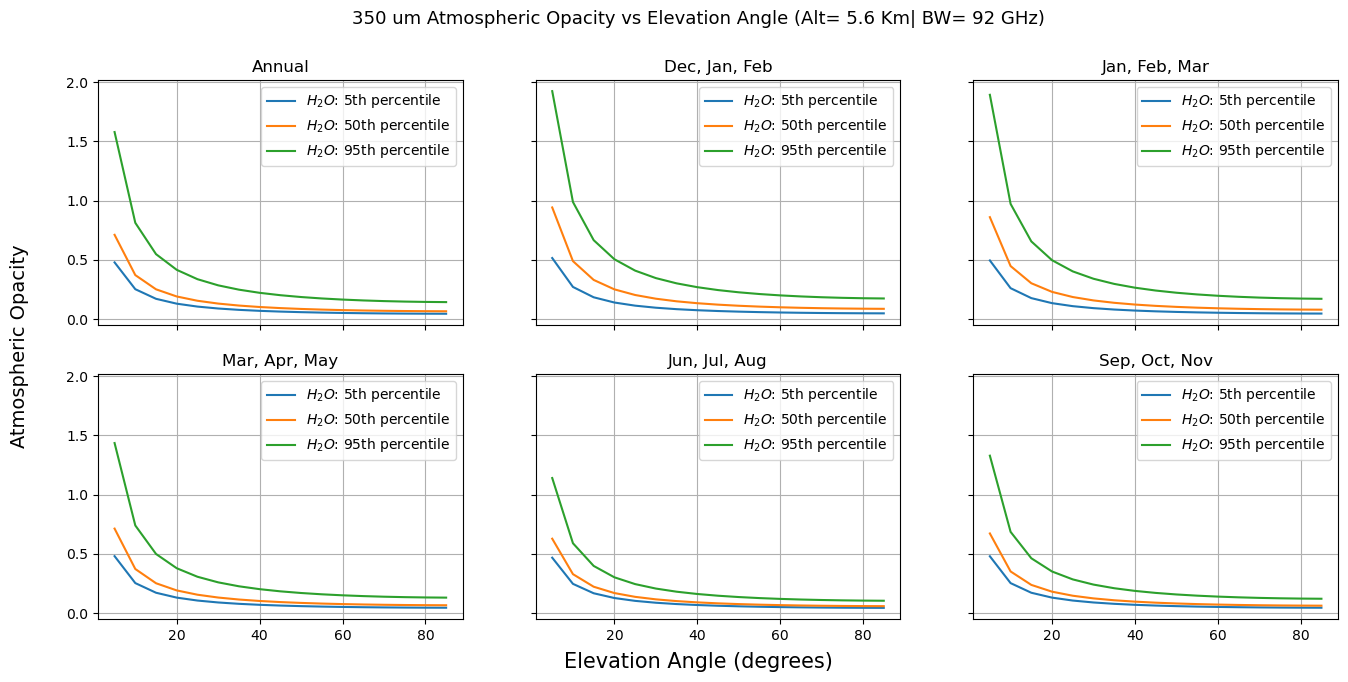

In [13]:
fig, axs = plt.subplots(2,3,sharex=True,sharey=True,figsize=(16,7))
fig.suptitle("350 um Atmospheric Opacity vs Elevation Angle (Alt= 5.6 Km| BW= 92 GHz)",size=13)

axs[0][0].set_title("Annual")
axs[0][0].plot(ea_submm_load_CCAT_350um_annual_5,tau_submm_load_CCAT_350um_annual_5 ,label ="$H_2O$: 5th percentile")
axs[0][0].plot(ea_submm_load_CCAT_350um_annual_50,tau_submm_load_CCAT_350um_annual_50 ,label ="$H_2O$: 50th percentile")
axs[0][0].plot(ea_submm_load_CCAT_350um_annual_95,tau_submm_load_CCAT_350um_annual_95 ,label ="$H_2O$: 95th percentile")
axs[0][0].legend()

axs[0][1].set_title("Dec, Jan, Feb")
axs[0][1].plot(ea_submm_load_CCAT_350um_DJF_5,tau_submm_load_CCAT_350um_DJF_5 ,label ="$H_2O$: 5th percentile")
axs[0][1].plot(ea_submm_load_CCAT_350um_DJF_50,tau_submm_load_CCAT_350um_DJF_50 ,label ="$H_2O$: 50th percentile")
axs[0][1].plot(ea_submm_load_CCAT_350um_DJF_95,tau_submm_load_CCAT_350um_DJF_95 ,label ="$H_2O$: 95th percentile")
axs[0][1].legend()

axs[0][2].set_title("Jan, Feb, Mar")
axs[0][2].plot(ea_submm_load_CCAT_350um_JFM_5,tau_submm_load_CCAT_350um_JFM_5 ,label ="$H_2O$: 5th percentile")
axs[0][2].plot(ea_submm_load_CCAT_350um_JFM_50,tau_submm_load_CCAT_350um_JFM_50 ,label ="$H_2O$: 50th percentile")
axs[0][2].plot(ea_submm_load_CCAT_350um_JFM_95,tau_submm_load_CCAT_350um_JFM_95 ,label ="$H_2O$: 95th percentile")
axs[0][2].legend()

axs[1][0].set_title("Mar, Apr, May")
axs[1][0].plot(ea_submm_load_CCAT_350um_MAM_5,tau_submm_load_CCAT_350um_MAM_5 ,label ="$H_2O$: 5th percentile")
axs[1][0].plot(ea_submm_load_CCAT_350um_MAM_50,tau_submm_load_CCAT_350um_MAM_50 ,label ="$H_2O$: 50th percentile")
axs[1][0].plot(ea_submm_load_CCAT_350um_MAM_95,tau_submm_load_CCAT_350um_MAM_95 ,label ="$H_2O$: 95th percentile")
axs[1][0].legend()

axs[1][1].set_title("Jun, Jul, Aug")
axs[1][1].plot(ea_submm_load_CCAT_350um_JJA_5,tau_submm_load_CCAT_350um_JJA_5 ,label ="$H_2O$: 5th percentile")
axs[1][1].plot(ea_submm_load_CCAT_350um_JJA_50,tau_submm_load_CCAT_350um_JJA_50 ,label ="$H_2O$: 50th percentile")
axs[1][1].plot(ea_submm_load_CCAT_350um_JJA_95,tau_submm_load_CCAT_350um_JJA_95 ,label ="$H_2O$: 95th percentile")
axs[1][1].legend()

axs[1][2].set_title("Sep, Oct, Nov")
axs[1][2].plot(ea_submm_load_CCAT_350um_SON_5,tau_submm_load_CCAT_350um_SON_5 ,label ="$H_2O$: 5th percentile")
axs[1][2].plot(ea_submm_load_CCAT_350um_SON_50,tau_submm_load_CCAT_350um_SON_50 ,label ="$H_2O$: 50th percentile")
axs[1][2].plot(ea_submm_load_CCAT_350um_SON_95,tau_submm_load_CCAT_350um_SON_95 ,label ="$H_2O$: 95th percentile")
axs[1][2].legend()

# plt.xlabel("Elevation Angle (dgrees)",size=12)
# plt.ylabel("Loading tauer (pW) ",size=12)

fig.text(0.5, 0.04, 'Elevation Angle (degrees)', ha='center',size=15)
fig.text(0.07, 0.5, 'Atmospheric Opacity', va='center', rotation='vertical',size=14)


plt.savefig("v1_outputs/350 um Atmospheric Opacity vs Elevation Angle (Alt= 5.6 Km| BW= 92 GHz)_V1.jpg",dpi="figure")

plt.show()

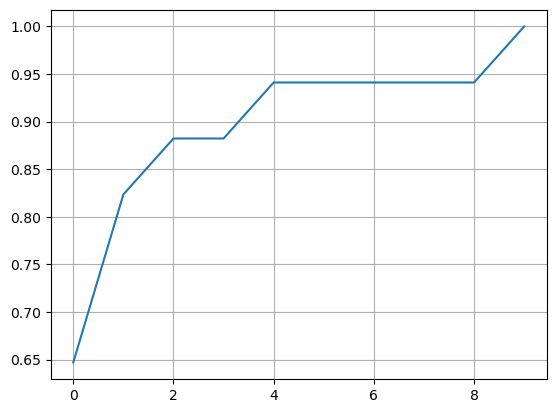

In [55]:
c_350um_annual_5, b_350um_annual_5= np.histogram(tau_submm_load_CCAT_350um_annual_5)
pdf_350um_annual_5 = c_350um_annual_5 / sum(c_350um_annual_5)
cdf_350um_annual_5 = np.cumsum(pdf_350um_annual_5)
plt.plot(cdf_350um_annual_5)

In [14]:
# calculating the cumulative fraction as a fuction of the optical depth/opacity tau

#-------------------------------------------------------------------------------------------ANNUAL-----------------------------------------------------------

data_submm_load_CCAT_350um_annual_5 = tau_submm_load_CCAT_350um_annual_5
data_sorted_submm_load_CCAT_350um_annual_5 = np.sort(data_submm_load_CCAT_350um_annual_5)
p_submm_load_CCAT_350um_annual_5 = 1. * np.arange(len(data_submm_load_CCAT_350um_annual_5)) / (len(data_submm_load_CCAT_350um_annual_5) - 1)

data_submm_load_CCAT_350um_annual_50 = tau_submm_load_CCAT_350um_annual_50
data_sorted_submm_load_CCAT_350um_annual_50 = np.sort(data_submm_load_CCAT_350um_annual_50)
p_submm_load_CCAT_350um_annual_50 = 1. * np.arange(len(data_submm_load_CCAT_350um_annual_50)) / (len(data_submm_load_CCAT_350um_annual_50) - 1)

data_submm_load_CCAT_350um_annual_95 = tau_submm_load_CCAT_350um_annual_95
data_sorted_submm_load_CCAT_350um_annual_95 = np.sort(data_submm_load_CCAT_350um_annual_95)
p_submm_load_CCAT_350um_annual_95 = 1. * np.arange(len(data_submm_load_CCAT_350um_annual_95)) / (len(data_submm_load_CCAT_350um_annual_95) - 1)

# calculating the cumulative fraction as a fuction of the optical depth/opacity tau

#-------------------------------------------------------------------------------------------DJF-----------------------------------------------------------

data_submm_load_CCAT_350um_DJF_5 = tau_submm_load_CCAT_350um_DJF_5
data_sorted_submm_load_CCAT_350um_DJF_5 = np.sort(data_submm_load_CCAT_350um_DJF_5)
p_submm_load_CCAT_350um_DJF_5 = 1. * np.arange(len(data_submm_load_CCAT_350um_DJF_5)) / (len(data_submm_load_CCAT_350um_DJF_5) - 1)

data_submm_load_CCAT_350um_DJF_50 = tau_submm_load_CCAT_350um_DJF_50
data_sorted_submm_load_CCAT_350um_DJF_50 = np.sort(data_submm_load_CCAT_350um_DJF_50)
p_submm_load_CCAT_350um_DJF_50 = 1. * np.arange(len(data_submm_load_CCAT_350um_DJF_50)) / (len(data_submm_load_CCAT_350um_DJF_50) - 1)

data_submm_load_CCAT_350um_DJF_95 = tau_submm_load_CCAT_350um_DJF_95
data_sorted_submm_load_CCAT_350um_DJF_95 = np.sort(data_submm_load_CCAT_350um_DJF_95)
p_submm_load_CCAT_350um_DJF_95 = 1. * np.arange(len(data_submm_load_CCAT_350um_DJF_95)) / (len(data_submm_load_CCAT_350um_DJF_95) - 1)

# calculating the cumulative fraction as a fuction of the optical depth/opacity tau
#-------------------------------------------------------------------------------------------JFM-----------------------------------------------------------

data_submm_load_CCAT_350um_JFM_5 = tau_submm_load_CCAT_350um_JFM_5
data_sorted_submm_load_CCAT_350um_JFM_5 = np.sort(data_submm_load_CCAT_350um_JFM_5)
p_submm_load_CCAT_350um_JFM_5 = 1. * np.arange(len(data_submm_load_CCAT_350um_JFM_5)) / (len(data_submm_load_CCAT_350um_JFM_5) - 1)

data_submm_load_CCAT_350um_JFM_50 = tau_submm_load_CCAT_350um_JFM_50
data_sorted_submm_load_CCAT_350um_JFM_50 = np.sort(data_submm_load_CCAT_350um_JFM_50)
p_submm_load_CCAT_350um_JFM_50 = 1. * np.arange(len(data_submm_load_CCAT_350um_JFM_50)) / (len(data_submm_load_CCAT_350um_JFM_50) - 1)

data_submm_load_CCAT_350um_JFM_95 = tau_submm_load_CCAT_350um_JFM_95
data_sorted_submm_load_CCAT_350um_JFM_95 = np.sort(data_submm_load_CCAT_350um_JFM_95)
p_submm_load_CCAT_350um_JFM_95 = 1. * np.arange(len(data_submm_load_CCAT_350um_JFM_95)) / (len(data_submm_load_CCAT_350um_JFM_95) - 1)

# calculating the cumulative fraction as a fuction of the optical depth/opacity tau
#-------------------------------------------------------------------------------------------MAM-----------------------------------------------------------

data_submm_load_CCAT_350um_MAM_5 = tau_submm_load_CCAT_350um_MAM_5
data_sorted_submm_load_CCAT_350um_MAM_5 = np.sort(data_submm_load_CCAT_350um_MAM_5)
p_submm_load_CCAT_350um_MAM_5 = 1. * np.arange(len(data_submm_load_CCAT_350um_MAM_5)) / (len(data_submm_load_CCAT_350um_MAM_5) - 1)

data_submm_load_CCAT_350um_MAM_50 = tau_submm_load_CCAT_350um_MAM_50
data_sorted_submm_load_CCAT_350um_MAM_50 = np.sort(data_submm_load_CCAT_350um_MAM_50)
p_submm_load_CCAT_350um_MAM_50 = 1. * np.arange(len(data_submm_load_CCAT_350um_MAM_50)) / (len(data_submm_load_CCAT_350um_MAM_50) - 1)

data_submm_load_CCAT_350um_MAM_95 = tau_submm_load_CCAT_350um_MAM_95
data_sorted_submm_load_CCAT_350um_MAM_95 = np.sort(data_submm_load_CCAT_350um_MAM_95)
p_submm_load_CCAT_350um_MAM_95 = 1. * np.arange(len(data_submm_load_CCAT_350um_MAM_95)) / (len(data_submm_load_CCAT_350um_MAM_95) - 1)

# calculating the cumulative fraction as a fuction of the optical depth/opacity tau
#-------------------------------------------------------------------------------------------JJA-----------------------------------------------------------

data_submm_load_CCAT_350um_JJA_5 = tau_submm_load_CCAT_350um_JJA_5
data_sorted_submm_load_CCAT_350um_JJA_5 = np.sort(data_submm_load_CCAT_350um_JJA_5)
p_submm_load_CCAT_350um_JJA_5 = 1. * np.arange(len(data_submm_load_CCAT_350um_JJA_5)) / (len(data_submm_load_CCAT_350um_JJA_5) - 1)

data_submm_load_CCAT_350um_JJA_50 = tau_submm_load_CCAT_350um_JJA_50
data_sorted_submm_load_CCAT_350um_JJA_50 = np.sort(data_submm_load_CCAT_350um_JJA_50)
p_submm_load_CCAT_350um_JJA_50 = 1. * np.arange(len(data_submm_load_CCAT_350um_JJA_50)) / (len(data_submm_load_CCAT_350um_JJA_50) - 1)

data_submm_load_CCAT_350um_JJA_95 = tau_submm_load_CCAT_350um_JJA_95
data_sorted_submm_load_CCAT_350um_JJA_95 = np.sort(data_submm_load_CCAT_350um_JJA_95)
p_submm_load_CCAT_350um_JJA_95 = 1. * np.arange(len(data_submm_load_CCAT_350um_JJA_95)) / (len(data_submm_load_CCAT_350um_JJA_95) - 1)

# calculating the cumulative fraction as a fuction of the optical depth/opacity tau
#-------------------------------------------------------------------------------------------SON-----------------------------------------------------------

data_submm_load_CCAT_350um_SON_5 = tau_submm_load_CCAT_350um_SON_5
data_sorted_submm_load_CCAT_350um_SON_5 = np.sort(data_submm_load_CCAT_350um_SON_5)
p_submm_load_CCAT_350um_SON_5 = 1. * np.arange(len(data_submm_load_CCAT_350um_SON_5)) / (len(data_submm_load_CCAT_350um_SON_5) - 1)

data_submm_load_CCAT_350um_SON_50 = tau_submm_load_CCAT_350um_SON_50
data_sorted_submm_load_CCAT_350um_SON_50 = np.sort(data_submm_load_CCAT_350um_SON_50)
p_submm_load_CCAT_350um_SON_50 = 1. * np.arange(len(data_submm_load_CCAT_350um_SON_50)) / (len(data_submm_load_CCAT_350um_SON_50) - 1)

data_submm_load_CCAT_350um_SON_95 = tau_submm_load_CCAT_350um_SON_95
data_sorted_submm_load_CCAT_350um_SON_95 = np.sort(data_submm_load_CCAT_350um_SON_95)
p_submm_load_CCAT_350um_SON_95 = 1. * np.arange(len(data_submm_load_CCAT_350um_SON_95)) / (len(data_submm_load_CCAT_350um_SON_95) - 1)

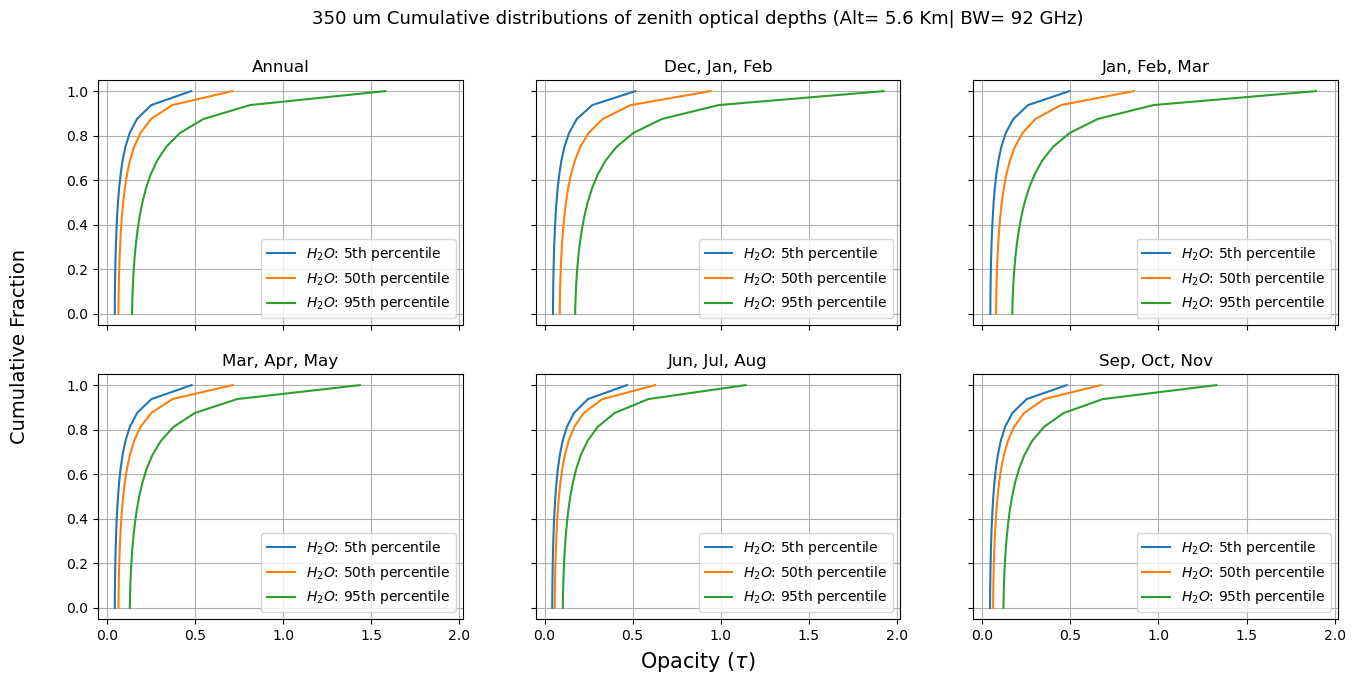

In [15]:
fig, axs = plt.subplots(2,3,sharex=True,sharey=True,figsize=(16,7))
fig.suptitle("350 um Cumulative distributions of zenith optical depths (Alt= 5.6 Km| BW= 92 GHz)",size=13)

axs[0][0].set_title("Annual")
axs[0][0].plot(data_sorted_submm_load_CCAT_350um_annual_5,p_submm_load_CCAT_350um_annual_5 ,label ="$H_2O$: 5th percentile")
axs[0][0].plot(data_sorted_submm_load_CCAT_350um_annual_50,p_submm_load_CCAT_350um_annual_50 ,label ="$H_2O$: 50th percentile")
axs[0][0].plot(data_sorted_submm_load_CCAT_350um_annual_95,p_submm_load_CCAT_350um_annual_95 ,label ="$H_2O$: 95th percentile")
axs[0][0].legend()

axs[0][1].set_title("Dec, Jan, Feb")
axs[0][1].plot(data_sorted_submm_load_CCAT_350um_DJF_5,p_submm_load_CCAT_350um_DJF_5 ,label ="$H_2O$: 5th percentile")
axs[0][1].plot(data_sorted_submm_load_CCAT_350um_DJF_50,p_submm_load_CCAT_350um_DJF_50 ,label="$H_2O$: 50th percentile")
axs[0][1].plot(data_sorted_submm_load_CCAT_350um_DJF_95,p_submm_load_CCAT_350um_DJF_95 ,label="$H_2O$: 95th percentile")
axs[0][1].legend()

axs[0][2].set_title("Jan, Feb, Mar")
axs[0][2].plot(data_sorted_submm_load_CCAT_350um_JFM_5,p_submm_load_CCAT_350um_JFM_5 ,label ="$H_2O$: 5th percentile")
axs[0][2].plot(data_sorted_submm_load_CCAT_350um_JFM_50,p_submm_load_CCAT_350um_JFM_50 ,label ="$H_2O$: 50th percentile")
axs[0][2].plot(data_sorted_submm_load_CCAT_350um_JFM_95,p_submm_load_CCAT_350um_JFM_95 ,label ="$H_2O$: 95th percentile")
axs[0][2].legend()

axs[1][0].set_title("Mar, Apr, May")
axs[1][0].plot(data_sorted_submm_load_CCAT_350um_MAM_5,p_submm_load_CCAT_350um_MAM_5 ,label ="$H_2O$: 5th percentile")
axs[1][0].plot(data_sorted_submm_load_CCAT_350um_MAM_50,p_submm_load_CCAT_350um_MAM_50 ,label ="$H_2O$: 50th percentile")
axs[1][0].plot(data_sorted_submm_load_CCAT_350um_MAM_95,p_submm_load_CCAT_350um_MAM_95 ,label ="$H_2O$: 95th percentile")
axs[1][0].legend()

axs[1][1].set_title("Jun, Jul, Aug")
axs[1][1].plot(data_sorted_submm_load_CCAT_350um_JJA_5,p_submm_load_CCAT_350um_JJA_5 ,label ="$H_2O$: 5th percentile")
axs[1][1].plot(data_sorted_submm_load_CCAT_350um_JJA_50,p_submm_load_CCAT_350um_JJA_50 ,label ="$H_2O$: 50th percentile")
axs[1][1].plot(data_sorted_submm_load_CCAT_350um_JJA_95,p_submm_load_CCAT_350um_JJA_95 ,label ="$H_2O$: 95th percentile")
axs[1][1].legend()

axs[1][2].set_title("Sep, Oct, Nov")
axs[1][2].plot(data_sorted_submm_load_CCAT_350um_SON_5,p_submm_load_CCAT_350um_SON_5 ,label ="$H_2O$: 5th percentile")
axs[1][2].plot(data_sorted_submm_load_CCAT_350um_SON_50,p_submm_load_CCAT_350um_SON_50 ,label ="$H_2O$: 50th percentile")
axs[1][2].plot(data_sorted_submm_load_CCAT_350um_SON_95,p_submm_load_CCAT_350um_SON_95 ,label ="$H_2O$: 95th percentile")
axs[1][2].legend()

# plt.xlabel("Elevation Angle (dgrees)",size=12)
# plt.ylabel("Loading txer (pW) ",size=12)

fig.text(0.5, 0.04, r'Opacity ($ \tau $)', ha='center',size=15)
fig.text(0.07, 0.5, 'Cumulative Fraction', va='center', rotation='vertical',size=14)

plt.savefig("v1_outputs/350 um Cumulative distributions of zenith optical depths (Alt= 5.6 Km| BW= 92 GHz)_V1.jpg",dpi="figure")


plt.savefig("v1_outputs/350 um Cumulative distributions of zenith optical depths (Alt= 5.6 Km| BW= 92 GHz)_V1.jpg",dpi="figure")

plt.show()



In [120]:
# calculating the cumulative fraction as a fuction of the optical depth/opacity tau

#-------------------------------------------------------------------------------------------ANNUAL-----------------------------------------------------------

c_350um_annual_5, b_350um_annual_5= np.histogram(tau_submm_load_CCAT_350um_annual_5)
pdf_350um_annual_5 = c_350um_annual_5 / sum(c_350um_annual_5)
cdf_350um_annual_5 = np.cumsum(pdf_350um_annual_5)


c_350um_annual_50, b_350um_annual_50= np.histogram(tau_submm_load_CCAT_350um_annual_50)
pdf_350um_annual_50 = c_350um_annual_50 / sum(c_350um_annual_50)
cdf_350um_annual_50 = np.cumsum(pdf_350um_annual_50)

c_350um_annual_95, b_350um_annual_95= np.histogram(tau_submm_load_CCAT_350um_annual_95)
pdf_350um_annual_95 = c_350um_annual_95 / sum(c_350um_annual_95)
cdf_350um_annual_95 = np.cumsum(pdf_350um_annual_95)

#-------------------------------------------------------------------------------------------DJF-----------------------------------------------------------

c_350um_DJF_5, b_350um_DJF_5= np.histogram(tau_submm_load_CCAT_350um_DJF_5)
pdf_350um_DJF_5 = c_350um_DJF_5 / sum(c_350um_DJF_5)
cdf_350um_DJF_5 = np.cumsum(pdf_350um_DJF_5)
#plt.plot(cdf_350um_DJF_5)

c_350um_DJF_50, b_350um_DJF_50= np.histogram(tau_submm_load_CCAT_350um_DJF_50)
pdf_350um_DJF_50 = c_350um_DJF_50 / sum(c_350um_DJF_50)
cdf_350um_DJF_50 = np.cumsum(pdf_350um_DJF_50)

c_350um_DJF_95, b_350um_DJF_95= np.histogram(tau_submm_load_CCAT_350um_DJF_95)
pdf_350um_DJF_95 = c_350um_DJF_95 / sum(c_350um_DJF_95)
cdf_350um_DJF_95 = np.cumsum(pdf_350um_DJF_95)

#-------------------------------------------------------------------------------------------JFM-----------------------------------------------------------

c_350um_JFM_5, b_350um_JFM_5= np.histogram(tau_submm_load_CCAT_350um_JFM_5)
pdf_350um_JFM_5 = c_350um_JFM_5 / sum(c_350um_JFM_5)
cdf_350um_JFM_5 = np.cumsum(pdf_350um_JFM_5)
#plt.plot(cdf_350um_JFM_5)

c_350um_JFM_50, b_350um_JFM_50= np.histogram(tau_submm_load_CCAT_350um_JFM_50)
pdf_350um_JFM_50 = c_350um_JFM_50 / sum(c_350um_JFM_50)
cdf_350um_JFM_50 = np.cumsum(pdf_350um_JFM_50)

c_350um_JFM_95, b_350um_JFM_95= np.histogram(tau_submm_load_CCAT_350um_JFM_95)
pdf_350um_JFM_95 = c_350um_JFM_95 / sum(c_350um_JFM_95)
cdf_350um_JFM_95 = np.cumsum(pdf_350um_JFM_95)

#-------------------------------------------------------------------------------------------MAM-----------------------------------------------------------

c_350um_MAM_5, b_350um_MAM_5= np.histogram(tau_submm_load_CCAT_350um_MAM_5)
pdf_350um_MAM_5 = c_350um_MAM_5 / sum(c_350um_MAM_5)
cdf_350um_MAM_5 = np.cumsum(pdf_350um_MAM_5)
#plt.plot(cdf_350um_MAM_5)

c_350um_MAM_50, b_350um_MAM_50= np.histogram(tau_submm_load_CCAT_350um_MAM_50)
pdf_350um_MAM_50 = c_350um_MAM_50 / sum(c_350um_MAM_50)
cdf_350um_MAM_50 = np.cumsum(pdf_350um_MAM_50)

c_350um_MAM_95, b_350um_MAM_95= np.histogram(tau_submm_load_CCAT_350um_MAM_95)
pdf_350um_MAM_95 = c_350um_MAM_95 / sum(c_350um_MAM_95)
cdf_350um_MAM_95 = np.cumsum(pdf_350um_MAM_95)

#-------------------------------------------------------------------------------------------JJA-----------------------------------------------------------

c_350um_JJA_5, b_350um_JJA_5= np.histogram(tau_submm_load_CCAT_350um_JJA_5)
pdf_350um_JJA_5 = c_350um_JJA_5 / sum(c_350um_JJA_5)
cdf_350um_JJA_5 = np.cumsum(pdf_350um_JJA_5)
#plt.plot(cdf_350um_JJA_5)

c_350um_JJA_50, b_350um_JJA_50= np.histogram(tau_submm_load_CCAT_350um_JJA_50)
pdf_350um_JJA_50 = c_350um_JJA_50 / sum(c_350um_JJA_50)
cdf_350um_JJA_50 = np.cumsum(pdf_350um_JJA_50)

c_350um_JJA_95, b_350um_JJA_95= np.histogram(tau_submm_load_CCAT_350um_JJA_95)
pdf_350um_JJA_95 = c_350um_JJA_95 / sum(c_350um_JJA_95)
cdf_350um_JJA_95 = np.cumsum(pdf_350um_JJA_95)

#-------------------------------------------------------------------------------------------SON-----------------------------------------------------------

c_350um_SON_5, b_350um_SON_5= np.histogram(tau_submm_load_CCAT_350um_SON_5)
pdf_350um_SON_5 = c_350um_SON_5 / sum(c_350um_SON_5)
cdf_350um_SON_5 = np.cumsum(pdf_350um_SON_5)
#plt.plot(cdf_350um_SON_5)

c_350um_SON_50, b_350um_SON_50= np.histogram(tau_submm_load_CCAT_350um_SON_50)
pdf_350um_SON_50 = c_350um_SON_50 / sum(c_350um_SON_50)
cdf_350um_SON_50 = np.cumsum(pdf_350um_SON_50)

c_350um_SON_95, b_350um_SON_95= np.histogram(tau_submm_load_CCAT_350um_SON_95)
pdf_350um_SON_95 = c_350um_SON_95 / sum(c_350um_SON_95)
cdf_350um_SON_95 = np.cumsum(pdf_350um_SON_95)

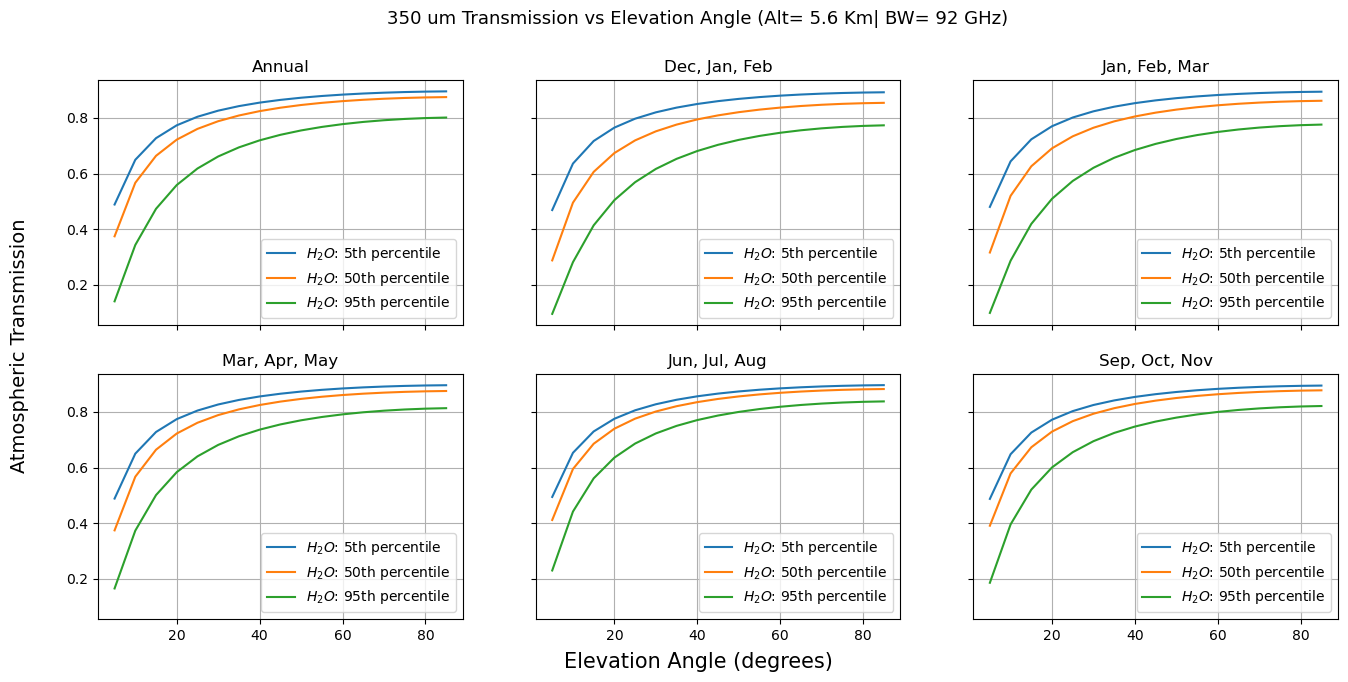

In [121]:
fig, axs = plt.subplots(2,3,sharex=True,sharey=True,figsize=(16,7))
fig.suptitle("350 um Transmission vs Elevation Angle (Alt= 5.6 Km| BW= 92 GHz)",size=13)

axs[0][0].set_title("Annual")
axs[0][0].plot(ea_submm_load_CCAT_350um_annual_5,tx_submm_load_CCAT_350um_annual_5 ,label ="$H_2O$: 5th percentile")
axs[0][0].plot(ea_submm_load_CCAT_350um_annual_50,tx_submm_load_CCAT_350um_annual_50 ,label ="$H_2O$: 50th percentile")
axs[0][0].plot(ea_submm_load_CCAT_350um_annual_95,tx_submm_load_CCAT_350um_annual_95 ,label ="$H_2O$: 95th percentile")
axs[0][0].legend()

axs[0][1].set_title("Dec, Jan, Feb")
axs[0][1].plot(ea_submm_load_CCAT_350um_DJF_5,tx_submm_load_CCAT_350um_DJF_5 ,label ="$H_2O$: 5th percentile")
axs[0][1].plot(ea_submm_load_CCAT_350um_DJF_50,tx_submm_load_CCAT_350um_DJF_50 ,label ="$H_2O$: 50th percentile")
axs[0][1].plot(ea_submm_load_CCAT_350um_DJF_95,tx_submm_load_CCAT_350um_DJF_95 ,label ="$H_2O$: 95th percentile")
axs[0][1].legend()

axs[0][2].set_title("Jan, Feb, Mar")
axs[0][2].plot(ea_submm_load_CCAT_350um_JFM_5,tx_submm_load_CCAT_350um_JFM_5 ,label ="$H_2O$: 5th percentile")
axs[0][2].plot(ea_submm_load_CCAT_350um_JFM_50,tx_submm_load_CCAT_350um_JFM_50 ,label ="$H_2O$: 50th percentile")
axs[0][2].plot(ea_submm_load_CCAT_350um_JFM_95,tx_submm_load_CCAT_350um_JFM_95 ,label ="$H_2O$: 95th percentile")
axs[0][2].legend()

axs[1][0].set_title("Mar, Apr, May")
axs[1][0].plot(ea_submm_load_CCAT_350um_MAM_5,tx_submm_load_CCAT_350um_MAM_5 ,label ="$H_2O$: 5th percentile")
axs[1][0].plot(ea_submm_load_CCAT_350um_MAM_50,tx_submm_load_CCAT_350um_MAM_50 ,label ="$H_2O$: 50th percentile")
axs[1][0].plot(ea_submm_load_CCAT_350um_MAM_95,tx_submm_load_CCAT_350um_MAM_95 ,label ="$H_2O$: 95th percentile")
axs[1][0].legend()

axs[1][1].set_title("Jun, Jul, Aug")
axs[1][1].plot(ea_submm_load_CCAT_350um_JJA_5,tx_submm_load_CCAT_350um_JJA_5 ,label ="$H_2O$: 5th percentile")
axs[1][1].plot(ea_submm_load_CCAT_350um_JJA_50,tx_submm_load_CCAT_350um_JJA_50 ,label ="$H_2O$: 50th percentile")
axs[1][1].plot(ea_submm_load_CCAT_350um_JJA_95,tx_submm_load_CCAT_350um_JJA_95 ,label ="$H_2O$: 95th percentile")
axs[1][1].legend()

axs[1][2].set_title("Sep, Oct, Nov")
axs[1][2].plot(ea_submm_load_CCAT_350um_SON_5,tx_submm_load_CCAT_350um_SON_5 ,label ="$H_2O$: 5th percentile")
axs[1][2].plot(ea_submm_load_CCAT_350um_SON_50,tx_submm_load_CCAT_350um_SON_50 ,label ="$H_2O$: 50th percentile")
axs[1][2].plot(ea_submm_load_CCAT_350um_SON_95,tx_submm_load_CCAT_350um_SON_95 ,label ="$H_2O$: 95th percentile")
axs[1][2].legend()

# plt.xlabel("Elevation Angle (dgrees)",size=12)
# plt.ylabel("Loading txer (pW) ",size=12)

fig.text(0.5, 0.04, 'Elevation Angle (degrees)', ha='center',size=15)
fig.text(0.07, 0.5, 'Atmospheric Transmission', va='center', rotation='vertical',size=14)


plt.savefig("v1_outputs/350 um Transmission vs Elevation Angle (Alt= 5.6 Km| BW= 92 GHz)_V1.jpg",dpi="figure")

plt.show()

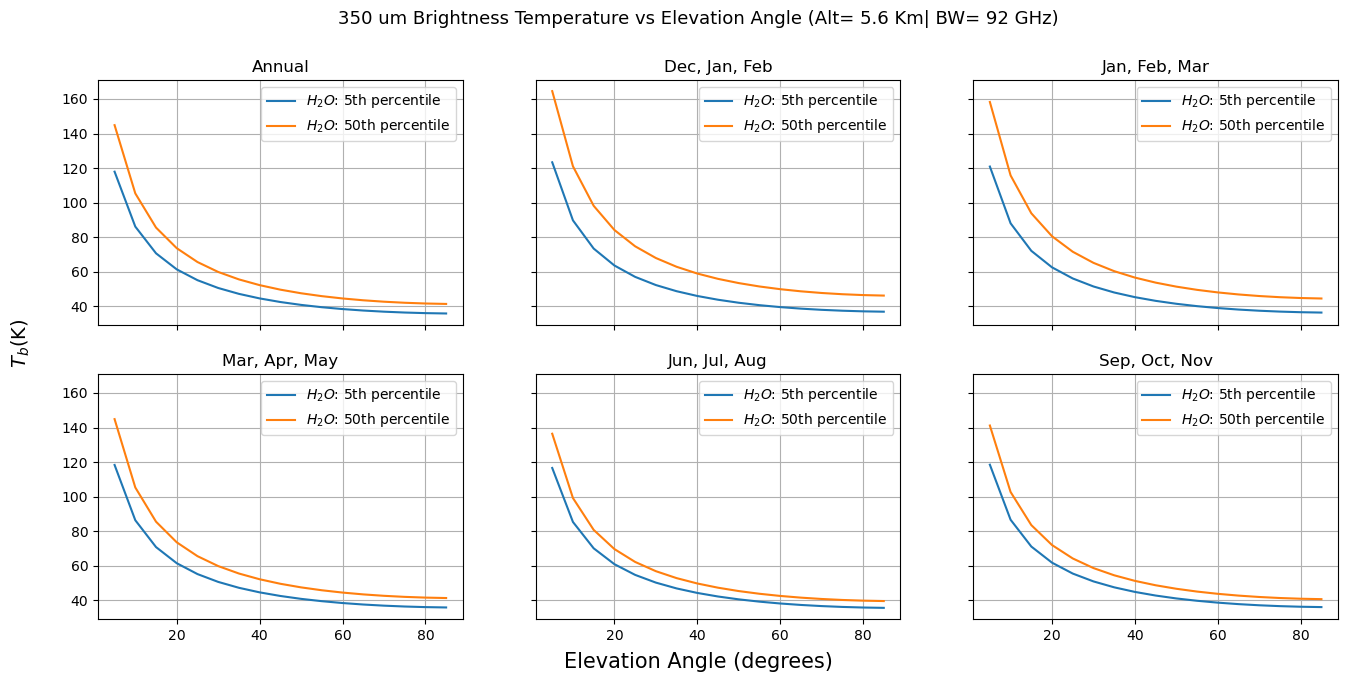

In [122]:
fig, axs = plt.subplots(2,3,sharex=True,sharey=True,figsize=(16,7))
fig.suptitle("350 um Brightness Temperature vs Elevation Angle (Alt= 5.6 Km| BW= 92 GHz)",size=13)

axs[0][0].set_title("Annual")
axs[0][0].plot(ea_submm_load_CCAT_350um_annual_5,tb_submm_load_CCAT_350um_annual_5 ,label ="$H_2O$: 5th percentile")
axs[0][0].plot(ea_submm_load_CCAT_350um_annual_50,tb_submm_load_CCAT_350um_annual_50 ,label ="$H_2O$: 50th percentile")
#axs[0][0].plot(ea_submm_load_CCAT_350um_annual_95,tb_submm_load_CCAT_350um_annual_95 ,label ="$H_2O$: 95th percentile")
axs[0][0].legend()

axs[0][1].set_title("Dec, Jan, Feb")
axs[0][1].plot(ea_submm_load_CCAT_350um_DJF_5,tb_submm_load_CCAT_350um_DJF_5 ,label ="$H_2O$: 5th percentile")
axs[0][1].plot(ea_submm_load_CCAT_350um_DJF_50,tb_submm_load_CCAT_350um_DJF_50 ,label ="$H_2O$: 50th percentile")
#axs[0][1].plot(ea_submm_load_CCAT_350um_DJF_95,tb_submm_load_CCAT_350um_DJF_95 ,label ="$H_2O$: 95th percentile")
axs[0][1].legend()

axs[0][2].set_title("Jan, Feb, Mar")
axs[0][2].plot(ea_submm_load_CCAT_350um_JFM_5,tb_submm_load_CCAT_350um_JFM_5 ,label ="$H_2O$: 5th percentile")
axs[0][2].plot(ea_submm_load_CCAT_350um_JFM_50,tb_submm_load_CCAT_350um_JFM_50 ,label ="$H_2O$: 50th percentile")
#axs[0][2].plot(ea_submm_load_CCAT_350um_JFM_95,tb_submm_load_CCAT_350um_JFM_95 ,label ="$H_2O$: 95th percentile")
axs[0][2].legend()

axs[1][0].set_title("Mar, Apr, May")
axs[1][0].plot(ea_submm_load_CCAT_350um_MAM_5,tb_submm_load_CCAT_350um_MAM_5 ,label ="$H_2O$: 5th percentile")
axs[1][0].plot(ea_submm_load_CCAT_350um_MAM_50,tb_submm_load_CCAT_350um_MAM_50 ,label ="$H_2O$: 50th percentile")
#axs[1][0].plot(ea_submm_load_CCAT_350um_MAM_95,tb_submm_load_CCAT_350um_MAM_95 ,label ="$H_2O$: 95th percentile")
axs[1][0].legend()

axs[1][1].set_title("Jun, Jul, Aug")
axs[1][1].plot(ea_submm_load_CCAT_350um_JJA_5,tb_submm_load_CCAT_350um_JJA_5 ,label ="$H_2O$: 5th percentile")
axs[1][1].plot(ea_submm_load_CCAT_350um_JJA_50,tb_submm_load_CCAT_350um_JJA_50 ,label ="$H_2O$: 50th percentile")
#axs[1][1].plot(ea_submm_load_CCAT_350um_JJA_95,tb_submm_load_CCAT_350um_JJA_95 ,label ="$H_2O$: 95th percentile")
axs[1][1].legend()

axs[1][2].set_title("Sep, Oct, Nov")
axs[1][2].plot(ea_submm_load_CCAT_350um_SON_5,tb_submm_load_CCAT_350um_SON_5 ,label ="$H_2O$: 5th percentile")
axs[1][2].plot(ea_submm_load_CCAT_350um_SON_50,tb_submm_load_CCAT_350um_SON_50 ,label ="$H_2O$: 50th percentile")
#axs[1][2].plot(ea_submm_load_CCAT_350um_SON_95,tb_submm_load_CCAT_350um_SON_95 ,label ="$H_2O$: 95th percentile")
axs[1][2].legend()

# plt.xlabel("Elevation Angle (dgrees)",size=12)
# plt.ylabel("Loading tber (pW) ",size=12)

fig.text(0.5, 0.04, 'Elevation Angle (degrees)', ha='center',size=15)
fig.text(0.07, 0.5, ' $ T_{b} $(K)', va='center', rotation='vertical',size=14)


plt.savefig("v1_outputs/350 um Brightness Temperature vs Elevation Angle (Alt= 5.6 Km| BW= 92 GHz)_V1.jpg",dpi="figure")

plt.show()

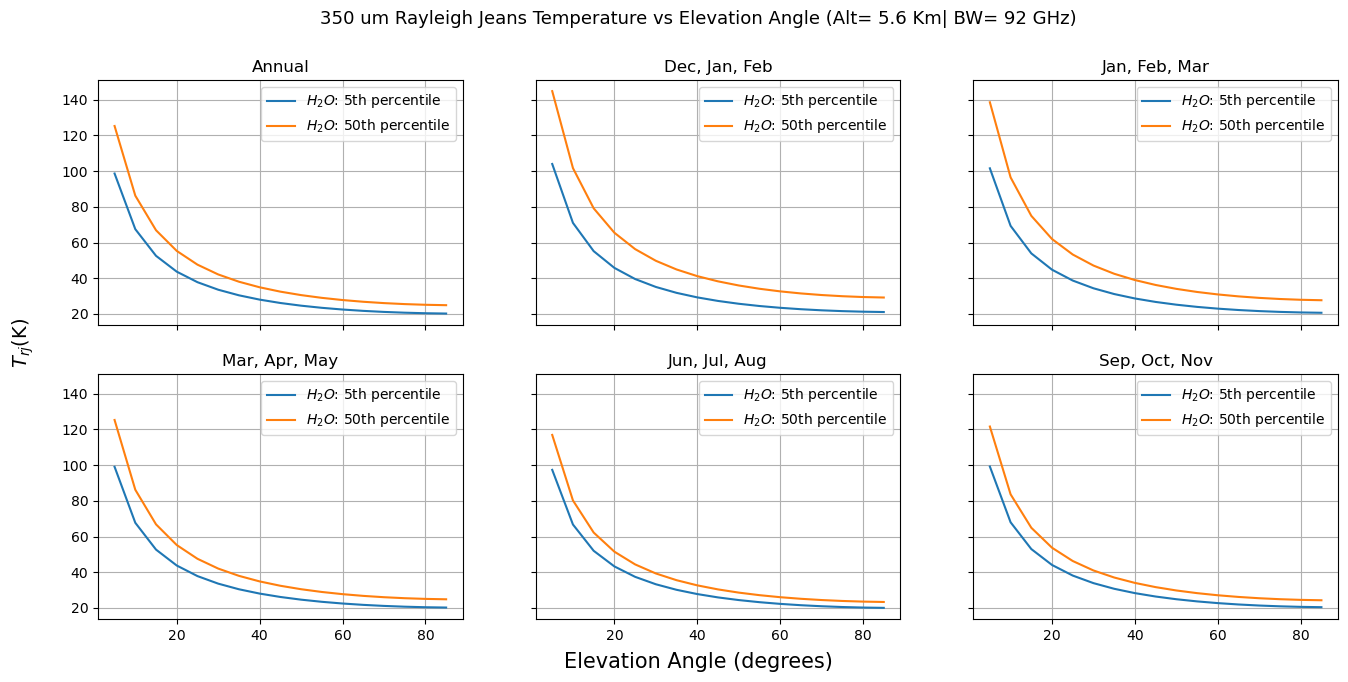

In [123]:
fig, axs = plt.subplots(2,3,sharex=True,sharey=True,figsize=(16,7))
fig.suptitle("350 um Rayleigh Jeans Temperature vs Elevation Angle (Alt= 5.6 Km| BW= 92 GHz)",size=13)

axs[0][0].set_title("Annual")
axs[0][0].plot(ea_submm_load_CCAT_350um_annual_5,trj_submm_load_CCAT_350um_annual_5 ,label ="$H_2O$: 5th percentile")
axs[0][0].plot(ea_submm_load_CCAT_350um_annual_50,trj_submm_load_CCAT_350um_annual_50 ,label ="$H_2O$: 50th percentile")
#axs[0][0].plot(ea_submm_load_CCAT_350um_annual_95,trj_submm_load_CCAT_350um_annual_95 ,label ="$H_2O$: 95th percentile")
axs[0][0].legend()

axs[0][1].set_title("Dec, Jan, Feb")
axs[0][1].plot(ea_submm_load_CCAT_350um_DJF_5,trj_submm_load_CCAT_350um_DJF_5 ,label ="$H_2O$: 5th percentile")
axs[0][1].plot(ea_submm_load_CCAT_350um_DJF_50,trj_submm_load_CCAT_350um_DJF_50 ,label ="$H_2O$: 50th percentile")
#axs[0][1].plot(ea_submm_load_CCAT_350um_DJF_95,trj_submm_load_CCAT_350um_DJF_95 ,label ="$H_2O$: 95th percentile")
axs[0][1].legend()

axs[0][2].set_title("Jan, Feb, Mar")
axs[0][2].plot(ea_submm_load_CCAT_350um_JFM_5,trj_submm_load_CCAT_350um_JFM_5 ,label ="$H_2O$: 5th percentile")
axs[0][2].plot(ea_submm_load_CCAT_350um_JFM_50,trj_submm_load_CCAT_350um_JFM_50 ,label ="$H_2O$: 50th percentile")
#axs[0][2].plot(ea_submm_load_CCAT_350um_JFM_95,trj_submm_load_CCAT_350um_JFM_95 ,label ="$H_2O$: 95th percentile")
axs[0][2].legend()

axs[1][0].set_title("Mar, Apr, May")
axs[1][0].plot(ea_submm_load_CCAT_350um_MAM_5,trj_submm_load_CCAT_350um_MAM_5 ,label ="$H_2O$: 5th percentile")
axs[1][0].plot(ea_submm_load_CCAT_350um_MAM_50,trj_submm_load_CCAT_350um_MAM_50 ,label ="$H_2O$: 50th percentile")
#axs[1][0].plot(ea_submm_load_CCAT_350um_MAM_95,trj_submm_load_CCAT_350um_MAM_95 ,label ="$H_2O$: 95th percentile")
axs[1][0].legend()

axs[1][1].set_title("Jun, Jul, Aug")
axs[1][1].plot(ea_submm_load_CCAT_350um_JJA_5,trj_submm_load_CCAT_350um_JJA_5 ,label ="$H_2O$: 5th percentile")
axs[1][1].plot(ea_submm_load_CCAT_350um_JJA_50,trj_submm_load_CCAT_350um_JJA_50 ,label ="$H_2O$: 50th percentile")
#axs[1][1].plot(ea_submm_load_CCAT_350um_JJA_95,trj_submm_load_CCAT_350um_JJA_95 ,label ="$H_2O$: 95th percentile")
axs[1][1].legend()

axs[1][2].set_title("Sep, Oct, Nov")
axs[1][2].plot(ea_submm_load_CCAT_350um_SON_5,trj_submm_load_CCAT_350um_SON_5 ,label ="$H_2O$: 5th percentile")
axs[1][2].plot(ea_submm_load_CCAT_350um_SON_50,trj_submm_load_CCAT_350um_SON_50 ,label ="$H_2O$: 50th percentile")
#axs[1][2].plot(ea_submm_load_CCAT_350um_SON_95,trj_submm_load_CCAT_350um_SON_95 ,label ="$H_2O$: 95th percentile")
axs[1][2].legend()

# plt.xlabel("Elevation Angle (dgrees)",size=12)
# plt.ylabel("Loading trjer (pW) ",size=12)

fig.text(0.5, 0.04, 'Elevation Angle (degrees)', ha='center',size=15)
fig.text(0.07, 0.5, ' $ T_{rj} $(K)', va='center', rotation='vertical',size=14)


plt.savefig("v1_outputs/350 um Rayleigh Jeans Temperature vs Elevation Angle (Alt= 5.6 Km| BW= 92 GHz)_V1.jpg",dpi="figure")

plt.show()

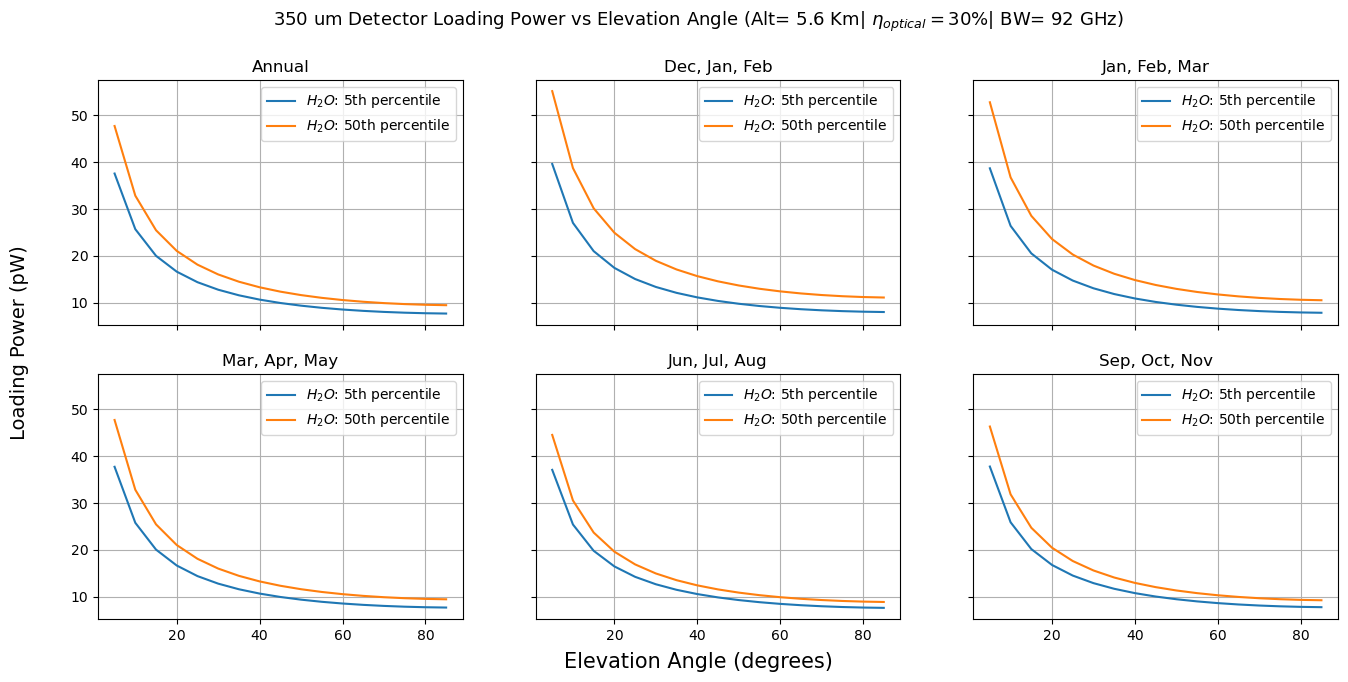

In [124]:
fig, axs = plt.subplots(2,3,sharex=True,sharey=True,figsize=(16,7))
fig.suptitle("350 um Detector Loading Power vs Elevation Angle (Alt= 5.6 Km| $\eta_{optical}=30\% $| BW= 92 GHz)",size=13)

axs[0][0].set_title("Annual")
axs[0][0].plot(ea_submm_load_CCAT_350um_annual_5,pow_submm_load_CCAT_350um_annual_5 *1e12,label ="$H_2O$: 5th percentile")
axs[0][0].plot(ea_submm_load_CCAT_350um_annual_50,pow_submm_load_CCAT_350um_annual_50 *1e12,label ="$H_2O$: 50th percentile")
#axs[0][0].plot(ea_submm_load_CCAT_350um_annual_95,pow_submm_load_CCAT_350um_annual_95 *1e12,label ="$H_2O$: 95th percentile")
axs[0][0].legend()

axs[0][1].set_title("Dec, Jan, Feb")
axs[0][1].plot(ea_submm_load_CCAT_350um_DJF_5,pow_submm_load_CCAT_350um_DJF_5 *1e12,label ="$H_2O$: 5th percentile")
axs[0][1].plot(ea_submm_load_CCAT_350um_DJF_50,pow_submm_load_CCAT_350um_DJF_50 *1e12,label ="$H_2O$: 50th percentile")
#axs[0][1].plot(ea_submm_load_CCAT_350um_DJF_95,pow_submm_load_CCAT_350um_DJF_95 *1e12,label ="$H_2O$: 95th percentile")
axs[0][1].legend()

axs[0][2].set_title("Jan, Feb, Mar")
axs[0][2].plot(ea_submm_load_CCAT_350um_JFM_5,pow_submm_load_CCAT_350um_JFM_5 *1e12,label ="$H_2O$: 5th percentile")
axs[0][2].plot(ea_submm_load_CCAT_350um_JFM_50,pow_submm_load_CCAT_350um_JFM_50 *1e12,label ="$H_2O$: 50th percentile")
#axs[0][2].plot(ea_submm_load_CCAT_350um_JFM_95,pow_submm_load_CCAT_350um_JFM_95 *1e12,label ="$H_2O$: 95th percentile")
axs[0][2].legend()

axs[1][0].set_title("Mar, Apr, May")
axs[1][0].plot(ea_submm_load_CCAT_350um_MAM_5,pow_submm_load_CCAT_350um_MAM_5 *1e12,label ="$H_2O$: 5th percentile")
axs[1][0].plot(ea_submm_load_CCAT_350um_MAM_50,pow_submm_load_CCAT_350um_MAM_50 *1e12,label ="$H_2O$: 50th percentile")
#axs[1][0].plot(ea_submm_load_CCAT_350um_MAM_95,pow_submm_load_CCAT_350um_MAM_95 *1e12,label ="$H_2O$: 95th percentile")
axs[1][0].legend()

axs[1][1].set_title("Jun, Jul, Aug")
axs[1][1].plot(ea_submm_load_CCAT_350um_JJA_5,pow_submm_load_CCAT_350um_JJA_5 *1e12,label ="$H_2O$: 5th percentile")
axs[1][1].plot(ea_submm_load_CCAT_350um_JJA_50,pow_submm_load_CCAT_350um_JJA_50 *1e12,label ="$H_2O$: 50th percentile")
#axs[1][1].plot(ea_submm_load_CCAT_350um_JJA_95,pow_submm_load_CCAT_350um_JJA_95 *1e12,label ="$H_2O$: 95th percentile")
axs[1][1].legend()

axs[1][2].set_title("Sep, Oct, Nov")
axs[1][2].plot(ea_submm_load_CCAT_350um_SON_5,pow_submm_load_CCAT_350um_SON_5 *1e12,label ="$H_2O$: 5th percentile")
axs[1][2].plot(ea_submm_load_CCAT_350um_SON_50,pow_submm_load_CCAT_350um_SON_50 *1e12,label ="$H_2O$: 50th percentile")
#axs[1][2].plot(ea_submm_load_CCAT_350um_SON_95,pow_submm_load_CCAT_350um_SON_95 *1e12,label ="$H_2O$: 95th percentile")
axs[1][2].legend()

# plt.xlabel("Elevation Angle (dgrees)",size=12)
# plt.ylabel("Loading Power (pW) ",size=12)

fig.text(0.5, 0.04, 'Elevation Angle (degrees)', ha='center',size=15)
fig.text(0.07, 0.5, ' Loading Power (pW)', va='center', rotation='vertical',size=14)


plt.savefig("v1_outputs/350 um Detector Loading Power vs Elevation Angle (Alt= 5.6 Km| $\eta_{optical}=30\% $| BW= 92 GHz)_V1.jpg",dpi="figure")

plt.show()

### Responsivity vs Power Plot
##### (Responsivity measures the input–output gain of a detector system)

#### (based on the TiN CCAT 280 GHz first array)

In [125]:
# 850 GHz BLAST-TNG array

Qr = 36380  # Quality factor
Qc = 58290  # Coupling factor
f0 = 800e6 #[Hz]

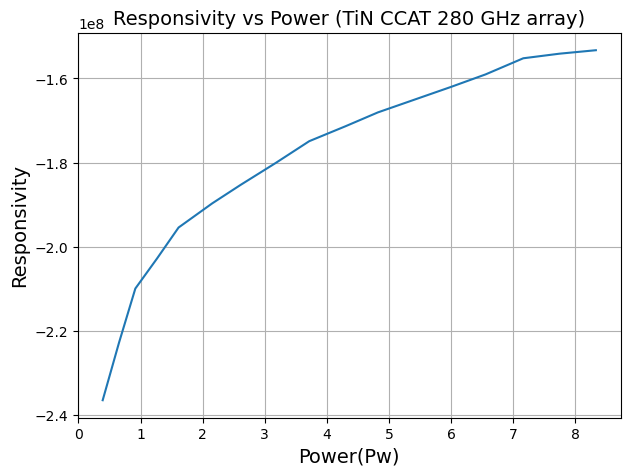

In [126]:
responsivity_data = np.loadtxt("responsivity_meas.txt")
# power_mes = (res.power* 10**-12).to_numpy()  # watts
# respon= (res.Responsivity* 10**8).to_numpy() 
power_mes = responsivity_data[:,0] * 1e-12  # in W
respon = responsivity_data[:,1]*1e8

# plotting the data

plt.figure(figsize=(7,5))
plt.plot(power_mes* 1e12,respon)
plt.title("Responsivity vs Power (TiN CCAT 280 GHz array)",size=14)
plt.xlabel("Power(Pw)",size=14)
plt.ylabel("Responsivity",size=14)

plt.savefig("v1_outputs/Responsivity vs Power (TiN CCAT 280 GHz array)_V1.jpg",dpi="figure")
plt.show()

#### frequency shifts ~ power at the detector * responsivity

In [127]:
# ----------------------------------------------------------------------------------------ANNUAL--------------------------------------------------------------

freq_shift_submm_load_CCAT_350um_annual_5 = pow_submm_load_CCAT_350um_annual_5 * respon  
freq_shift_submm_load_CCAT_350um_annual_50 = pow_submm_load_CCAT_350um_annual_50 * respon
freq_shift_submm_load_CCAT_350um_annual_95 = pow_submm_load_CCAT_350um_annual_95 * respon

# ----------------------------------------------------------------------------------------DJF--------------------------------------------------------------

freq_shift_submm_load_CCAT_350um_DJF_5 = pow_submm_load_CCAT_350um_DJF_5 * respon  
freq_shift_submm_load_CCAT_350um_DJF_50 = pow_submm_load_CCAT_350um_DJF_50 * respon
freq_shift_submm_load_CCAT_350um_DJF_95 = pow_submm_load_CCAT_350um_DJF_95 * respon

# ----------------------------------------------------------------------------------------JFM--------------------------------------------------------------

freq_shift_submm_load_CCAT_350um_JFM_5 = pow_submm_load_CCAT_350um_JFM_5 * respon  
freq_shift_submm_load_CCAT_350um_JFM_50 = pow_submm_load_CCAT_350um_JFM_50 * respon
freq_shift_submm_load_CCAT_350um_JFM_95 = pow_submm_load_CCAT_350um_JFM_95 * respon

# ----------------------------------------------------------------------------------------MAM--------------------------------------------------------------

freq_shift_submm_load_CCAT_350um_MAM_5 = pow_submm_load_CCAT_350um_MAM_5 * respon  
freq_shift_submm_load_CCAT_350um_MAM_50 = pow_submm_load_CCAT_350um_MAM_50 * respon
freq_shift_submm_load_CCAT_350um_MAM_95 = pow_submm_load_CCAT_350um_MAM_95 * respon

# ----------------------------------------------------------------------------------------JJA--------------------------------------------------------------

freq_shift_submm_load_CCAT_350um_JJA_5 = pow_submm_load_CCAT_350um_JJA_5 * respon  
freq_shift_submm_load_CCAT_350um_JJA_50 = pow_submm_load_CCAT_350um_JJA_50 * respon
freq_shift_submm_load_CCAT_350um_JJA_95 = pow_submm_load_CCAT_350um_JJA_95 * respon

# ----------------------------------------------------------------------------------------SON--------------------------------------------------------------

freq_shift_submm_load_CCAT_350um_SON_5 = pow_submm_load_CCAT_350um_SON_5 * respon  
freq_shift_submm_load_CCAT_350um_SON_50 = pow_submm_load_CCAT_350um_SON_50 * respon
freq_shift_submm_load_CCAT_350um_SON_95 = pow_submm_load_CCAT_350um_SON_95 * respon

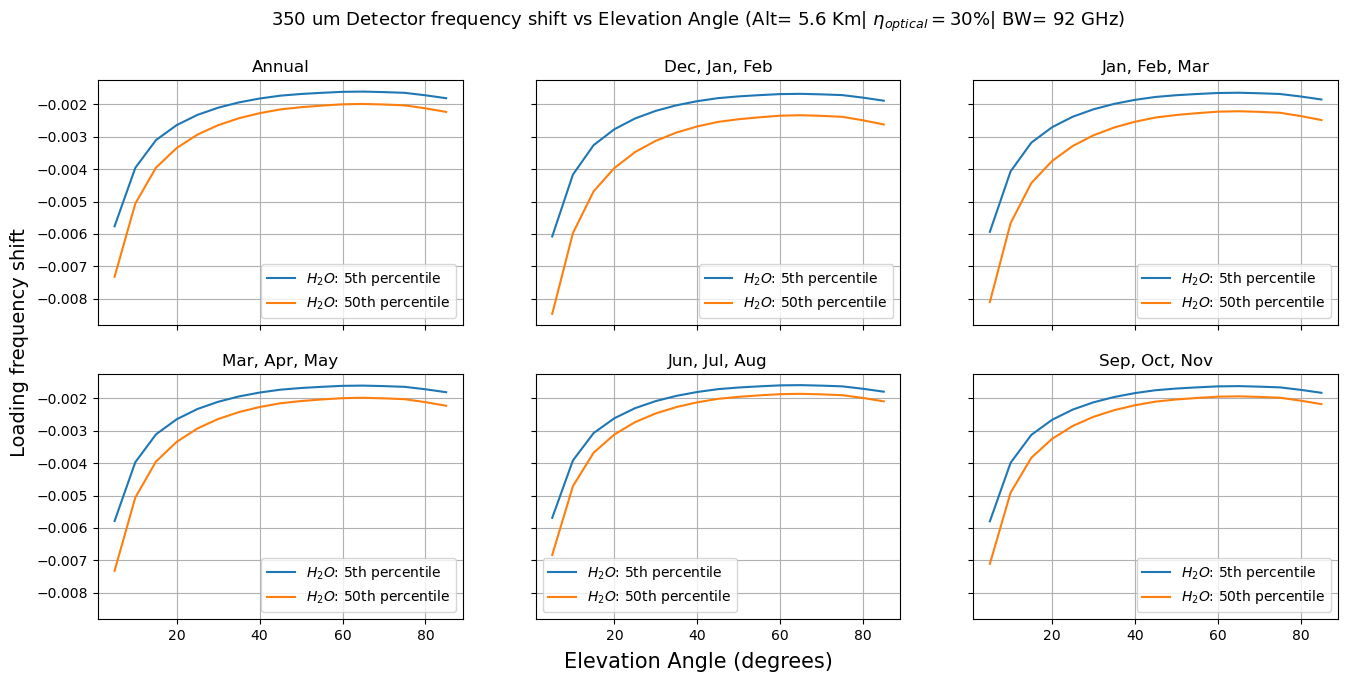

In [128]:
## plotting the freqeuncy shifts

fig, axs = plt.subplots(2,3,sharex=True,sharey=True,figsize=(16,7))
fig.suptitle("350 um Detector frequency shift vs Elevation Angle (Alt= 5.6 Km| $\eta_{optical}=30\% $| BW= 92 GHz)",size=13)

axs[0][0].set_title("Annual")
axs[0][0].plot(ea_submm_load_CCAT_350um_annual_5,freq_shift_submm_load_CCAT_350um_annual_5 ,label ="$H_2O$: 5th percentile")
axs[0][0].plot(ea_submm_load_CCAT_350um_annual_50,freq_shift_submm_load_CCAT_350um_annual_50 ,label ="$H_2O$: 50th percentile")
#axs[0][0].plot(ea_submm_load_CCAT_350um_annual_95,freq_shift_submm_load_CCAT_350um_annual_95 ,label ="$H_2O$: 95th percentile")
axs[0][0].legend()

axs[0][1].set_title("Dec, Jan, Feb")
axs[0][1].plot(ea_submm_load_CCAT_350um_DJF_5,freq_shift_submm_load_CCAT_350um_DJF_5 ,label ="$H_2O$: 5th percentile")
axs[0][1].plot(ea_submm_load_CCAT_350um_DJF_50,freq_shift_submm_load_CCAT_350um_DJF_50 ,label ="$H_2O$: 50th percentile")
#axs[0][1].plot(ea_submm_load_CCAT_350um_DJF_95,freq_shift_submm_load_CCAT_350um_DJF_95 ,label ="$H_2O$: 95th percentile")
axs[0][1].legend()

axs[0][2].set_title("Jan, Feb, Mar")
axs[0][2].plot(ea_submm_load_CCAT_350um_JFM_5,freq_shift_submm_load_CCAT_350um_JFM_5 ,label ="$H_2O$: 5th percentile")
axs[0][2].plot(ea_submm_load_CCAT_350um_JFM_50,freq_shift_submm_load_CCAT_350um_JFM_50 ,label ="$H_2O$: 50th percentile")
#axs[0][2].plot(ea_submm_load_CCAT_350um_JFM_95,freq_shift_submm_load_CCAT_350um_JFM_95 ,label ="$H_2O$: 95th percentile")
axs[0][2].legend()

axs[1][0].set_title("Mar, Apr, May")
axs[1][0].plot(ea_submm_load_CCAT_350um_MAM_5,freq_shift_submm_load_CCAT_350um_MAM_5 ,label ="$H_2O$: 5th percentile")
axs[1][0].plot(ea_submm_load_CCAT_350um_MAM_50,freq_shift_submm_load_CCAT_350um_MAM_50 ,label ="$H_2O$: 50th percentile")
#axs[1][0].plot(ea_submm_load_CCAT_350um_MAM_95,freq_shift_submm_load_CCAT_350um_MAM_95 ,label ="$H_2O$: 95th percentile")
axs[1][0].legend()

axs[1][1].set_title("Jun, Jul, Aug")
axs[1][1].plot(ea_submm_load_CCAT_350um_JJA_5,freq_shift_submm_load_CCAT_350um_JJA_5 ,label ="$H_2O$: 5th percentile")
axs[1][1].plot(ea_submm_load_CCAT_350um_JJA_50,freq_shift_submm_load_CCAT_350um_JJA_50 ,label ="$H_2O$: 50th percentile")
#axs[1][1].plot(ea_submm_load_CCAT_350um_JJA_95,freq_shift_submm_load_CCAT_350um_JJA_95 ,label ="$H_2O$: 95th percentile")
axs[1][1].legend()

axs[1][2].set_title("Sep, Oct, Nov")
axs[1][2].plot(ea_submm_load_CCAT_350um_SON_5,freq_shift_submm_load_CCAT_350um_SON_5 ,label ="$H_2O$: 5th percentile")
axs[1][2].plot(ea_submm_load_CCAT_350um_SON_50,freq_shift_submm_load_CCAT_350um_SON_50 ,label ="$H_2O$: 50th percentile")
#axs[1][2].plot(ea_submm_load_CCAT_350um_SON_95,freq_shift_submm_load_CCAT_350um_SON_95 ,label ="$H_2O$: 95th percentile")
axs[1][2].legend()

# plt.xlabel("Elevation Angle (dgrees)",size=12)
# plt.ylabel("Loading freq_shifter (pW) ",size=12)

fig.text(0.5, 0.04, 'Elevation Angle (degrees)', ha='center',size=15)
fig.text(0.07, 0.5, ' Loading frequency shift', va='center', rotation='vertical',size=14)


plt.savefig("v1_outputs/350 um Detector frequency shift vs Elevation Angle (Alt= 5.6 Km| $\eta_{optical}=30\% $| BW= 92 GHz)_V1.jpg",dpi="figure")

plt.show()

#### Actual Frequency Shift ~ Responsivity * Resonant Frequency * change in power (for 5 deg skydip)

In [129]:
fres = 800e6 # resonant freq in Hz(800 MHz)

In [130]:
ea_submm_load_CCAT_350um_annual_5

array([85., 80., 75., 70., 65., 60., 55., 50., 45., 40., 35., 30., 25.,
       20., 15., 10.,  5.])

In [131]:
pow_submm_load_CCAT_350um_annual_5

array([7.68621346e-12, 7.75385483e-12, 7.86894918e-12, 8.03524991e-12,
       8.25843860e-12, 8.54666984e-12, 8.91140583e-12, 9.36873857e-12,
       9.94152386e-12, 1.06629822e-11, 1.15830054e-11, 1.27799843e-11,
       1.43848119e-11, 1.66350695e-11, 2.00161203e-11, 2.57129400e-11,
       3.75982680e-11])

In [132]:
ea_submm_load_CCAT_350um_annual_5

array([85., 80., 75., 70., 65., 60., 55., 50., 45., 40., 35., 30., 25.,
       20., 15., 10.,  5.])

In [133]:
# difference in the frequency shifts at each elevation angle

# ----------------------------------------------------------------------------------------ANNUAL--------------------------------------------------------------

del_pow_submm_load_CCAT_350um_annual_5 = np.diff(pow_submm_load_CCAT_350um_annual_5)
del_pow_submm_load_CCAT_350um_annual_50 = np.diff(pow_submm_load_CCAT_350um_annual_50)
del_pow_submm_load_CCAT_350um_annual_95 = np.diff(pow_submm_load_CCAT_350um_annual_95)

# ----------------------------------------------------------------------------------------DJF--------------------------------------------------------------

del_pow_submm_load_CCAT_350um_DJF_5 = np.diff(pow_submm_load_CCAT_350um_DJF_5)
del_pow_submm_load_CCAT_350um_DJF_50 = np.diff(pow_submm_load_CCAT_350um_DJF_50)
del_pow_submm_load_CCAT_350um_DJF_95 = np.diff(pow_submm_load_CCAT_350um_DJF_95)

# ----------------------------------------------------------------------------------------JFM--------------------------------------------------------------

del_pow_submm_load_CCAT_350um_JFM_5 = np.diff(pow_submm_load_CCAT_350um_JFM_5)
del_pow_submm_load_CCAT_350um_JFM_50 = np.diff(pow_submm_load_CCAT_350um_JFM_50)
del_pow_submm_load_CCAT_350um_JFM_95 = np.diff(pow_submm_load_CCAT_350um_JFM_95)

# ----------------------------------------------------------------------------------------MAM--------------------------------------------------------------

del_pow_submm_load_CCAT_350um_MAM_5 = np.diff(pow_submm_load_CCAT_350um_MAM_5)
del_pow_submm_load_CCAT_350um_MAM_50 = np.diff(pow_submm_load_CCAT_350um_MAM_50)
del_pow_submm_load_CCAT_350um_MAM_95 = np.diff(pow_submm_load_CCAT_350um_MAM_95)

# ----------------------------------------------------------------------------------------JJA--------------------------------------------------------------

del_pow_submm_load_CCAT_350um_JJA_5 = np.diff(pow_submm_load_CCAT_350um_JJA_5)
del_pow_submm_load_CCAT_350um_JJA_50 = np.diff(pow_submm_load_CCAT_350um_JJA_50)
del_pow_submm_load_CCAT_350um_JJA_95 = np.diff(pow_submm_load_CCAT_350um_JJA_95)

# ----------------------------------------------------------------------------------------SON--------------------------------------------------------------

del_pow_submm_load_CCAT_350um_SON_5 = np.diff(pow_submm_load_CCAT_350um_SON_5)
del_pow_submm_load_CCAT_350um_SON_50 = np.diff(pow_submm_load_CCAT_350um_SON_50)
del_pow_submm_load_CCAT_350um_SON_95 = np.diff(pow_submm_load_CCAT_350um_SON_95)

#### Actual Frequency Shift ~ Responsivity * Resonant Frequency * change in power (for 5 deg skydip)

In [134]:
# calculating the actual frequency shifts

act_freq_shift_submm_load_CCAT_350um_annual_5 = np.abs(respon[0:16] * fres *del_pow_submm_load_CCAT_350um_annual_5 )
act_freq_shift_submm_load_CCAT_350um_annual_50 = np.abs(respon[0:16] * fres *del_pow_submm_load_CCAT_350um_annual_50 )
act_freq_shift_submm_load_CCAT_350um_annual_95 = np.abs(respon[0:16] * fres *del_pow_submm_load_CCAT_350um_annual_95 )

act_freq_shift_submm_load_CCAT_350um_DJF_5 = np.abs(respon[0:16] * fres *del_pow_submm_load_CCAT_350um_DJF_5 )
act_freq_shift_submm_load_CCAT_350um_DJF_50 = np.abs(respon[0:16] * fres *del_pow_submm_load_CCAT_350um_DJF_50 )
act_freq_shift_submm_load_CCAT_350um_DJF_95 = np.abs(respon[0:16] * fres *del_pow_submm_load_CCAT_350um_DJF_95 )

act_freq_shift_submm_load_CCAT_350um_JFM_5 = np.abs(respon[0:16] * fres *del_pow_submm_load_CCAT_350um_JFM_5 )
act_freq_shift_submm_load_CCAT_350um_JFM_50 = np.abs(respon[0:16] * fres *del_pow_submm_load_CCAT_350um_JFM_50 )
act_freq_shift_submm_load_CCAT_350um_JFM_95 = np.abs(respon[0:16] * fres *del_pow_submm_load_CCAT_350um_JFM_95 )

act_freq_shift_submm_load_CCAT_350um_MAM_5 = np.abs(respon[0:16] * fres *del_pow_submm_load_CCAT_350um_MAM_5 )
act_freq_shift_submm_load_CCAT_350um_MAM_50 = np.abs(respon[0:16] * fres *del_pow_submm_load_CCAT_350um_MAM_50 )
act_freq_shift_submm_load_CCAT_350um_MAM_95 = np.abs(respon[0:16] * fres *del_pow_submm_load_CCAT_350um_MAM_95 )

act_freq_shift_submm_load_CCAT_350um_JJA_5 = np.abs(respon[0:16] * fres *del_pow_submm_load_CCAT_350um_JJA_5 )
act_freq_shift_submm_load_CCAT_350um_JJA_50 = np.abs(respon[0:16] * fres *del_pow_submm_load_CCAT_350um_JJA_50 )
act_freq_shift_submm_load_CCAT_350um_JJA_95 = np.abs(respon[0:16] * fres *del_pow_submm_load_CCAT_350um_JJA_95 )

act_freq_shift_submm_load_CCAT_350um_SON_5 = np.abs(respon[0:16] * fres *del_pow_submm_load_CCAT_350um_SON_5 )
act_freq_shift_submm_load_CCAT_350um_SON_50 = np.abs(respon[0:16] * fres *del_pow_submm_load_CCAT_350um_SON_50 )
act_freq_shift_submm_load_CCAT_350um_SON_95 = np.abs(respon[0:16] * fres *del_pow_submm_load_CCAT_350um_SON_95 )

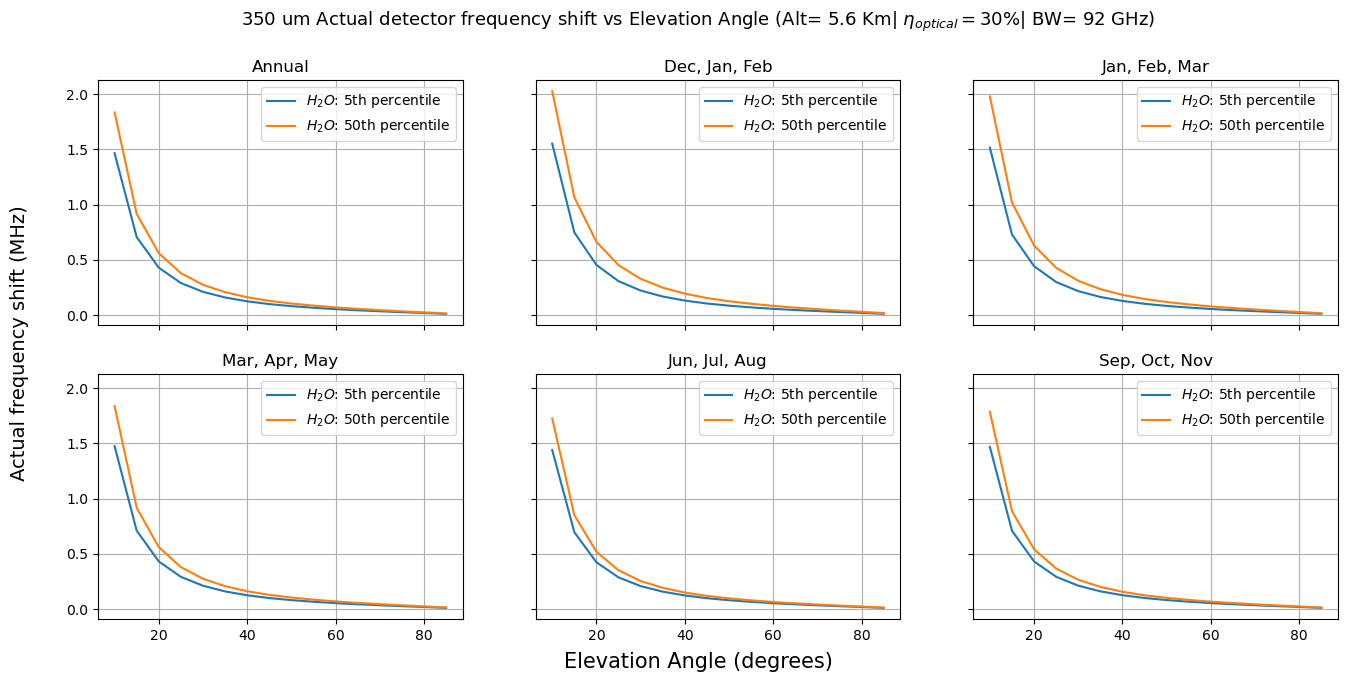

In [135]:
## plotting the freqeuncy shifts

fig, axs = plt.subplots(2,3,sharex=True,sharey=True,figsize=(16,7))
fig.suptitle("350 um Actual detector frequency shift vs Elevation Angle (Alt= 5.6 Km| $\eta_{optical}=30\% $| BW= 92 GHz)",size=13)

axs[0][0].set_title("Annual")
axs[0][0].plot(ea_submm_load_CCAT_350um_annual_5[0:16],act_freq_shift_submm_load_CCAT_350um_annual_5 *1e-6 ,label ="$H_2O$: 5th percentile")
axs[0][0].plot(ea_submm_load_CCAT_350um_annual_50[0:16],act_freq_shift_submm_load_CCAT_350um_annual_50 *1e-6 ,label ="$H_2O$: 50th percentile")
#axs[0][0].plot(ea_submm_load_CCAT_350um_annual_95[0:16],act_freq_shift_submm_load_CCAT_350um_annual_95 *1e-6,label ="$H_2O$: 95th percentile")
axs[0][0].legend()

axs[0][1].set_title("Dec, Jan, Feb")
axs[0][1].plot(ea_submm_load_CCAT_350um_DJF_5[0:16],act_freq_shift_submm_load_CCAT_350um_DJF_5 *1e-6 ,label ="$H_2O$: 5th percentile")
axs[0][1].plot(ea_submm_load_CCAT_350um_DJF_50[0:16],act_freq_shift_submm_load_CCAT_350um_DJF_50 *1e-6 ,label ="$H_2O$: 50th percentile")
#axs[0][1].plot(ea_submm_load_CCAT_350um_DJF_95[0:16],act_freq_shift_submm_load_CCAT_350um_DJF_95 *1e-6 ,label ="$H_2O$: 95th percentile")
axs[0][1].legend()

axs[0][2].set_title("Jan, Feb, Mar")
axs[0][2].plot(ea_submm_load_CCAT_350um_JFM_5[0:16],act_freq_shift_submm_load_CCAT_350um_JFM_5 *1e-6 ,label ="$H_2O$: 5th percentile")
axs[0][2].plot(ea_submm_load_CCAT_350um_JFM_50[0:16],act_freq_shift_submm_load_CCAT_350um_JFM_50 *1e-6,label ="$H_2O$: 50th percentile")
#axs[0][2].plot(ea_submm_load_CCAT_350um_JFM_95[0:16],act_freq_shift_submm_load_CCAT_350um_JFM_95 *1e-6 ,label ="$H_2O$: 95th percentile")
axs[0][2].legend()

axs[1][0].set_title("Mar, Apr, May")
axs[1][0].plot(ea_submm_load_CCAT_350um_MAM_5[0:16],act_freq_shift_submm_load_CCAT_350um_MAM_5 *1e-6,label ="$H_2O$: 5th percentile")
axs[1][0].plot(ea_submm_load_CCAT_350um_MAM_50[0:16],act_freq_shift_submm_load_CCAT_350um_MAM_50 *1e-6,label ="$H_2O$: 50th percentile")
#axs[1][0].plot(ea_submm_load_CCAT_350um_MAM_95[0:16],act_freq_shift_submm_load_CCAT_350um_MAM_95 *1e-6 ,label ="$H_2O$: 95th percentile")
axs[1][0].legend()

axs[1][1].set_title("Jun, Jul, Aug")
axs[1][1].plot(ea_submm_load_CCAT_350um_JJA_5[0:16],act_freq_shift_submm_load_CCAT_350um_JJA_5 *1e-6 ,label ="$H_2O$: 5th percentile")
axs[1][1].plot(ea_submm_load_CCAT_350um_JJA_50[0:16],act_freq_shift_submm_load_CCAT_350um_JJA_50 *1e-6 ,label ="$H_2O$: 50th percentile")
#axs[1][1].plot(ea_submm_load_CCAT_350um_JJA_95[0:16],act_freq_shift_submm_load_CCAT_350um_JJA_95 *1e-6,label ="$H_2O$: 95th percentile")
axs[1][1].legend()

axs[1][2].set_title("Sep, Oct, Nov")
axs[1][2].plot(ea_submm_load_CCAT_350um_SON_5[0:16],act_freq_shift_submm_load_CCAT_350um_SON_5 *1e-6 ,label ="$H_2O$: 5th percentile")
axs[1][2].plot(ea_submm_load_CCAT_350um_SON_50[0:16],act_freq_shift_submm_load_CCAT_350um_SON_50 *1e-6,label ="$H_2O$: 50th percentile")
#axs[1][2].plot(ea_submm_load_CCAT_350um_SON_95[0:16],act_freq_shift_submm_load_CCAT_350um_SON_95 *1e-6,label ="$H_2O$: 95th percentile")
axs[1][2].legend()

# plt.xlabel("Elevation Angle (dgrees)",size=12)
# plt.ylabel("Loading act_freq_shifter (pW) ",size=12)

fig.text(0.5, 0.04, 'Elevation Angle (degrees)', ha='center',size=15)
fig.text(0.07, 0.5, ' Actual frequency shift (MHz)', va='center', rotation='vertical',size=14)


plt.savefig("v1_outputs/350 um Actual detector frequency shift vs Elevation Angle (Alt= 5.6 Km| $\eta_{optical}=30\% $| BW= 92 GHz)_V1.jpg",dpi="figure")

plt.show()

In [136]:
act_freq_shift_submm_load_CCAT_350um_annual_5 

array([  12794.70326688,   20511.28202217,   27926.39276235,
         36209.48094218,   45058.6907722 ,   55342.31102344,
         67790.89190383,   82522.86526115,  100942.76788059,
        126107.48949932,  160926.35850833,  211895.78593254,
        291699.04425554,  430143.65271881,  707306.04347527,
       1465255.0358866 ])

In [137]:
act_freq_shift_submm_load_CCAT_350um_annual_5[1] - act_freq_shift_submm_load_CCAT_350um_annual_5[0]

7716.578755289571

In [138]:
ea_submm_load_CCAT_350um_annual_5 

array([85., 80., 75., 70., 65., 60., 55., 50., 45., 40., 35., 30., 25.,
       20., 15., 10.,  5.])

In [139]:
# ---------------------------------------------------------------------------deg shift gradient -----------------------------------------------------------------------------

deg_shifts_submm_load_CCAT_350um_annual_5 = (2200*5)/act_freq_shift_submm_load_CCAT_350um_annual_5  # this amount of deg shift for a change in 2.2 KHz or 1/10 the line width of 22000 Hz
deg_shifts_submm_load_CCAT_350um_annual_50 = (2200*5)/act_freq_shift_submm_load_CCAT_350um_annual_50
deg_shifts_submm_load_CCAT_350um_annual_95 = (2200*5)/act_freq_shift_submm_load_CCAT_350um_annual_95

deg_shifts_submm_load_CCAT_350um_DJF_5 = (2200*5)/act_freq_shift_submm_load_CCAT_350um_DJF_5  # this amount of deg shift for a change in 2.2 KHz or 1/10 the line width of 22000 Hz
deg_shifts_submm_load_CCAT_350um_DJF_50 = (2200*5)/act_freq_shift_submm_load_CCAT_350um_DJF_50
deg_shifts_submm_load_CCAT_350um_DJF_95 = (2200*5)/act_freq_shift_submm_load_CCAT_350um_DJF_95

deg_shifts_submm_load_CCAT_350um_JFM_5 = (2200*5)/act_freq_shift_submm_load_CCAT_350um_JFM_5  # this amount of deg shift for a change in 2.2 KHz or 1/10 the line width of 22000 Hz
deg_shifts_submm_load_CCAT_350um_JFM_50 = (2200*5)/act_freq_shift_submm_load_CCAT_350um_JFM_50
deg_shifts_submm_load_CCAT_350um_JFM_95 = (2200*5)/act_freq_shift_submm_load_CCAT_350um_JFM_95

deg_shifts_submm_load_CCAT_350um_MAM_5 = (2200*5)/act_freq_shift_submm_load_CCAT_350um_MAM_5  # this amount of deg shift for a change in 2.2 KHz or 1/10 the line width of 22000 Hz
deg_shifts_submm_load_CCAT_350um_MAM_50 = (2200*5)/act_freq_shift_submm_load_CCAT_350um_MAM_50
deg_shifts_submm_load_CCAT_350um_MAM_95 = (2200*5)/act_freq_shift_submm_load_CCAT_350um_MAM_95

deg_shifts_submm_load_CCAT_350um_JJA_5 = (2200*5)/act_freq_shift_submm_load_CCAT_350um_JJA_5  # this amount of deg shift for a change in 2.2 KHz or 1/10 the line width of 22000 Hz
deg_shifts_submm_load_CCAT_350um_JJA_50 = (2200*5)/act_freq_shift_submm_load_CCAT_350um_JJA_50
deg_shifts_submm_load_CCAT_350um_JJA_95 = (2200*5)/act_freq_shift_submm_load_CCAT_350um_JJA_95

deg_shifts_submm_load_CCAT_350um_SON_5 = (2200*5)/act_freq_shift_submm_load_CCAT_350um_SON_5  # this amount of deg shift for a change in 2.2 KHz or 1/10 the line width of 22000 Hz
deg_shifts_submm_load_CCAT_350um_SON_50 = (2200*5)/act_freq_shift_submm_load_CCAT_350um_SON_50
deg_shifts_submm_load_CCAT_350um_SON_95 = (2200*5)/act_freq_shift_submm_load_CCAT_350um_SON_95

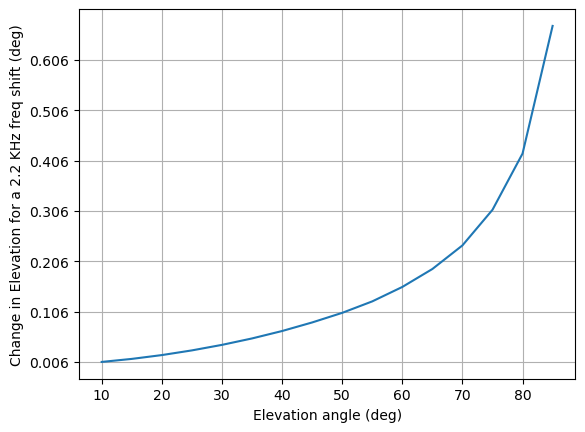

In [140]:
plt.plot(ea_submm_load_CCAT_350um_annual_50[0:16],deg_shifts_submm_load_CCAT_350um_annual_50)
#plt.title("Change in elevation (deg) to get a 2.2 KHz frequency shift")
plt.ylabel("Change in Elevation for a 2.2 KHz freq shift (deg)")
plt.xlabel("Elevation angle (deg)")
plt.yticks(np.arange(min(deg_shifts_submm_load_CCAT_350um_annual_50), max(deg_shifts_submm_load_CCAT_350um_annual_50), 0.1))
plt.show()

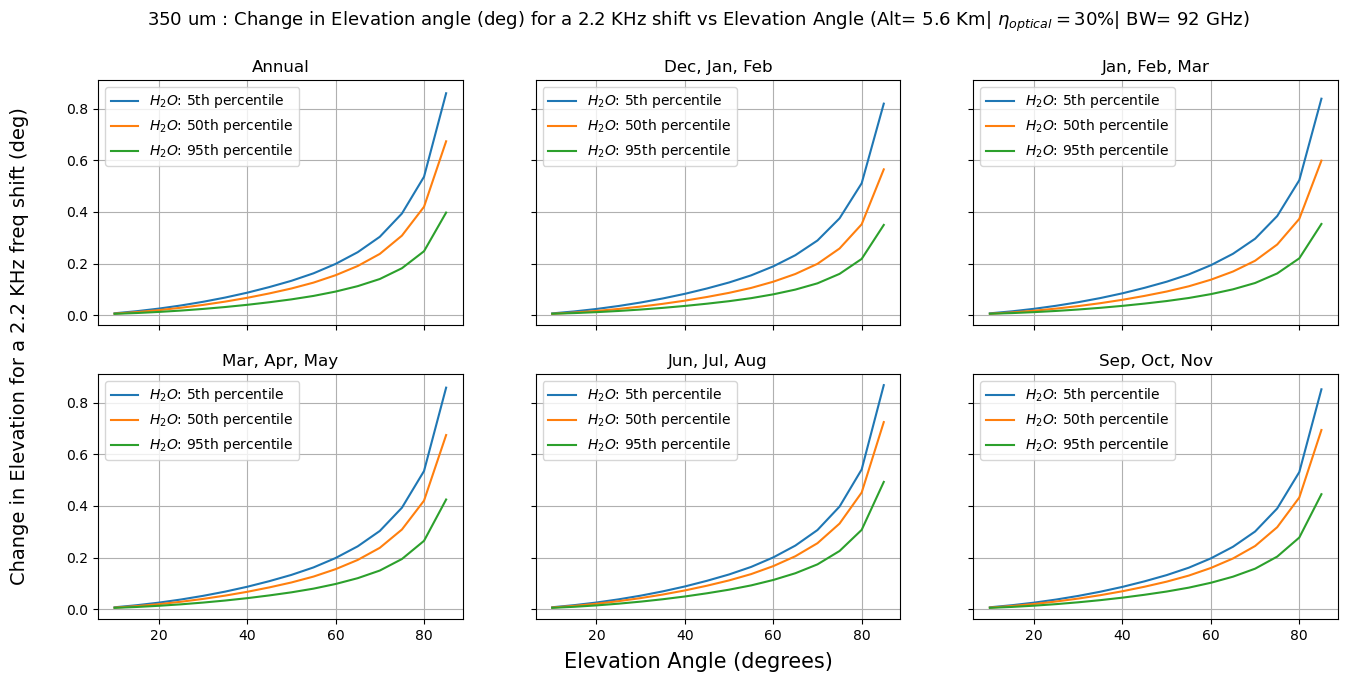

In [141]:
## plotting the freqeuncy shifts

fig, axs = plt.subplots(2,3,sharex=True,sharey=True,figsize=(16,7))
fig.suptitle("350 um : Change in Elevation angle (deg) for a 2.2 KHz shift vs Elevation Angle (Alt= 5.6 Km| $\eta_{optical}=30\% $| BW= 92 GHz)",size=13)

axs[0][0].set_title("Annual")
axs[0][0].plot(ea_submm_load_CCAT_350um_annual_5[0:16],deg_shifts_submm_load_CCAT_350um_annual_5  ,label ="$H_2O$: 5th percentile")
axs[0][0].plot(ea_submm_load_CCAT_350um_annual_50[0:16],deg_shifts_submm_load_CCAT_350um_annual_50  ,label ="$H_2O$: 50th percentile")
axs[0][0].plot(ea_submm_load_CCAT_350um_annual_95[0:16],deg_shifts_submm_load_CCAT_350um_annual_95 ,label ="$H_2O$: 95th percentile")
#axs[0][0].yticks(np.arange(min(deg_shifts_submm_load_CCAT_350um_annual_50), max(deg_shifts_submm_load_CCAT_350um_annual_50), 0.1))
axs[0][0].legend()

axs[0][1].set_title("Dec, Jan, Feb")
axs[0][1].plot(ea_submm_load_CCAT_350um_DJF_5[0:16],deg_shifts_submm_load_CCAT_350um_DJF_5  ,label ="$H_2O$: 5th percentile")
axs[0][1].plot(ea_submm_load_CCAT_350um_DJF_50[0:16],deg_shifts_submm_load_CCAT_350um_DJF_50  ,label ="$H_2O$: 50th percentile")
axs[0][1].plot(ea_submm_load_CCAT_350um_DJF_95[0:16],deg_shifts_submm_load_CCAT_350um_DJF_95  ,label ="$H_2O$: 95th percentile")
axs[0][1].legend()

axs[0][2].set_title("Jan, Feb, Mar")
axs[0][2].plot(ea_submm_load_CCAT_350um_JFM_5[0:16],deg_shifts_submm_load_CCAT_350um_JFM_5  ,label ="$H_2O$: 5th percentile")
axs[0][2].plot(ea_submm_load_CCAT_350um_JFM_50[0:16],deg_shifts_submm_load_CCAT_350um_JFM_50 ,label ="$H_2O$: 50th percentile")
axs[0][2].plot(ea_submm_load_CCAT_350um_JFM_95[0:16],deg_shifts_submm_load_CCAT_350um_JFM_95  ,label ="$H_2O$: 95th percentile")
axs[0][2].legend()

axs[1][0].set_title("Mar, Apr, May")
axs[1][0].plot(ea_submm_load_CCAT_350um_MAM_5[0:16],deg_shifts_submm_load_CCAT_350um_MAM_5 ,label ="$H_2O$: 5th percentile")
axs[1][0].plot(ea_submm_load_CCAT_350um_MAM_50[0:16],deg_shifts_submm_load_CCAT_350um_MAM_50 ,label ="$H_2O$: 50th percentile")
axs[1][0].plot(ea_submm_load_CCAT_350um_MAM_95[0:16],deg_shifts_submm_load_CCAT_350um_MAM_95  ,label ="$H_2O$: 95th percentile")
axs[1][0].legend()

axs[1][1].set_title("Jun, Jul, Aug")
axs[1][1].plot(ea_submm_load_CCAT_350um_JJA_5[0:16],deg_shifts_submm_load_CCAT_350um_JJA_5  ,label ="$H_2O$: 5th percentile")
axs[1][1].plot(ea_submm_load_CCAT_350um_JJA_50[0:16],deg_shifts_submm_load_CCAT_350um_JJA_50  ,label ="$H_2O$: 50th percentile")
axs[1][1].plot(ea_submm_load_CCAT_350um_JJA_95[0:16],deg_shifts_submm_load_CCAT_350um_JJA_95 ,label ="$H_2O$: 95th percentile")
axs[1][1].legend()

axs[1][2].set_title("Sep, Oct, Nov")
axs[1][2].plot(ea_submm_load_CCAT_350um_SON_5[0:16],deg_shifts_submm_load_CCAT_350um_SON_5  ,label ="$H_2O$: 5th percentile")
axs[1][2].plot(ea_submm_load_CCAT_350um_SON_50[0:16],deg_shifts_submm_load_CCAT_350um_SON_50 ,label ="$H_2O$: 50th percentile")
axs[1][2].plot(ea_submm_load_CCAT_350um_SON_95[0:16],deg_shifts_submm_load_CCAT_350um_SON_95 ,label ="$H_2O$: 95th percentile")
axs[1][2].legend()

# plt.xlabel("Elevation Angle (dgrees)",size=12)
# plt.ylabel("Loading act_freq_shifter (pW) ",size=12)

fig.text(0.5, 0.04, 'Elevation Angle (degrees)', ha='center',size=15)
fig.text(0.07, 0.5, 'Change in Elevation for a 2.2 KHz freq shift (deg)', va='center', rotation='vertical',size=14)


plt.savefig("v1_outputs/350 um : Change in Elevation angle (deg) for a 2.2 KHz shift vs Elevation Angle (Alt= 5.6 Km| $\eta_{optical}=30\% $| BW= 92 GHz)_V1.jpg",dpi="figure")

plt.show()

### FWHM = $ \frac{f_{res}}{Q_r} = \frac{800 MHz}{36380} = 22,000  Hz $

### $\frac{1}{10}$ of the Line width = $ 2.2 KHz $  (Linear Regime)

### Performing the skydips but with site files

In [87]:
# ea_CCAT = 90-np.linspace(5.0,85.0,17)

# #----------------------------------------------------------------------ANNUAL------------------------------------------------------------------------

# #  5654th index corresponds to the 856.54 GHz or 350 um

# trj_CCAT_annual_5=[]
# tb_CCAT_annual_5=[]

# trj_CCAT_annual_50=[]
# tb_CCAT_annual_50=[]

# trj_CCAT_annual_95=[]
# tb_CCAT_annual_95=[]

# for i in np.linspace(5.0,85.0,17):
    
#     CCAT_annual_5_skydip = np.loadtxt("CCAT_annual_5_skydip_"+ str(i) + ".out")
#     #f_CCAT_annual_5_skydip_5 = CCAT_annual_5_skydip_5[:,0][5654]
#     trj_CCAT_annual_5_skydip = CCAT_annual_5_skydip[:,3][5654]
#     tb_CCAT_annual_5_skydip = CCAT_annual_5_skydip[:,4][5654]
    
#     trj_CCAT_annual_5.append(trj_CCAT_annual_5_skydip)
#     tb_CCAT_annual_5.append(tb_CCAT_annual_5_skydip)


# for i in np.linspace(5.0,85.0,17):
    
#     CCAT_annual_50_skydip = np.loadtxt("CCAT_annual_50_skydip_"+ str(i) + ".out")
#     #f_CCAT_annual_5_skydip_5 = CCAT_annual_5_skydip_5[:,0][5654]
#     trj_CCAT_annual_50_skydip = CCAT_annual_50_skydip[:,3][5654]
#     tb_CCAT_annual_50_skydip = CCAT_annual_50_skydip[:,4][5654]
    
#     trj_CCAT_annual_50.append(trj_CCAT_annual_50_skydip)
#     tb_CCAT_annual_50.append(tb_CCAT_annual_50_skydip)


# for i in np.linspace(5.0,85.0,17):
    
#     CCAT_annual_95_skydip = np.loadtxt("CCAT_annual_95_skydip_"+ str(i) + ".out")
#     #f_CCAT_annual_5_skydip_5 = CCAT_annual_5_skydip_5[:,0][5654]
#     trj_CCAT_annual_95_skydip = CCAT_annual_95_skydip[:,3][5654]
#     tb_CCAT_annual_95_skydip = CCAT_annual_95_skydip[:,4][5654]
    
#     trj_CCAT_annual_95.append(trj_CCAT_annual_95_skydip)
#     tb_CCAT_annual_95.append(tb_CCAT_annual_95_skydip)

# #----------------------------------------------------------------------DJF------------------------------------------------------------------------

# #  5654th index corresponds to the 856.54 GHz or 350 um

# trj_CCAT_DJF_5=[]
# tb_CCAT_DJF_5=[]

# trj_CCAT_DJF_50=[]
# tb_CCAT_DJF_50=[]

# trj_CCAT_DJF_95=[]
# tb_CCAT_DJF_95=[]

# for i in np.linspace(5.0,85.0,17):
    
#     CCAT_DJF_5_skydip = np.loadtxt("CCAT_DJF_5_skydip_"+ str(i) + ".out")
#     #f_CCAT_DJF_5_skydip_5 = CCAT_DJF_5_skydip_5[:,0][5654]
#     trj_CCAT_DJF_5_skydip = CCAT_DJF_5_skydip[:,3][5654]
#     tb_CCAT_DJF_5_skydip = CCAT_DJF_5_skydip[:,4][5654]
    
#     trj_CCAT_DJF_5.append(trj_CCAT_DJF_5_skydip)
#     tb_CCAT_DJF_5.append(tb_CCAT_DJF_5_skydip)


# for i in np.linspace(5.0,85.0,17):
    
#     CCAT_DJF_50_skydip = np.loadtxt("CCAT_DJF_50_skydip_"+ str(i) + ".out")
#     #f_CCAT_DJF_5_skydip_5 = CCAT_DJF_5_skydip_5[:,0][5654]
#     trj_CCAT_DJF_50_skydip = CCAT_DJF_50_skydip[:,3][5654]
#     tb_CCAT_DJF_50_skydip = CCAT_DJF_50_skydip[:,4][5654]
    
#     trj_CCAT_DJF_50.append(trj_CCAT_DJF_50_skydip)
#     tb_CCAT_DJF_50.append(tb_CCAT_DJF_50_skydip)


# for i in np.linspace(5.0,85.0,17):
    
#     CCAT_DJF_95_skydip = np.loadtxt("CCAT_DJF_95_skydip_"+ str(i) + ".out")
#     #f_CCAT_DJF_5_skydip_5 = CCAT_DJF_5_skydip_5[:,0][5654]
#     trj_CCAT_DJF_95_skydip = CCAT_DJF_95_skydip[:,3][5654]
#     tb_CCAT_DJF_95_skydip = CCAT_DJF_95_skydip[:,4][5654]
    
#     trj_CCAT_DJF_95.append(trj_CCAT_DJF_95_skydip)
#     tb_CCAT_DJF_95.append(tb_CCAT_DJF_95_skydip)

# #----------------------------------------------------------------------JFM------------------------------------------------------------------------

# #  5654th index corresponds to the 856.54 GHz or 350 um

# trj_CCAT_JFM_5=[]
# tb_CCAT_JFM_5=[]

# trj_CCAT_JFM_50=[]
# tb_CCAT_JFM_50=[]

# trj_CCAT_JFM_95=[]
# tb_CCAT_JFM_95=[]

# for i in np.linspace(5.0,85.0,17):
    
#     CCAT_JFM_5_skydip = np.loadtxt("CCAT_JFM_5_skydip_"+ str(i) + ".out")
#     #f_CCAT_JFM_5_skydip_5 = CCAT_JFM_5_skydip_5[:,0][5654]
#     trj_CCAT_JFM_5_skydip = CCAT_JFM_5_skydip[:,3][5654]
#     tb_CCAT_JFM_5_skydip = CCAT_JFM_5_skydip[:,4][5654]
    
#     trj_CCAT_JFM_5.append(trj_CCAT_JFM_5_skydip)
#     tb_CCAT_JFM_5.append(tb_CCAT_JFM_5_skydip)


# for i in np.linspace(5.0,85.0,17):
    
#     CCAT_JFM_50_skydip = np.loadtxt("CCAT_JFM_50_skydip_"+ str(i) + ".out")
#     #f_CCAT_JFM_5_skydip_5 = CCAT_JFM_5_skydip_5[:,0][5654]
#     trj_CCAT_JFM_50_skydip = CCAT_JFM_50_skydip[:,3][5654]
#     tb_CCAT_JFM_50_skydip = CCAT_JFM_50_skydip[:,4][5654]
    
#     trj_CCAT_JFM_50.append(trj_CCAT_JFM_50_skydip)
#     tb_CCAT_JFM_50.append(tb_CCAT_JFM_50_skydip)


# for i in np.linspace(5.0,85.0,17):
    
#     CCAT_JFM_95_skydip = np.loadtxt("CCAT_JFM_95_skydip_"+ str(i) + ".out")
#     #f_CCAT_JFM_5_skydip_5 = CCAT_JFM_5_skydip_5[:,0][5654]
#     trj_CCAT_JFM_95_skydip = CCAT_JFM_95_skydip[:,3][5654]
#     tb_CCAT_JFM_95_skydip = CCAT_JFM_95_skydip[:,4][5654]
    
#     trj_CCAT_JFM_95.append(trj_CCAT_JFM_95_skydip)
#     tb_CCAT_JFM_95.append(tb_CCAT_JFM_95_skydip)

# #----------------------------------------------------------------------MAM------------------------------------------------------------------------

# #  5654th index corresponds to the 856.54 GHz or 350 um

# trj_CCAT_MAM_5=[]
# tb_CCAT_MAM_5=[]

# trj_CCAT_MAM_50=[]
# tb_CCAT_MAM_50=[]

# trj_CCAT_MAM_95=[]
# tb_CCAT_MAM_95=[]

# for i in np.linspace(5.0,85.0,17):
    
#     CCAT_MAM_5_skydip = np.loadtxt("CCAT_MAM_5_skydip_"+ str(i) + ".out")
#     #f_CCAT_MAM_5_skydip_5 = CCAT_MAM_5_skydip_5[:,0][5654]
#     trj_CCAT_MAM_5_skydip = CCAT_MAM_5_skydip[:,3][5654]
#     tb_CCAT_MAM_5_skydip = CCAT_MAM_5_skydip[:,4][5654]
    
#     trj_CCAT_MAM_5.append(trj_CCAT_MAM_5_skydip)
#     tb_CCAT_MAM_5.append(tb_CCAT_MAM_5_skydip)


# for i in np.linspace(5.0,85.0,17):
    
#     CCAT_MAM_50_skydip = np.loadtxt("CCAT_MAM_50_skydip_"+ str(i) + ".out")
#     #f_CCAT_MAM_5_skydip_5 = CCAT_MAM_5_skydip_5[:,0][5654]
#     trj_CCAT_MAM_50_skydip = CCAT_MAM_50_skydip[:,3][5654]
#     tb_CCAT_MAM_50_skydip = CCAT_MAM_50_skydip[:,4][5654]
    
#     trj_CCAT_MAM_50.append(trj_CCAT_MAM_50_skydip)
#     tb_CCAT_MAM_50.append(tb_CCAT_MAM_50_skydip)


# for i in np.linspace(5.0,85.0,17):
    
#     CCAT_MAM_95_skydip = np.loadtxt("CCAT_MAM_95_skydip_"+ str(i) + ".out")
#     #f_CCAT_MAM_5_skydip_5 = CCAT_MAM_5_skydip_5[:,0][5654]
#     trj_CCAT_MAM_95_skydip = CCAT_MAM_95_skydip[:,3][5654]
#     tb_CCAT_MAM_95_skydip = CCAT_MAM_95_skydip[:,4][5654]
    
#     trj_CCAT_MAM_95.append(trj_CCAT_MAM_95_skydip)
#     tb_CCAT_MAM_95.append(tb_CCAT_MAM_95_skydip)

# #----------------------------------------------------------------------JJA------------------------------------------------------------------------

# #  5654th index corresponds to the 856.54 GHz or 350 um

# trj_CCAT_JJA_5=[]
# tb_CCAT_JJA_5=[]

# trj_CCAT_JJA_50=[]
# tb_CCAT_JJA_50=[]

# trj_CCAT_JJA_95=[]
# tb_CCAT_JJA_95=[]

# for i in np.linspace(5.0,85.0,17):
    
#     CCAT_JJA_5_skydip = np.loadtxt("CCAT_JJA_5_skydip_"+ str(i) + ".out")
#     #f_CCAT_JJA_5_skydip_5 = CCAT_JJA_5_skydip_5[:,0][5654]
#     trj_CCAT_JJA_5_skydip = CCAT_JJA_5_skydip[:,3][5654]
#     tb_CCAT_JJA_5_skydip = CCAT_JJA_5_skydip[:,4][5654]
    
#     trj_CCAT_JJA_5.append(trj_CCAT_JJA_5_skydip)
#     tb_CCAT_JJA_5.append(tb_CCAT_JJA_5_skydip)


# for i in np.linspace(5.0,85.0,17):
    
#     CCAT_JJA_50_skydip = np.loadtxt("CCAT_JJA_50_skydip_"+ str(i) + ".out")
#     #f_CCAT_JJA_5_skydip_5 = CCAT_JJA_5_skydip_5[:,0][5654]
#     trj_CCAT_JJA_50_skydip = CCAT_JJA_50_skydip[:,3][5654]
#     tb_CCAT_JJA_50_skydip = CCAT_JJA_50_skydip[:,4][5654]
    
#     trj_CCAT_JJA_50.append(trj_CCAT_JJA_50_skydip)
#     tb_CCAT_JJA_50.append(tb_CCAT_JJA_50_skydip)


# for i in np.linspace(5.0,85.0,17):
    
#     CCAT_JJA_95_skydip = np.loadtxt("CCAT_JJA_95_skydip_"+ str(i) + ".out")
#     #f_CCAT_JJA_5_skydip_5 = CCAT_JJA_5_skydip_5[:,0][5654]
#     trj_CCAT_JJA_95_skydip = CCAT_JJA_95_skydip[:,3][5654]
#     tb_CCAT_JJA_95_skydip = CCAT_JJA_95_skydip[:,4][5654]
    
#     trj_CCAT_JJA_95.append(trj_CCAT_JJA_95_skydip)
#     tb_CCAT_JJA_95.append(tb_CCAT_JJA_95_skydip)

# #----------------------------------------------------------------------SON------------------------------------------------------------------------

# #  5654th index corresponds to the 856.54 GHz or 350 um

# trj_CCAT_SON_5=[]
# tb_CCAT_SON_5=[]

# trj_CCAT_SON_50=[]
# tb_CCAT_SON_50=[]

# trj_CCAT_SON_95=[]
# tb_CCAT_SON_95=[]

# for i in np.linspace(5.0,85.0,17):
    
#     CCAT_SON_5_skydip = np.loadtxt("CCAT_SON_5_skydip_"+ str(i) + ".out")
#     #f_CCAT_SON_5_skydip_5 = CCAT_SON_5_skydip_5[:,0][5654]
#     trj_CCAT_SON_5_skydip = CCAT_SON_5_skydip[:,3][5654]
#     tb_CCAT_SON_5_skydip = CCAT_SON_5_skydip[:,4][5654]
    
#     trj_CCAT_SON_5.append(trj_CCAT_SON_5_skydip)
#     tb_CCAT_SON_5.append(tb_CCAT_SON_5_skydip)


# for i in np.linspace(5.0,85.0,17):
    
#     CCAT_SON_50_skydip = np.loadtxt("CCAT_SON_50_skydip_"+ str(i) + ".out")
#     #f_CCAT_SON_5_skydip_5 = CCAT_SON_5_skydip_5[:,0][5654]
#     trj_CCAT_SON_50_skydip = CCAT_SON_50_skydip[:,3][5654]
#     tb_CCAT_SON_50_skydip = CCAT_SON_50_skydip[:,4][5654]
    
#     trj_CCAT_SON_50.append(trj_CCAT_SON_50_skydip)
#     tb_CCAT_SON_50.append(tb_CCAT_SON_50_skydip)


# for i in np.linspace(5.0,85.0,17):
    
#     CCAT_SON_95_skydip = np.loadtxt("CCAT_SON_95_skydip_"+ str(i) + ".out")
#     #f_CCAT_SON_5_skydip_5 = CCAT_SON_5_skydip_5[:,0][5654]
#     trj_CCAT_SON_95_skydip = CCAT_SON_95_skydip[:,3][5654]
#     tb_CCAT_SON_95_skydip = CCAT_SON_95_skydip[:,4][5654]
    
#     trj_CCAT_SON_95.append(trj_CCAT_SON_95_skydip)
#     tb_CCAT_SON_95.append(tb_CCAT_SON_95_skydip)

In [88]:
# fig, axs = plt.subplots(2,3,sharex=True,sharey=True,figsize=(16,7))
# fig.suptitle("Site Files : Rayleigh Jeans Temperature vs Elevation Angle (Alt= 5.6 Km| BW= 92 GHz)",size=13)

# axs[0][0].set_title("Annual")
# axs[0][0].plot(ea_CCAT,trj_CCAT_annual_5 ,label ="$H_2O$: 5th percentile")
# axs[0][0].plot(ea_CCAT,trj_CCAT_annual_50 ,label ="$H_2O$: 50th percentile")
# #axs[0][0].plot(ea_CCAT,trj_CCAT_annual_95 ,label ="$H_2O$: 95th percentile")
# axs[0][0].legend()

# axs[0][1].set_title("Dec, Jan, Feb")
# axs[0][1].plot(ea_CCAT,trj_CCAT_DJF_5 ,label ="$H_2O$: 5th percentile")
# axs[0][1].plot(ea_CCAT,trj_CCAT_DJF_50 ,label ="$H_2O$: 50th percentile")
# #axs[0][1].plot(ea_CCAT,trj_CCAT_DJF_95 ,label ="$H_2O$: 95th percentile")
# axs[0][1].legend()

# axs[0][2].set_title("Jan, Feb, Mar")
# axs[0][2].plot(ea_CCAT,trj_CCAT_JFM_5 ,label ="$H_2O$: 5th percentile")
# axs[0][2].plot(ea_CCAT,trj_CCAT_JFM_50 ,label ="$H_2O$: 50th percentile")
# #axs[0][2].plot(ea_CCAT,trj_CCAT_JFM_95 ,label ="$H_2O$: 95th percentile")
# axs[0][2].legend()

# axs[1][0].set_title("Mar, Apr, May")
# axs[1][0].plot(ea_CCAT,trj_CCAT_MAM_5 ,label ="$H_2O$: 5th percentile")
# axs[1][0].plot(ea_CCAT,trj_CCAT_MAM_50 ,label ="$H_2O$: 50th percentile")
# #axs[1][0].plot(ea_CCAT,trj_CCAT_MAM_95 ,label ="$H_2O$: 95th percentile")
# axs[1][0].legend()

# axs[1][1].set_title("Jun, Jul, Aug")
# axs[1][1].plot(ea_CCAT,trj_CCAT_JJA_5 ,label ="$H_2O$: 5th percentile")
# axs[1][1].plot(ea_CCAT,trj_CCAT_JJA_50 ,label ="$H_2O$: 50th percentile")
# #axs[1][1].plot(ea_CCAT,trj_CCAT_JJA_95 ,label ="$H_2O$: 95th percentile")
# axs[1][1].legend()

# axs[1][2].set_title("Sep, Oct, Nov")
# axs[1][2].plot(ea_CCAT,trj_CCAT_SON_5 ,label ="$H_2O$: 5th percentile")
# axs[1][2].plot(ea_CCAT,trj_CCAT_SON_50 ,label ="$H_2O$: 50th percentile")
# #axs[1][2].plot(ea_CCAT,trj_CCAT_SON_95 ,label ="$H_2O$: 95th percentile")
# axs[1][2].legend()

# # plt.xlabel("Elevation Angle (dgrees)",size=12)
# # plt.ylabel("Loading trjer (pW) ",size=12)

# fig.text(0.5, 0.04, 'Elevation Angle (degrees)', ha='center',size=15)
# fig.text(0.07, 0.5, ' $ T_{rj} $(K)', va='center', rotation='vertical',size=14)


# plt.savefig("v1_outputs/Site Files: Rayleigh Jeans Temperature vs Elevation Angle (Alt= 5.6 Km| BW= 92 GHz)_V1.jpg",dpi="figure")

# plt.show()

In [89]:
# # power loading at the detectors in W

# #-------------------------------------------------------------------------------------------ANNUAL-----------------------------------------------------------

# pow_CCAT_annual_5 = eff * np.array(trj_CCAT_annual_5 ) * k * bw 
# pow_CCAT_annual_50 = eff * np.array(trj_CCAT_annual_50 ) * k * bw 
# pow_CCAT_annual_95 = eff * np.array(trj_CCAT_annual_95 ) * k * bw 

# #------------------------------------------------------------------------------------------DJF----------------------------------------------------------------
# pow_CCAT_DJF_5 = eff * np.array(trj_CCAT_DJF_5 ) * k * bw 
# pow_CCAT_DJF_50 = eff * np.array(trj_CCAT_DJF_50 ) * k * bw 
# pow_CCAT_DJF_95 = eff * np.array(trj_CCAT_DJF_95 ) * k * bw 

# #------------------------------------------------------------------------------------------JFM----------------------------------------------------------------
# pow_CCAT_JFM_5 = eff * np.array(trj_CCAT_JFM_5 ) * k * bw 
# pow_CCAT_JFM_50 = eff * np.array(trj_CCAT_JFM_50 ) * k * bw 
# pow_CCAT_JFM_95 = eff * np.array(trj_CCAT_JFM_95 ) * k * bw 

# #------------------------------------------------------------------------------------------MAM----------------------------------------------------------------
# pow_CCAT_MAM_5 = eff * np.array(trj_CCAT_MAM_5 ) * k * bw 
# pow_CCAT_MAM_50 = eff * np.array(trj_CCAT_MAM_50 ) * k * bw 
# pow_CCAT_MAM_95 = eff * np.array(trj_CCAT_MAM_95 ) * k * bw 

# #------------------------------------------------------------------------------------------JJA----------------------------------------------------------------
# pow_CCAT_JJA_5 = eff * np.array(trj_CCAT_JJA_5 ) * k * bw 
# pow_CCAT_JJA_50 = eff * np.array(trj_CCAT_JJA_50 ) * k * bw 
# pow_CCAT_JJA_95 = eff * np.array(trj_CCAT_JJA_95 ) * k * bw 

# #------------------------------------------------------------------------------------------SON----------------------------------------------------------------
# pow_CCAT_SON_5 = eff * np.array(trj_CCAT_SON_5 ) * k * bw 
# pow_CCAT_SON_50 = eff * np.array(trj_CCAT_SON_50 ) * k * bw 
# pow_CCAT_SON_95 = eff * np.array(trj_CCAT_SON_95 ) * k * bw 

In [90]:
# fig, axs = plt.subplots(2,3,sharex=True,sharey=True,figsize=(16,7))
# fig.suptitle("Site Files : Power loading at detector vs Elevation Angle (Alt= 5.6 Km| $\eta_{optical}=30\% $|BW= 92 GHz)",size=13)

# axs[0][0].set_title("Annual")
# axs[0][0].plot(ea_CCAT,pow_CCAT_annual_5 *1e12,label ="$H_2O$: 5th percentile")
# axs[0][0].plot(ea_CCAT,pow_CCAT_annual_50 *1e12,label ="$H_2O$: 50th percentile")
# #axs[0][0].plot(ea_CCAT,pow_CCAT_annual_95 *1e12,label ="$H_2O$: 95th percentile")
# axs[0][0].legend()

# axs[0][1].set_title("Dec, Jan, Feb")
# axs[0][1].plot(ea_CCAT,pow_CCAT_DJF_5 *1e12,label ="$H_2O$: 5th percentile")
# axs[0][1].plot(ea_CCAT,pow_CCAT_DJF_50 *1e12,label ="$H_2O$: 50th percentile")
# #axs[0][1].plot(ea_CCAT,pow_CCAT_DJF_95 *1e12,label ="$H_2O$: 95th percentile")
# axs[0][1].legend()

# axs[0][2].set_title("Jan, Feb, Mar")
# axs[0][2].plot(ea_CCAT,pow_CCAT_JFM_5 *1e12,label ="$H_2O$: 5th percentile")
# axs[0][2].plot(ea_CCAT,pow_CCAT_JFM_50 *1e12,label ="$H_2O$: 50th percentile")
# #axs[0][2].plot(ea_CCAT,pow_CCAT_JFM_95 *1e12,label ="$H_2O$: 95th percentile")
# axs[0][2].legend()

# axs[1][0].set_title("Mar, Apr, May")
# axs[1][0].plot(ea_CCAT,pow_CCAT_MAM_5 *1e12,label ="$H_2O$: 5th percentile")
# axs[1][0].plot(ea_CCAT,pow_CCAT_MAM_50 *1e12,label ="$H_2O$: 50th percentile")
# #axs[1][0].plot(ea_CCAT,pow_CCAT_MAM_95 *1e12,label ="$H_2O$: 95th percentile")
# axs[1][0].legend()

# axs[1][1].set_title("Jun, Jul, Aug")
# axs[1][1].plot(ea_CCAT,pow_CCAT_JJA_5 *1e12,label ="$H_2O$: 5th percentile")
# axs[1][1].plot(ea_CCAT,pow_CCAT_JJA_50 *1e12,label ="$H_2O$: 50th percentile")
# #axs[1][1].plot(ea_CCAT,pow_CCAT_JJA_95 *1e12,label ="$H_2O$: 95th percentile")
# axs[1][1].legend()

# axs[1][2].set_title("Sep, Oct, Nov")
# axs[1][2].plot(ea_CCAT,pow_CCAT_SON_5 *1e12,label ="$H_2O$: 5th percentile")
# axs[1][2].plot(ea_CCAT,pow_CCAT_SON_50 *1e12,label ="$H_2O$: 50th percentile")
# #axs[1][2].plot(ea_CCAT,pow_CCAT_SON_95 *1e12,label ="$H_2O$: 95th percentile")
# axs[1][2].legend()

# # plt.xlabel("Elevation Angle (dgrees)",size=12)
# # plt.ylabel("Loading power (pW) ",size=12)

# fig.text(0.5, 0.04, 'Elevation Angle (degrees)', ha='center',size=15)
# fig.text(0.07, 0.5, ' Power(pW)', va='center', rotation='vertical',size=14)


# plt.savefig("v1_outputs/Site Files: Power Loading vs Elevation Angle (Alt= 5.6 Km| BW= 92 GHz)_V1.jpg",dpi="figure")

# plt.show()

In [91]:
# fig, axs = plt.subplots(2,3,sharex=True,sharey=True,figsize=(16,7))
# fig.suptitle("Site Files : Brightness Temperature vs Elevation Angle (Alt= 5.6 Km| BW= 92 GHz)",size=13)

# axs[0][0].set_title("Annual")
# axs[0][0].plot(ea_CCAT,tb_CCAT_annual_5 ,label ="$H_2O$: 5th percentile")
# axs[0][0].plot(ea_CCAT,tb_CCAT_annual_50 ,label ="$H_2O$: 50th percentile")
# #axs[0][0].plot(ea_CCAT,tb_CCAT_annual_95 ,label ="$H_2O$: 95th percentile")
# axs[0][0].legend()

# axs[0][1].set_title("Dec, Jan, Feb")
# axs[0][1].plot(ea_CCAT,tb_CCAT_DJF_5 ,label ="$H_2O$: 5th percentile")
# axs[0][1].plot(ea_CCAT,tb_CCAT_DJF_50 ,label ="$H_2O$: 50th percentile")
# #axs[0][1].plot(ea_CCAT,tb_CCAT_DJF_95 ,label ="$H_2O$: 95th percentile")
# axs[0][1].legend()

# axs[0][2].set_title("Jan, Feb, Mar")
# axs[0][2].plot(ea_CCAT,tb_CCAT_JFM_5 ,label ="$H_2O$: 5th percentile")
# axs[0][2].plot(ea_CCAT,tb_CCAT_JFM_50 ,label ="$H_2O$: 50th percentile")
# #axs[0][2].plot(ea_CCAT,tb_CCAT_JFM_95 ,label ="$H_2O$: 95th percentile")
# axs[0][2].legend()

# axs[1][0].set_title("Mar, Apr, May")
# axs[1][0].plot(ea_CCAT,tb_CCAT_MAM_5 ,label ="$H_2O$: 5th percentile")
# axs[1][0].plot(ea_CCAT,tb_CCAT_MAM_50 ,label ="$H_2O$: 50th percentile")
# #axs[1][0].plot(ea_CCAT,tb_CCAT_MAM_95 ,label ="$H_2O$: 95th percentile")
# axs[1][0].legend()

# axs[1][1].set_title("Jun, Jul, Aug")
# axs[1][1].plot(ea_CCAT,tb_CCAT_JJA_5 ,label ="$H_2O$: 5th percentile")
# axs[1][1].plot(ea_CCAT,tb_CCAT_JJA_50 ,label ="$H_2O$: 50th percentile")
# #axs[1][1].plot(ea_CCAT,tb_CCAT_JJA_95 ,label ="$H_2O$: 95th percentile")
# axs[1][1].legend()

# axs[1][2].set_title("Sep, Oct, Nov")
# axs[1][2].plot(ea_CCAT,tb_CCAT_SON_5 ,label ="$H_2O$: 5th percentile")
# axs[1][2].plot(ea_CCAT,tb_CCAT_SON_50 ,label ="$H_2O$: 50th percentile")
# #axs[1][2].plot(ea_CCAT,tb_CCAT_SON_95 ,label ="$H_2O$: 95th percentile")
# axs[1][2].legend()

# # plt.xlabel("Elevation Angle (dgrees)",size=12)
# # plt.ylabel("Loading tber (pW) ",size=12)

# fig.text(0.5, 0.04, 'Elevation Angle (degrees)', ha='center',size=15)
# fig.text(0.07, 0.5, ' $ T_{rj} $(K)', va='center', rotation='vertical',size=14)


# plt.savefig("v1_outputs/Site Files: Brightness Temperature vs Elevation Angle (Alt= 5.6 Km| BW= 92 GHz)_V1.jpg",dpi="figure")

# plt.show()

In [67]:
pow_CCAT_JJA_95

array([9.18855594e-11, 9.20180147e-11, 9.22336165e-11, 9.25245533e-11,
       9.28796219e-11, 9.32839992e-11, 9.37194707e-11, 9.41646973e-11,
       9.45962439e-11, 9.49910948e-11, 9.53300828e-11, 9.56029194e-11,
       9.58131864e-11, 9.59787936e-11, 9.61234427e-11, 9.62632524e-11,
       9.64035956e-11])

In [92]:
# # difference in the frequency shifts at each elevation angle

# # ----------------------------------------------------------------------------------------ANNUAL--------------------------------------------------------------

# del_pow_CCAT_annual_5 = np.diff(pow_CCAT_annual_5)
# del_pow_CCAT_annual_50 = np.diff(pow_CCAT_annual_50)
# del_pow_CCAT_annual_95 = np.diff(pow_CCAT_annual_95)

# # ----------------------------------------------------------------------------------------DJF--------------------------------------------------------------

# del_pow_CCAT_DJF_5 = np.diff(pow_CCAT_DJF_5)
# del_pow_CCAT_DJF_50 = np.diff(pow_CCAT_DJF_50)
# del_pow_CCAT_DJF_95 = np.diff(pow_CCAT_DJF_95)

# # ----------------------------------------------------------------------------------------JFM--------------------------------------------------------------

# del_pow_CCAT_JFM_5 = np.diff(pow_CCAT_JFM_5)
# del_pow_CCAT_JFM_50 = np.diff(pow_CCAT_JFM_50)
# del_pow_CCAT_JFM_95 = np.diff(pow_CCAT_JFM_95)

# # ----------------------------------------------------------------------------------------MAM--------------------------------------------------------------

# del_pow_CCAT_MAM_5 = np.diff(pow_CCAT_MAM_5)
# del_pow_CCAT_MAM_50 = np.diff(pow_CCAT_MAM_50)
# del_pow_CCAT_MAM_95 = np.diff(pow_CCAT_MAM_95)

# # ----------------------------------------------------------------------------------------JJA--------------------------------------------------------------

# del_pow_CCAT_JJA_5 = np.diff(pow_CCAT_JJA_5)
# del_pow_CCAT_JJA_50 = np.diff(pow_CCAT_JJA_50)
# del_pow_CCAT_JJA_95 = np.diff(pow_CCAT_JJA_95)

# # ----------------------------------------------------------------------------------------SON--------------------------------------------------------------

# del_pow_CCAT_SON_5 = np.diff(pow_CCAT_SON_5)
# del_pow_CCAT_SON_50 = np.diff(pow_CCAT_SON_50)
# del_pow_CCAT_SON_95 = np.diff(pow_CCAT_SON_95)

#### Actual Frequency Shift ~ Responsivity * Resonant Frequency * change in power (for 5 deg skydip)

In [93]:
# # calculating the actual frequency shifts

# act_freq_shift_CCAT_annual_5 = np.abs(respon[0:16] * fres *del_pow_CCAT_annual_5 )
# act_freq_shift_CCAT_annual_50 = np.abs(respon[0:16] * fres *del_pow_CCAT_annual_50 )
# act_freq_shift_CCAT_annual_95 = np.abs(respon[0:16] * fres *del_pow_CCAT_annual_95 )

# act_freq_shift_CCAT_DJF_5 = np.abs(respon[0:16] * fres *del_pow_CCAT_DJF_5 )
# act_freq_shift_CCAT_DJF_50 = np.abs(respon[0:16] * fres *del_pow_CCAT_DJF_50 )
# act_freq_shift_CCAT_DJF_95 = np.abs(respon[0:16] * fres *del_pow_CCAT_DJF_95 )

# act_freq_shift_CCAT_JFM_5 = np.abs(respon[0:16] * fres *del_pow_CCAT_JFM_5 )
# act_freq_shift_CCAT_JFM_50 = np.abs(respon[0:16] * fres *del_pow_CCAT_JFM_50 )
# act_freq_shift_CCAT_JFM_95 = np.abs(respon[0:16] * fres *del_pow_CCAT_JFM_95 )

# act_freq_shift_CCAT_MAM_5 = np.abs(respon[0:16] * fres *del_pow_CCAT_MAM_5 )
# act_freq_shift_CCAT_MAM_50 = np.abs(respon[0:16] * fres *del_pow_CCAT_MAM_50 )
# act_freq_shift_CCAT_MAM_95 = np.abs(respon[0:16] * fres *del_pow_CCAT_MAM_95 )

# act_freq_shift_CCAT_JJA_5 = np.abs(respon[0:16] * fres *del_pow_CCAT_JJA_5 )
# act_freq_shift_CCAT_JJA_50 = np.abs(respon[0:16] * fres *del_pow_CCAT_JJA_50 )
# act_freq_shift_CCAT_JJA_95 = np.abs(respon[0:16] * fres *del_pow_CCAT_JJA_95 )

# act_freq_shift_CCAT_SON_5 = np.abs(respon[0:16] * fres *del_pow_CCAT_SON_5 )
# act_freq_shift_CCAT_SON_50 = np.abs(respon[0:16] * fres *del_pow_CCAT_SON_50 )
# act_freq_shift_CCAT_SON_95 = np.abs(respon[0:16] * fres *del_pow_CCAT_SON_95 )

In [94]:
# ## plotting the freqeuncy shifts

# fig, axs = plt.subplots(2,3,sharex=True,sharey=True,figsize=(16,7))
# fig.suptitle("Site Files : 350 um Actual detector frequency shift vs Elevation Angle (Alt= 5.6 Km| $\eta_{optical}=30\% $| BW= 92 GHz)",size=13)

# axs[0][0].set_title("Annual")
# axs[0][0].plot(ea_CCAT[0:16],act_freq_shift_CCAT_annual_5 *1e-6 ,label ="$H_2O$: 5th percentile")
# axs[0][0].plot(ea_CCAT[0:16],act_freq_shift_CCAT_annual_50 *1e-6 ,label ="$H_2O$: 50th percentile")
# #axs[0][0].plot(ea_CCAT_annual_95[0:16],act_freq_shift_CCAT_annual_95 *1e-6,label ="$H_2O$: 95th percentile")
# axs[0][0].legend()

# axs[0][1].set_title("Dec, Jan, Feb")
# axs[0][1].plot(ea_CCAT[0:16],act_freq_shift_CCAT_DJF_5 *1e-6 ,label ="$H_2O$: 5th percentile")
# axs[0][1].plot(ea_CCAT[0:16],act_freq_shift_CCAT_DJF_50 *1e-6 ,label ="$H_2O$: 50th percentile")
# #axs[0][1].plot(ea_CCAT_DJF_95[0:16],act_freq_shift_CCAT_DJF_95 *1e-6 ,label ="$H_2O$: 95th percentile")
# axs[0][1].legend()

# axs[0][2].set_title("Jan, Feb, Mar")
# axs[0][2].plot(ea_CCAT[0:16],act_freq_shift_CCAT_JFM_5 *1e-6 ,label ="$H_2O$: 5th percentile")
# axs[0][2].plot(ea_CCAT[0:16],act_freq_shift_CCAT_JFM_50 *1e-6,label ="$H_2O$: 50th percentile")
# #axs[0][2].plot(ea_CCAT_JFM_95[0:16],act_freq_shift_CCAT_JFM_95 *1e-6 ,label ="$H_2O$: 95th percentile")
# axs[0][2].legend()

# axs[1][0].set_title("Mar, Apr, May")
# axs[1][0].plot(ea_CCAT[0:16],act_freq_shift_CCAT_MAM_5 *1e-6,label ="$H_2O$: 5th percentile")
# axs[1][0].plot(ea_CCAT[0:16],act_freq_shift_CCAT_MAM_50 *1e-6,label ="$H_2O$: 50th percentile")
# #axs[1][0].plot(ea_CCAT_MAM_95[0:16],act_freq_shift_CCAT_MAM_95 *1e-6 ,label ="$H_2O$: 95th percentile")
# axs[1][0].legend()

# axs[1][1].set_title("Jun, Jul, Aug")
# axs[1][1].plot(ea_CCAT[0:16],act_freq_shift_CCAT_JJA_5 *1e-6 ,label ="$H_2O$: 5th percentile")
# axs[1][1].plot(ea_CCAT[0:16],act_freq_shift_CCAT_JJA_50 *1e-6 ,label ="$H_2O$: 50th percentile")
# #axs[1][1].plot(ea_CCAT_JJA_95[0:16],act_freq_shift_CCAT_JJA_95 *1e-6,label ="$H_2O$: 95th percentile")
# axs[1][1].legend()

# axs[1][2].set_title("Sep, Oct, Nov")
# axs[1][2].plot(ea_CCAT[0:16],act_freq_shift_CCAT_SON_5 *1e-6 ,label ="$H_2O$: 5th percentile")
# axs[1][2].plot(ea_CCAT[0:16],act_freq_shift_CCAT_SON_50 *1e-6,label ="$H_2O$: 50th percentile")
# #axs[1][2].plot(ea_CCAT_SON_95[0:16],act_freq_shift_CCAT_SON_95 *1e-6,label ="$H_2O$: 95th percentile")
# axs[1][2].legend()

# # plt.xlabel("Elevation Angle (dgrees)",size=12)
# # plt.ylabel("Loading act_freq_shifter (pW) ",size=12)

# fig.text(0.5, 0.04, 'Elevation Angle (degrees)', ha='center',size=15)
# fig.text(0.07, 0.5, ' Actual frequency shift (MHz)', va='center', rotation='vertical',size=14)


# plt.savefig("v1_outputs/Site Files : 350 um Actual detector frequency shift vs Elevation Angle (Alt= 5.6 Km| $\eta_{optical}=30\% $| BW= 92 GHz)_V1.jpg",dpi="figure")

# plt.show()

In [95]:
# ## plotting the freqeuncy shifts

# fig, axs = plt.subplots(2,3,sharex=True,sharey=True,figsize=(16,7))
# fig.suptitle("Site Files : 350 um Actual detector frequency shift vs Elevation Angle (Alt= 5.6 Km| $\eta_{optical}=30\% $| BW= 92 GHz)",size=13)

# axs[0][0].set_title("Annual")
# #axs[0][0].plot(ea_CCAT[0:16],act_freq_shift_CCAT_annual_5 *1e-6 ,label ="$H_2O$: 5th percentile")
# axs[0][0].plot(ea_CCAT[0:16],act_freq_shift_CCAT_annual_50 *1e-6 ,label ="$H_2O$: 50th percentile")
# #axs[0][0].plot(ea_CCAT_annual_95[0:16],act_freq_shift_CCAT_annual_95 *1e-6,label ="$H_2O$: 95th percentile")
# axs[0][0].legend()

# axs[0][1].set_title("Dec, Jan, Feb")
# #axs[0][1].plot(ea_CCAT[0:16],act_freq_shift_CCAT_DJF_5 *1e-6 ,label ="$H_2O$: 5th percentile")
# axs[0][1].plot(ea_CCAT[0:16],act_freq_shift_CCAT_DJF_50 *1e-6 ,label ="$H_2O$: 50th percentile")
# #axs[0][1].plot(ea_CCAT_DJF_95[0:16],act_freq_shift_CCAT_DJF_95 *1e-6 ,label ="$H_2O$: 95th percentile")
# axs[0][1].legend()

# axs[0][2].set_title("Jan, Feb, Mar")
# #axs[0][2].plot(ea_CCAT[0:16],act_freq_shift_CCAT_JFM_5 *1e-6 ,label ="$H_2O$: 5th percentile")
# axs[0][2].plot(ea_CCAT[0:16],act_freq_shift_CCAT_JFM_50 *1e-6,label ="$H_2O$: 50th percentile")
# #axs[0][2].plot(ea_CCAT_JFM_95[0:16],act_freq_shift_CCAT_JFM_95 *1e-6 ,label ="$H_2O$: 95th percentile")
# axs[0][2].legend()

# axs[1][0].set_title("Mar, Apr, May")
# #axs[1][0].plot(ea_CCAT[0:16],act_freq_shift_CCAT_MAM_5 *1e-6,label ="$H_2O$: 5th percentile")
# axs[1][0].plot(ea_CCAT[0:16],act_freq_shift_CCAT_MAM_50 *1e-6,label ="$H_2O$: 50th percentile")
# #axs[1][0].plot(ea_CCAT_MAM_95[0:16],act_freq_shift_CCAT_MAM_95 *1e-6 ,label ="$H_2O$: 95th percentile")
# axs[1][0].legend()

# axs[1][1].set_title("Jun, Jul, Aug")
# #axs[1][1].plot(ea_CCAT[0:16],act_freq_shift_CCAT_JJA_5 *1e-6 ,label ="$H_2O$: 5th percentile")
# axs[1][1].plot(ea_CCAT[0:16],act_freq_shift_CCAT_JJA_50 *1e-6 ,label ="$H_2O$: 50th percentile")
# #axs[1][1].plot(ea_CCAT_JJA_95[0:16],act_freq_shift_CCAT_JJA_95 *1e-6,label ="$H_2O$: 95th percentile")
# axs[1][1].legend()

# axs[1][2].set_title("Sep, Oct, Nov")
# #axs[1][2].plot(ea_CCAT[0:16],act_freq_shift_CCAT_SON_5 *1e-6 ,label ="$H_2O$: 5th percentile")
# axs[1][2].plot(ea_CCAT[0:16],act_freq_shift_CCAT_SON_50 *1e-6,label ="$H_2O$: 50th percentile")
# #axs[1][2].plot(ea_CCAT_SON_95[0:16],act_freq_shift_CCAT_SON_95 *1e-6,label ="$H_2O$: 95th percentile")
# axs[1][2].legend()

# # plt.xlabel("Elevation Angle (dgrees)",size=12)
# # plt.ylabel("Loading act_freq_shifter (pW) ",size=12)

# fig.text(0.5, 0.04, 'Elevation Angle (degrees)', ha='center',size=15)
# fig.text(0.07, 0.5, ' Actual frequency shift (MHz)', va='center', rotation='vertical',size=14)


# plt.savefig("v1_outputs/Site Files 50th : 350 um Actual detector frequency shift vs Elevation Angle (Alt= 5.6 Km| $\eta_{optical}=30\% $| BW= 92 GHz)_V1.jpg",dpi="figure")

# plt.show()


### Site files skydip analysis but with appropriate h20_tropospheric_scale_factor

#### output:ZA(deg), f(GHz), tau, tx, Trj(K), Tb(K)

In [142]:
## loading and extracting the data

#--------------------------------------------------------------------ANNUAL--------------------------------------------

CCAT_annual_5_skydip_h20 = np.loadtxt("CCAT_annual_5_skydip_h20.out")
CCAT_annual_50_skydip_h20 = np.loadtxt("CCAT_annual_50_skydip_h20.out")
CCAT_annual_95_skydip_h20 = np.loadtxt("CCAT_annual_95_skydip_h20.out")


ea_CCAT_annual_5_skydip_h20= 90-CCAT_annual_5_skydip_h20[:,0]
f_CCAT_annual_5_skydip_h20= CCAT_annual_5_skydip_h20[:,1]
tau_CCAT_annual_5_skydip_h20= CCAT_annual_5_skydip_h20[:,2]
tx_CCAT_annual_5_skydip_h20= CCAT_annual_5_skydip_h20[:,3]
trj_CCAT_annual_5_skydip_h20= CCAT_annual_5_skydip_h20[:,4]
tb_CCAT_annual_5_skydip_h20= CCAT_annual_5_skydip_h20[:,5]

ea_CCAT_annual_50_skydip_h20= 90-CCAT_annual_50_skydip_h20[:,0]
f_CCAT_annual_50_skydip_h20= CCAT_annual_50_skydip_h20[:,1]
tau_CCAT_annual_50_skydip_h20= CCAT_annual_50_skydip_h20[:,2]
tx_CCAT_annual_50_skydip_h20= CCAT_annual_50_skydip_h20[:,3]
trj_CCAT_annual_50_skydip_h20= CCAT_annual_50_skydip_h20[:,4]
tb_CCAT_annual_50_skydip_h20= CCAT_annual_50_skydip_h20[:,5]

ea_CCAT_annual_95_skydip_h20= 90-CCAT_annual_95_skydip_h20[:,0]
f_CCAT_annual_95_skydip_h20= CCAT_annual_95_skydip_h20[:,1]
tau_CCAT_annual_95_skydip_h20= CCAT_annual_95_skydip_h20[:,2]
tx_CCAT_annual_95_skydip_h20= CCAT_annual_95_skydip_h20[:,3]
trj_CCAT_annual_95_skydip_h20= CCAT_annual_95_skydip_h20[:,4]
tb_CCAT_annual_95_skydip_h20= CCAT_annual_95_skydip_h20[:,5]

## loading and extracting the data

#--------------------------------------------------------------------DJF--------------------------------------------

CCAT_DJF_5_skydip_h20 = np.loadtxt("CCAT_DJF_5_skydip_h20.out")
CCAT_DJF_50_skydip_h20 = np.loadtxt("CCAT_DJF_50_skydip_h20.out")
CCAT_DJF_95_skydip_h20 = np.loadtxt("CCAT_DJF_95_skydip_h20.out")


ea_CCAT_DJF_5_skydip_h20= 90-CCAT_DJF_5_skydip_h20[:,0]
f_CCAT_DJF_5_skydip_h20= CCAT_DJF_5_skydip_h20[:,1]
tau_CCAT_DJF_5_skydip_h20= CCAT_DJF_5_skydip_h20[:,2]
tx_CCAT_DJF_5_skydip_h20= CCAT_DJF_5_skydip_h20[:,3]
trj_CCAT_DJF_5_skydip_h20= CCAT_DJF_5_skydip_h20[:,4]
tb_CCAT_DJF_5_skydip_h20= CCAT_DJF_5_skydip_h20[:,5]

ea_CCAT_DJF_50_skydip_h20= 90-CCAT_DJF_50_skydip_h20[:,0]
f_CCAT_DJF_50_skydip_h20= CCAT_DJF_50_skydip_h20[:,1]
tau_CCAT_DJF_50_skydip_h20= CCAT_DJF_50_skydip_h20[:,2]
tx_CCAT_DJF_50_skydip_h20= CCAT_DJF_50_skydip_h20[:,3]
trj_CCAT_DJF_50_skydip_h20= CCAT_DJF_50_skydip_h20[:,4]
tb_CCAT_DJF_50_skydip_h20= CCAT_DJF_50_skydip_h20[:,5]

ea_CCAT_DJF_95_skydip_h20= 90-CCAT_DJF_95_skydip_h20[:,0]
f_CCAT_DJF_95_skydip_h20= CCAT_DJF_95_skydip_h20[:,1]
tau_CCAT_DJF_95_skydip_h20= CCAT_DJF_95_skydip_h20[:,2]
tx_CCAT_DJF_95_skydip_h20= CCAT_DJF_95_skydip_h20[:,3]
trj_CCAT_DJF_95_skydip_h20= CCAT_DJF_95_skydip_h20[:,4]
tb_CCAT_DJF_95_skydip_h20= CCAT_DJF_95_skydip_h20[:,5]

## loading and extracting the data

#--------------------------------------------------------------------JFM--------------------------------------------

CCAT_JFM_5_skydip_h20 = np.loadtxt("CCAT_JFM_5_skydip_h20.out")
CCAT_JFM_50_skydip_h20 = np.loadtxt("CCAT_JFM_50_skydip_h20.out")
CCAT_JFM_95_skydip_h20 = np.loadtxt("CCAT_JFM_95_skydip_h20.out")


ea_CCAT_JFM_5_skydip_h20= 90-CCAT_JFM_5_skydip_h20[:,0]
f_CCAT_JFM_5_skydip_h20= CCAT_JFM_5_skydip_h20[:,1]
tau_CCAT_JFM_5_skydip_h20= CCAT_JFM_5_skydip_h20[:,2]
tx_CCAT_JFM_5_skydip_h20= CCAT_JFM_5_skydip_h20[:,3]
trj_CCAT_JFM_5_skydip_h20= CCAT_JFM_5_skydip_h20[:,4]
tb_CCAT_JFM_5_skydip_h20= CCAT_JFM_5_skydip_h20[:,5]

ea_CCAT_JFM_50_skydip_h20= 90-CCAT_JFM_50_skydip_h20[:,0]
f_CCAT_JFM_50_skydip_h20= CCAT_JFM_50_skydip_h20[:,1]
tau_CCAT_JFM_50_skydip_h20= CCAT_JFM_50_skydip_h20[:,2]
tx_CCAT_JFM_50_skydip_h20= CCAT_JFM_50_skydip_h20[:,3]
trj_CCAT_JFM_50_skydip_h20= CCAT_JFM_50_skydip_h20[:,4]
tb_CCAT_JFM_50_skydip_h20= CCAT_JFM_50_skydip_h20[:,5]

ea_CCAT_JFM_95_skydip_h20= 90-CCAT_JFM_95_skydip_h20[:,0]
f_CCAT_JFM_95_skydip_h20= CCAT_JFM_95_skydip_h20[:,1]
tau_CCAT_JFM_95_skydip_h20= CCAT_JFM_95_skydip_h20[:,2]
tx_CCAT_JFM_95_skydip_h20= CCAT_JFM_95_skydip_h20[:,3]
trj_CCAT_JFM_95_skydip_h20= CCAT_JFM_95_skydip_h20[:,4]
tb_CCAT_JFM_95_skydip_h20= CCAT_JFM_95_skydip_h20[:,5]

## loading and extracting the data

#--------------------------------------------------------------------MAM--------------------------------------------

CCAT_MAM_5_skydip_h20 = np.loadtxt("CCAT_MAM_5_skydip_h20.out")
CCAT_MAM_50_skydip_h20 = np.loadtxt("CCAT_MAM_50_skydip_h20.out")
CCAT_MAM_95_skydip_h20 = np.loadtxt("CCAT_MAM_95_skydip_h20.out")


ea_CCAT_MAM_5_skydip_h20= 90-CCAT_MAM_5_skydip_h20[:,0]
f_CCAT_MAM_5_skydip_h20= CCAT_MAM_5_skydip_h20[:,1]
tau_CCAT_MAM_5_skydip_h20= CCAT_MAM_5_skydip_h20[:,2]
tx_CCAT_MAM_5_skydip_h20= CCAT_MAM_5_skydip_h20[:,3]
trj_CCAT_MAM_5_skydip_h20= CCAT_MAM_5_skydip_h20[:,4]
tb_CCAT_MAM_5_skydip_h20= CCAT_MAM_5_skydip_h20[:,5]

ea_CCAT_MAM_50_skydip_h20= 90-CCAT_MAM_50_skydip_h20[:,0]
f_CCAT_MAM_50_skydip_h20= CCAT_MAM_50_skydip_h20[:,1]
tau_CCAT_MAM_50_skydip_h20= CCAT_MAM_50_skydip_h20[:,2]
tx_CCAT_MAM_50_skydip_h20= CCAT_MAM_50_skydip_h20[:,3]
trj_CCAT_MAM_50_skydip_h20= CCAT_MAM_50_skydip_h20[:,4]
tb_CCAT_MAM_50_skydip_h20= CCAT_MAM_50_skydip_h20[:,5]

ea_CCAT_MAM_95_skydip_h20= 90-CCAT_MAM_95_skydip_h20[:,0]
f_CCAT_MAM_95_skydip_h20= CCAT_MAM_95_skydip_h20[:,1]
tau_CCAT_MAM_95_skydip_h20= CCAT_MAM_95_skydip_h20[:,2]
tx_CCAT_MAM_95_skydip_h20= CCAT_MAM_95_skydip_h20[:,3]
trj_CCAT_MAM_95_skydip_h20= CCAT_MAM_95_skydip_h20[:,4]
tb_CCAT_MAM_95_skydip_h20= CCAT_MAM_95_skydip_h20[:,5]

## loading and extracting the data

#--------------------------------------------------------------------JJA--------------------------------------------

CCAT_JJA_5_skydip_h20 = np.loadtxt("CCAT_JJA_5_skydip_h20.out")
CCAT_JJA_50_skydip_h20 = np.loadtxt("CCAT_JJA_50_skydip_h20.out")
CCAT_JJA_95_skydip_h20 = np.loadtxt("CCAT_JJA_95_skydip_h20.out")


ea_CCAT_JJA_5_skydip_h20= 90-CCAT_JJA_5_skydip_h20[:,0]
f_CCAT_JJA_5_skydip_h20= CCAT_JJA_5_skydip_h20[:,1]
tau_CCAT_JJA_5_skydip_h20= CCAT_JJA_5_skydip_h20[:,2]
tx_CCAT_JJA_5_skydip_h20= CCAT_JJA_5_skydip_h20[:,3]
trj_CCAT_JJA_5_skydip_h20= CCAT_JJA_5_skydip_h20[:,4]
tb_CCAT_JJA_5_skydip_h20= CCAT_JJA_5_skydip_h20[:,5]

ea_CCAT_JJA_50_skydip_h20= 90-CCAT_JJA_50_skydip_h20[:,0]
f_CCAT_JJA_50_skydip_h20= CCAT_JJA_50_skydip_h20[:,1]
tau_CCAT_JJA_50_skydip_h20= CCAT_JJA_50_skydip_h20[:,2]
tx_CCAT_JJA_50_skydip_h20= CCAT_JJA_50_skydip_h20[:,3]
trj_CCAT_JJA_50_skydip_h20= CCAT_JJA_50_skydip_h20[:,4]
tb_CCAT_JJA_50_skydip_h20= CCAT_JJA_50_skydip_h20[:,5]

ea_CCAT_JJA_95_skydip_h20= 90-CCAT_JJA_95_skydip_h20[:,0]
f_CCAT_JJA_95_skydip_h20= CCAT_JJA_95_skydip_h20[:,1]
tau_CCAT_JJA_95_skydip_h20= CCAT_JJA_95_skydip_h20[:,2]
tx_CCAT_JJA_95_skydip_h20= CCAT_JJA_95_skydip_h20[:,3]
trj_CCAT_JJA_95_skydip_h20= CCAT_JJA_95_skydip_h20[:,4]
tb_CCAT_JJA_95_skydip_h20= CCAT_JJA_95_skydip_h20[:,5]

## loading and extracting the data

#--------------------------------------------------------------------SON--------------------------------------------

CCAT_SON_5_skydip_h20 = np.loadtxt("CCAT_SON_5_skydip_h20.out")
CCAT_SON_50_skydip_h20 = np.loadtxt("CCAT_SON_50_skydip_h20.out")
CCAT_SON_95_skydip_h20 = np.loadtxt("CCAT_SON_95_skydip_h20.out")


ea_CCAT_SON_5_skydip_h20= 90-CCAT_SON_5_skydip_h20[:,0]
f_CCAT_SON_5_skydip_h20= CCAT_SON_5_skydip_h20[:,1]
tau_CCAT_SON_5_skydip_h20= CCAT_SON_5_skydip_h20[:,2]
tx_CCAT_SON_5_skydip_h20= CCAT_SON_5_skydip_h20[:,3]
trj_CCAT_SON_5_skydip_h20= CCAT_SON_5_skydip_h20[:,4]
tb_CCAT_SON_5_skydip_h20= CCAT_SON_5_skydip_h20[:,5]

ea_CCAT_SON_50_skydip_h20= 90-CCAT_SON_50_skydip_h20[:,0]
f_CCAT_SON_50_skydip_h20= CCAT_SON_50_skydip_h20[:,1]
tau_CCAT_SON_50_skydip_h20= CCAT_SON_50_skydip_h20[:,2]
tx_CCAT_SON_50_skydip_h20= CCAT_SON_50_skydip_h20[:,3]
trj_CCAT_SON_50_skydip_h20= CCAT_SON_50_skydip_h20[:,4]
tb_CCAT_SON_50_skydip_h20= CCAT_SON_50_skydip_h20[:,5]

ea_CCAT_SON_95_skydip_h20= 90-CCAT_SON_95_skydip_h20[:,0]
f_CCAT_SON_95_skydip_h20= CCAT_SON_95_skydip_h20[:,1]
tau_CCAT_SON_95_skydip_h20= CCAT_SON_95_skydip_h20[:,2]
tx_CCAT_SON_95_skydip_h20= CCAT_SON_95_skydip_h20[:,3]
trj_CCAT_SON_95_skydip_h20= CCAT_SON_95_skydip_h20[:,4]
tb_CCAT_SON_95_skydip_h20= CCAT_SON_95_skydip_h20[:,5]



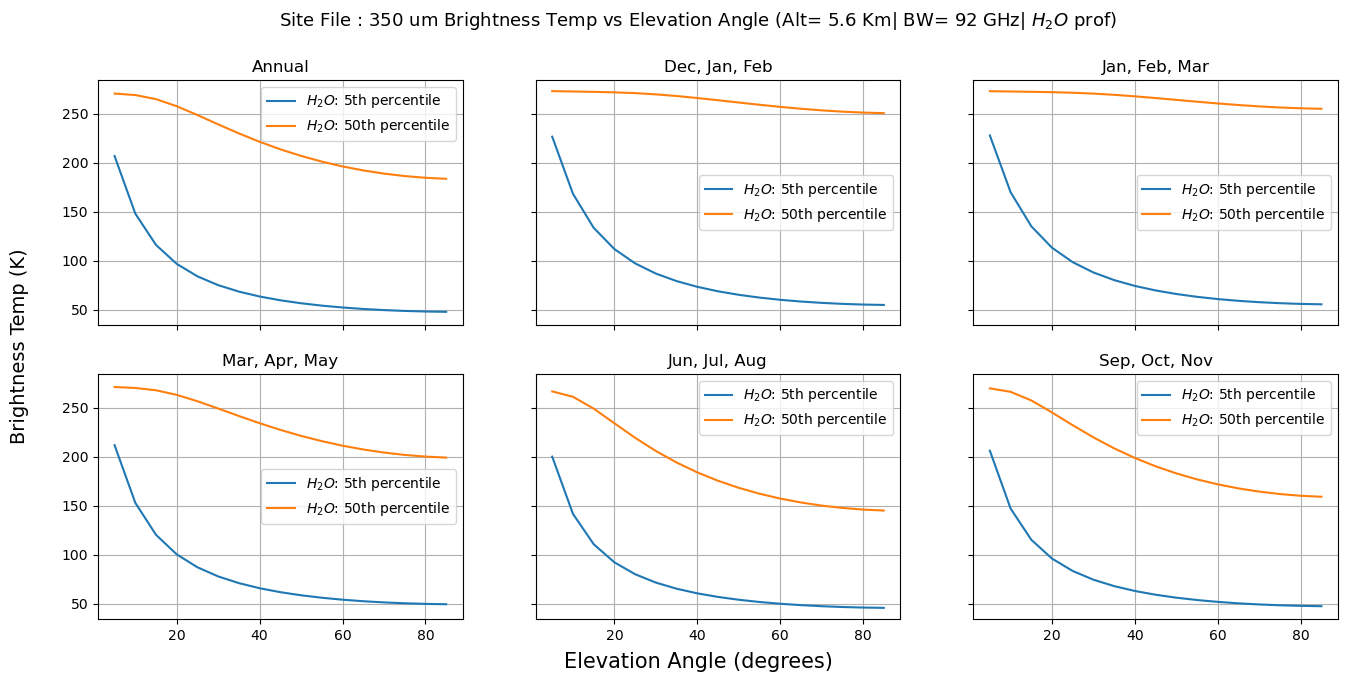

In [143]:
fig, axs = plt.subplots(2,3,sharex=True,sharey=True,figsize=(16,7))
fig.suptitle("Site File : 350 um Brightness Temp vs Elevation Angle (Alt= 5.6 Km| BW= 92 GHz| $H_2O$ prof)",size=13)

axs[0][0].set_title("Annual")
axs[0][0].plot(ea_CCAT_annual_5_skydip_h20 ,tb_CCAT_annual_5_skydip_h20 ,label ="$H_2O$: 5th percentile")
axs[0][0].plot(ea_CCAT_annual_50_skydip_h20 ,tb_CCAT_annual_50_skydip_h20 ,label ="$H_2O$: 50th percentile")
#axs[0][0].plot(ea_CCAT_annual_95_skydip_h20 ,tb_CCAT_annual_95_skydip_h20 ,label ="$H_2O$: 95th percentile")
axs[0][0].legend()

axs[0][1].set_title("Dec, Jan, Feb")
axs[0][1].plot(ea_CCAT_DJF_5_skydip_h20 ,tb_CCAT_DJF_5_skydip_h20 ,label ="$H_2O$: 5th percentile")
axs[0][1].plot(ea_CCAT_DJF_50_skydip_h20 ,tb_CCAT_DJF_50_skydip_h20 ,label ="$H_2O$: 50th percentile")
#axs[0][1].plot(ea_CCAT_DJF_95_skydip_h20 ,tb_CCAT_DJF_95_skydip_h20 ,label ="$H_2O$: 95th percentile")
axs[0][1].legend()

axs[0][2].set_title("Jan, Feb, Mar")
axs[0][2].plot(ea_CCAT_JFM_5_skydip_h20 ,tb_CCAT_JFM_5_skydip_h20 ,label ="$H_2O$: 5th percentile")
axs[0][2].plot(ea_CCAT_JFM_50_skydip_h20 ,tb_CCAT_JFM_50_skydip_h20 ,label ="$H_2O$: 50th percentile")
#axs[0][2].plot(ea_CCAT_JFM_95_skydip_h20 ,tb_CCAT_JFM_95_skydip_h20 ,label ="$H_2O$: 95th percentile")
axs[0][2].legend()

axs[1][0].set_title("Mar, Apr, May")
axs[1][0].plot(ea_CCAT_MAM_5_skydip_h20 ,tb_CCAT_MAM_5_skydip_h20 ,label ="$H_2O$: 5th percentile")
axs[1][0].plot(ea_CCAT_MAM_50_skydip_h20 ,tb_CCAT_MAM_50_skydip_h20 ,label ="$H_2O$: 50th percentile")
#axs[1][0].plot(ea_CCAT_MAM_95_skydip_h20 ,tb_CCAT_MAM_95_skydip_h20 ,label ="$H_2O$: 95th percentile")
axs[1][0].legend()

axs[1][1].set_title("Jun, Jul, Aug")
axs[1][1].plot(ea_CCAT_JJA_5_skydip_h20 ,tb_CCAT_JJA_5_skydip_h20 ,label ="$H_2O$: 5th percentile")
axs[1][1].plot(ea_CCAT_JJA_50_skydip_h20 ,tb_CCAT_JJA_50_skydip_h20 ,label ="$H_2O$: 50th percentile")
#axs[1][1].plot(ea_CCAT_JJA_95_skydip_h20 ,tb_CCAT_JJA_95_skydip_h20 ,label ="$H_2O$: 95th percentile")
axs[1][1].legend()

axs[1][2].set_title("Sep, Oct, Nov")
axs[1][2].plot(ea_CCAT_SON_5_skydip_h20 ,tb_CCAT_SON_5_skydip_h20 ,label ="$H_2O$: 5th percentile")
axs[1][2].plot(ea_CCAT_SON_50_skydip_h20 ,tb_CCAT_SON_50_skydip_h20 ,label ="$H_2O$: 50th percentile")
#axs[1][2].plot(ea_CCAT_SON_95_skydip_h20 ,tb_CCAT_SON_95_skydip_h20 ,label ="$H_2O$: 95th percentile")
axs[1][2].legend()

# plt.xlabel("Elevation Angle (dgrees)",size=12)
# plt.ylabel("Loading tber (pW) ",size=12)

fig.text(0.5, 0.04, 'Elevation Angle (degrees)', ha='center',size=15)
fig.text(0.07, 0.5, 'Brightness Temp (K)', va='center', rotation='vertical',size=14)


plt.savefig("v1_outputs/Site File : 350 um Brightness Temp vs Elevation Angle (Alt= 5.6 Km| BW= 92 GHz| $H_2O$ prof )_V1.jpg",dpi="figure")

plt.show()

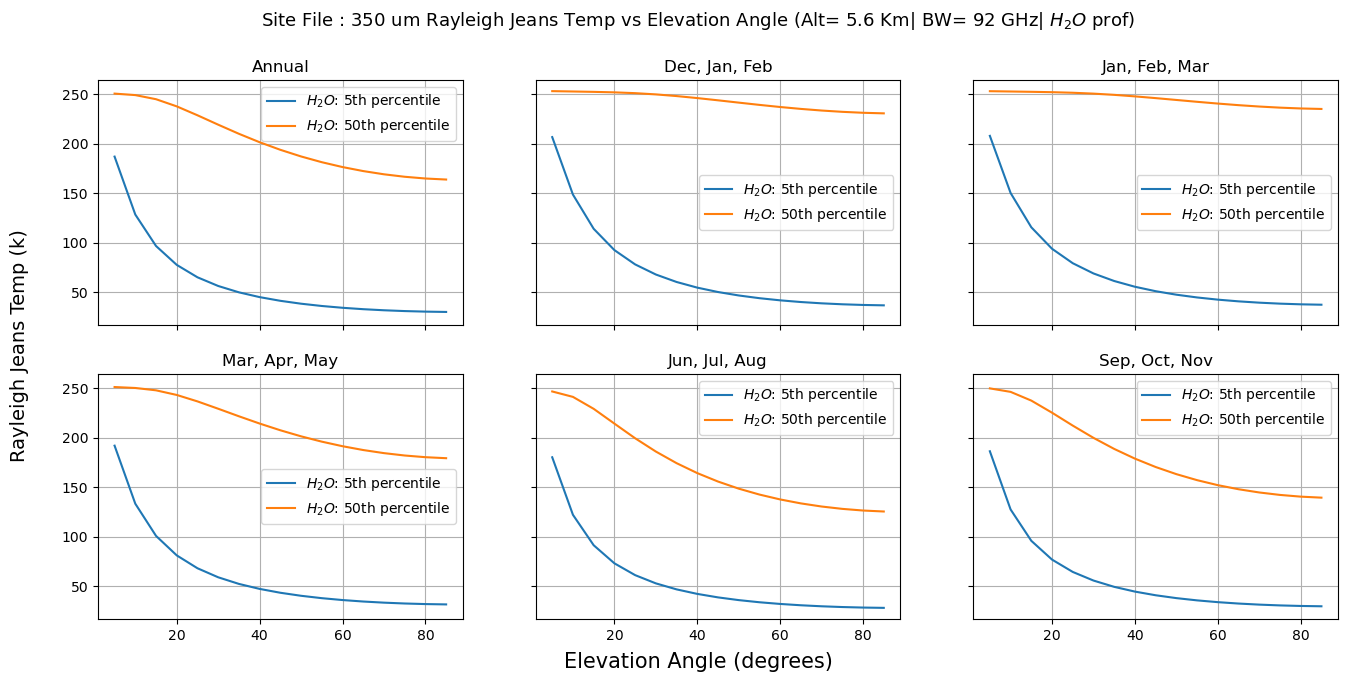

In [144]:
fig, axs = plt.subplots(2,3,sharex=True,sharey=True,figsize=(16,7))
fig.suptitle("Site File : 350 um Rayleigh Jeans Temp vs Elevation Angle (Alt= 5.6 Km| BW= 92 GHz| $H_2O$ prof)",size=13)

axs[0][0].set_title("Annual") 
axs[0][0].plot(ea_CCAT_annual_5_skydip_h20 ,trj_CCAT_annual_5_skydip_h20 ,label ="$H_2O$: 5th percentile")
axs[0][0].plot(ea_CCAT_annual_50_skydip_h20 ,trj_CCAT_annual_50_skydip_h20 ,label ="$H_2O$: 50th percentile")
#axs[0][0].plot(ea_CCAT_annual_95_skydip_h20 ,trj_CCAT_annual_95_skydip_h20 ,label ="$H_2O$: 95th percentile")
axs[0][0].legend()

axs[0][1].set_title("Dec, Jan, Feb")
axs[0][1].plot(ea_CCAT_DJF_5_skydip_h20 ,trj_CCAT_DJF_5_skydip_h20 ,label ="$H_2O$: 5th percentile")
axs[0][1].plot(ea_CCAT_DJF_50_skydip_h20 ,trj_CCAT_DJF_50_skydip_h20 ,label ="$H_2O$: 50th percentile")
#axs[0][1].plot(ea_CCAT_DJF_95_skydip_h20 ,trj_CCAT_DJF_95_skydip_h20 ,label ="$H_2O$: 95th percentile")
axs[0][1].legend()

axs[0][2].set_title("Jan, Feb, Mar")
axs[0][2].plot(ea_CCAT_JFM_5_skydip_h20 ,trj_CCAT_JFM_5_skydip_h20 ,label ="$H_2O$: 5th percentile")
axs[0][2].plot(ea_CCAT_JFM_50_skydip_h20 ,trj_CCAT_JFM_50_skydip_h20 ,label ="$H_2O$: 50th percentile")
#axs[0][2].plot(ea_CCAT_JFM_95_skydip_h20 ,trj_CCAT_JFM_95_skydip_h20 ,label ="$H_2O$: 95th percentile")
axs[0][2].legend()

axs[1][0].set_title("Mar, Apr, May")
axs[1][0].plot(ea_CCAT_MAM_5_skydip_h20 ,trj_CCAT_MAM_5_skydip_h20 ,label ="$H_2O$: 5th percentile")
axs[1][0].plot(ea_CCAT_MAM_50_skydip_h20 ,trj_CCAT_MAM_50_skydip_h20 ,label ="$H_2O$: 50th percentile")
#axs[1][0].plot(ea_CCAT_MAM_95_skydip_h20 ,trj_CCAT_MAM_95_skydip_h20 ,label ="$H_2O$: 95th percentile")
axs[1][0].legend()

axs[1][1].set_title("Jun, Jul, Aug")
axs[1][1].plot(ea_CCAT_JJA_5_skydip_h20 ,trj_CCAT_JJA_5_skydip_h20 ,label ="$H_2O$: 5th percentile")
axs[1][1].plot(ea_CCAT_JJA_50_skydip_h20 ,trj_CCAT_JJA_50_skydip_h20 ,label ="$H_2O$: 50th percentile")
#axs[1][1].plot(ea_CCAT_JJA_95_skydip_h20 ,trj_CCAT_JJA_95_skydip_h20 ,label ="$H_2O$: 95th percentile")
axs[1][1].legend()

axs[1][2].set_title("Sep, Oct, Nov")
axs[1][2].plot(ea_CCAT_SON_5_skydip_h20 ,trj_CCAT_SON_5_skydip_h20 ,label ="$H_2O$: 5th percentile")
axs[1][2].plot(ea_CCAT_SON_50_skydip_h20 ,trj_CCAT_SON_50_skydip_h20 ,label ="$H_2O$: 50th percentile")
#axs[1][2].plot(ea_CCAT_SON_95_skydip_h20 ,trj_CCAT_SON_95_skydip_h20 ,label ="$H_2O$: 95th percentile")
axs[1][2].legend()

# plt.xlabel("Elevation Angle (dgrees)",size=12)
# plt.ylabel("Loading trjer (pW) ",size=12)

fig.text(0.5, 0.04, 'Elevation Angle (degrees)', ha='center',size=15)
fig.text(0.07, 0.5, 'Rayleigh Jeans Temp (k)', va='center', rotation='vertical',size=14)


plt.savefig("v1_outputs/Site File : 350 um Rayleigh Jeans Temp vs Elevation Angle (Alt= 5.6 Km| BW= 92 GHz| $H_2O$ prof)_V1.jpg",dpi="figure")

plt.show()

In [145]:
# power loading at the detectors in W

#-------------------------------------------------------------------------------------------ANNUAL-----------------------------------------------------------

pow_CCAT_annual_5_skydip_h20 = eff * np.array(trj_CCAT_annual_5_skydip_h20) * k * bw 
pow_CCAT_annual_50_skydip_h20 = eff * np.array(trj_CCAT_annual_50_skydip_h20) * k * bw 
pow_CCAT_annual_95_skydip_h20 = eff * np.array(trj_CCAT_annual_95_skydip_h20) * k * bw 

#------------------------------------------------------------------------------------------DJF----------------------------------------------------------------
pow_CCAT_DJF_5_skydip_h20 = eff * np.array(trj_CCAT_DJF_5_skydip_h20) * k * bw 
pow_CCAT_DJF_50_skydip_h20 = eff * np.array(trj_CCAT_DJF_50_skydip_h20) * k * bw 
pow_CCAT_DJF_95_skydip_h20 = eff * np.array(trj_CCAT_DJF_95_skydip_h20) * k * bw 

#------------------------------------------------------------------------------------------JFM----------------------------------------------------------------
pow_CCAT_JFM_5_skydip_h20 = eff * np.array(trj_CCAT_JFM_5_skydip_h20) * k * bw 
pow_CCAT_JFM_50_skydip_h20 = eff * np.array(trj_CCAT_JFM_50_skydip_h20) * k * bw 
pow_CCAT_JFM_95_skydip_h20 = eff * np.array(trj_CCAT_JFM_95_skydip_h20) * k * bw 

#------------------------------------------------------------------------------------------MAM----------------------------------------------------------------
pow_CCAT_MAM_5_skydip_h20 = eff * np.array(trj_CCAT_MAM_5_skydip_h20) * k * bw 
pow_CCAT_MAM_50_skydip_h20 = eff * np.array(trj_CCAT_MAM_50_skydip_h20) * k * bw 
pow_CCAT_MAM_95_skydip_h20 = eff * np.array(trj_CCAT_MAM_95_skydip_h20) * k * bw 

#------------------------------------------------------------------------------------------JJA----------------------------------------------------------------
pow_CCAT_JJA_5_skydip_h20 = eff * np.array(trj_CCAT_JJA_5_skydip_h20) * k * bw 
pow_CCAT_JJA_50_skydip_h20 = eff * np.array(trj_CCAT_JJA_50_skydip_h20) * k * bw 
pow_CCAT_JJA_95_skydip_h20 = eff * np.array(trj_CCAT_JJA_95_skydip_h20) * k * bw 

#------------------------------------------------------------------------------------------SON----------------------------------------------------------------
pow_CCAT_SON_5_skydip_h20 = eff * np.array(trj_CCAT_SON_5_skydip_h20) * k * bw 
pow_CCAT_SON_50_skydip_h20 = eff * np.array(trj_CCAT_SON_50_skydip_h20) * k * bw 
pow_CCAT_SON_95_skydip_h20 = eff * np.array(trj_CCAT_SON_95_skydip_h20) * k * bw 

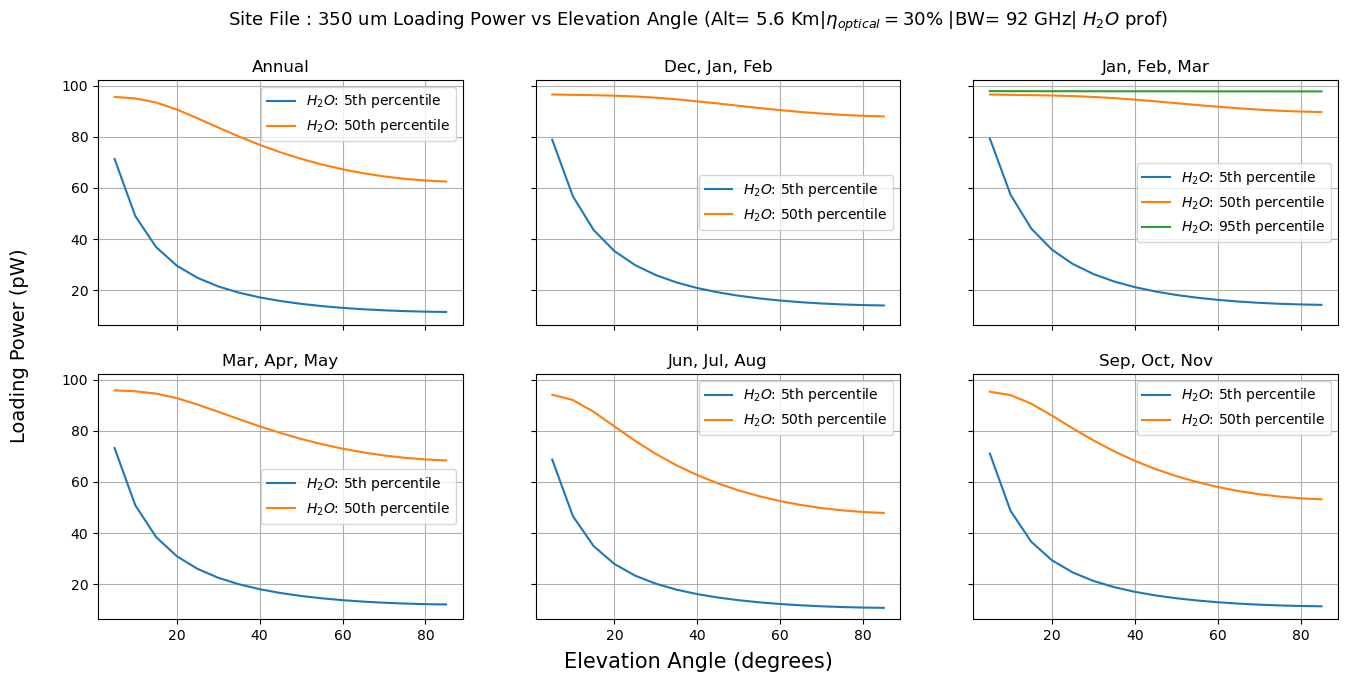

In [146]:
fig, axs = plt.subplots(2,3,sharex=True,sharey=True,figsize=(16,7))

fig.suptitle("Site File : 350 um Loading Power vs Elevation Angle (Alt= 5.6 Km|$\eta_{optical}=30\% $ |BW= 92 GHz| $H_2O$ prof)",size=13)

axs[0][0].set_title("Annual") 
axs[0][0].plot(ea_CCAT_annual_5_skydip_h20 ,pow_CCAT_annual_5_skydip_h20*1e12,label ="$H_2O$: 5th percentile")
axs[0][0].plot(ea_CCAT_annual_50_skydip_h20 ,pow_CCAT_annual_50_skydip_h20*1e12,label ="$H_2O$: 50th percentile")
#axs[0][0].plot(ea_CCAT_annual_95_skydip_h20 ,pow_CCAT_annual_95_skydip_h20*1e12,label ="$H_2O$: 95th percentile")
axs[0][0].legend()

axs[0][1].set_title("Dec, Jan, Feb")
axs[0][1].plot(ea_CCAT_DJF_5_skydip_h20 ,pow_CCAT_DJF_5_skydip_h20*1e12,label ="$H_2O$: 5th percentile")
axs[0][1].plot(ea_CCAT_DJF_50_skydip_h20 ,pow_CCAT_DJF_50_skydip_h20*1e12,label ="$H_2O$: 50th percentile")
#axs[0][1].plot(ea_CCAT_DJF_95_skydip_h20 ,pow_CCAT_DJF_95_skydip_h20*1e12,label ="$H_2O$: 95th percentile")
axs[0][1].legend()

axs[0][2].set_title("Jan, Feb, Mar")
axs[0][2].plot(ea_CCAT_JFM_5_skydip_h20 ,pow_CCAT_JFM_5_skydip_h20*1e12,label ="$H_2O$: 5th percentile")
axs[0][2].plot(ea_CCAT_JFM_50_skydip_h20 ,pow_CCAT_JFM_50_skydip_h20*1e12,label ="$H_2O$: 50th percentile")
axs[0][2].plot(ea_CCAT_JFM_95_skydip_h20 ,pow_CCAT_JFM_95_skydip_h20*1e12,label ="$H_2O$: 95th percentile")
axs[0][2].legend()

axs[1][0].set_title("Mar, Apr, May")
axs[1][0].plot(ea_CCAT_MAM_5_skydip_h20 ,pow_CCAT_MAM_5_skydip_h20*1e12,label ="$H_2O$: 5th percentile")
axs[1][0].plot(ea_CCAT_MAM_50_skydip_h20 ,pow_CCAT_MAM_50_skydip_h20*1e12,label ="$H_2O$: 50th percentile")
#axs[1][0].plot(ea_CCAT_MAM_95_skydip_h20 ,pow_CCAT_MAM_95_skydip_h20*1e12,label ="$H_2O$: 95th percentile")
axs[1][0].legend()

axs[1][1].set_title("Jun, Jul, Aug")
axs[1][1].plot(ea_CCAT_JJA_5_skydip_h20 ,pow_CCAT_JJA_5_skydip_h20*1e12,label ="$H_2O$: 5th percentile")
axs[1][1].plot(ea_CCAT_JJA_50_skydip_h20 ,pow_CCAT_JJA_50_skydip_h20*1e12,label ="$H_2O$: 50th percentile")
#axs[1][1].plot(ea_CCAT_JJA_95_skydip_h20 ,pow_CCAT_JJA_95_skydip_h20*1e12,label ="$H_2O$: 95th percentile")
axs[1][1].legend()

axs[1][2].set_title("Sep, Oct, Nov")
axs[1][2].plot(ea_CCAT_SON_5_skydip_h20 ,pow_CCAT_SON_5_skydip_h20*1e12,label ="$H_2O$: 5th percentile")
axs[1][2].plot(ea_CCAT_SON_50_skydip_h20 ,pow_CCAT_SON_50_skydip_h20*1e12,label ="$H_2O$: 50th percentile")
#axs[1][2].plot(ea_CCAT_SON_95_skydip_h20 ,pow_CCAT_SON_95_skydip_h20*1e12,label ="$H_2O$: 95th percentile")
axs[1][2].legend()

# plt.xlabel("Elevation Angle (dgrees)",size=12)
# plt.ylabel("Loading power (pW) ",size=12)

fig.text(0.5, 0.04, 'Elevation Angle (degrees)', ha='center',size=15)
fig.text(0.07, 0.5, 'Loading Power (pW)', va='center', rotation='vertical',size=14)


plt.savefig("v1_outputs/Site File : 350 um Loading Power vs Elevation Angle (Alt= 5.6 Km| BW= 92 GHz| $H_2O$ prof)_V1.jpg",dpi="figure")

plt.show()

In [147]:
pow_CCAT_annual_5_skydip_h20

array([1.15597800e-11, 1.16842826e-11, 1.18967407e-11, 1.22050498e-11,
       1.26212551e-11, 1.31627747e-11, 1.38543163e-11, 1.47309371e-11,
       1.58430090e-11, 1.72645942e-11, 1.91081309e-11, 2.15517329e-11,
       2.48935310e-11, 2.96695273e-11, 3.69372148e-11, 4.90351305e-11,
       7.13302973e-11])

#### Actual Frequency Shift ~ Responsivity * Resonant Frequency * change in power (for 5 deg skydip)

In [148]:
# difference in the frequency shifts at each elevation angle

# ----------------------------------------------------------------------------------------ANNUAL--------------------------------------------------------------

del_pow_CCAT_annual_5_skydip_h20 = np.diff(pow_CCAT_annual_5_skydip_h20)
del_pow_CCAT_annual_50_skydip_h20 = np.diff(pow_CCAT_annual_50_skydip_h20)
del_pow_CCAT_annual_95_skydip_h20 = np.diff(pow_CCAT_annual_95_skydip_h20)

# ----------------------------------------------------------------------------------------DJF--------------------------------------------------------------

del_pow_CCAT_DJF_5_skydip_h20 = np.diff(pow_CCAT_DJF_5_skydip_h20)
del_pow_CCAT_DJF_50_skydip_h20 = np.diff(pow_CCAT_DJF_50_skydip_h20)
del_pow_CCAT_DJF_95_skydip_h20 = np.diff(pow_CCAT_DJF_95_skydip_h20)

# ----------------------------------------------------------------------------------------JFM--------------------------------------------------------------

del_pow_CCAT_JFM_5_skydip_h20 = np.diff(pow_CCAT_JFM_5_skydip_h20)
del_pow_CCAT_JFM_50_skydip_h20 = np.diff(pow_CCAT_JFM_50_skydip_h20)
del_pow_CCAT_JFM_95_skydip_h20 = np.diff(pow_CCAT_JFM_95_skydip_h20)

# ----------------------------------------------------------------------------------------MAM--------------------------------------------------------------

del_pow_CCAT_MAM_5_skydip_h20 = np.diff(pow_CCAT_MAM_5_skydip_h20)
del_pow_CCAT_MAM_50_skydip_h20 = np.diff(pow_CCAT_MAM_50_skydip_h20)
del_pow_CCAT_MAM_95_skydip_h20 = np.diff(pow_CCAT_MAM_95_skydip_h20)

# ----------------------------------------------------------------------------------------JJA--------------------------------------------------------------

del_pow_CCAT_JJA_5_skydip_h20 = np.diff(pow_CCAT_JJA_5_skydip_h20)
del_pow_CCAT_JJA_50_skydip_h20 = np.diff(pow_CCAT_JJA_50_skydip_h20)
del_pow_CCAT_JJA_95_skydip_h20 = np.diff(pow_CCAT_JJA_95_skydip_h20)

# ----------------------------------------------------------------------------------------SON--------------------------------------------------------------

del_pow_CCAT_SON_5_skydip_h20 = np.diff(pow_CCAT_SON_5_skydip_h20)
del_pow_CCAT_SON_50_skydip_h20 = np.diff(pow_CCAT_SON_50_skydip_h20)
del_pow_CCAT_SON_95_skydip_h20 = np.diff(pow_CCAT_SON_95_skydip_h20)

In [149]:
# calculating the actual frequency shifts

act_freq_shift_CCAT_annual_5_skydip_h20 = np.abs(respon[0:16] * fres *del_pow_CCAT_annual_5_skydip_h20 )
act_freq_shift_CCAT_annual_50_skydip_h20 = np.abs(respon[0:16] * fres *del_pow_CCAT_annual_50_skydip_h20 )
act_freq_shift_CCAT_annual_95_skydip_h20 = np.abs(respon[0:16] * fres *del_pow_CCAT_annual_95_skydip_h20 )

act_freq_shift_CCAT_DJF_5_skydip_h20 = np.abs(respon[0:16] * fres *del_pow_CCAT_DJF_5_skydip_h20 )
act_freq_shift_CCAT_DJF_50_skydip_h20 = np.abs(respon[0:16] * fres *del_pow_CCAT_DJF_50_skydip_h20 )
act_freq_shift_CCAT_DJF_95_skydip_h20 = np.abs(respon[0:16] * fres *del_pow_CCAT_DJF_95_skydip_h20 )

act_freq_shift_CCAT_JFM_5_skydip_h20 = np.abs(respon[0:16] * fres *del_pow_CCAT_JFM_5_skydip_h20 )
act_freq_shift_CCAT_JFM_50_skydip_h20 = np.abs(respon[0:16] * fres *del_pow_CCAT_JFM_50_skydip_h20 )
act_freq_shift_CCAT_JFM_95_skydip_h20 = np.abs(respon[0:16] * fres *del_pow_CCAT_JFM_95_skydip_h20 )

act_freq_shift_CCAT_MAM_5_skydip_h20 = np.abs(respon[0:16] * fres *del_pow_CCAT_MAM_5_skydip_h20 )
act_freq_shift_CCAT_MAM_50_skydip_h20 = np.abs(respon[0:16] * fres *del_pow_CCAT_MAM_50_skydip_h20 )
act_freq_shift_CCAT_MAM_95_skydip_h20 = np.abs(respon[0:16] * fres *del_pow_CCAT_MAM_95_skydip_h20 )

act_freq_shift_CCAT_JJA_5_skydip_h20 = np.abs(respon[0:16] * fres *del_pow_CCAT_JJA_5_skydip_h20 )
act_freq_shift_CCAT_JJA_50_skydip_h20 = np.abs(respon[0:16] * fres *del_pow_CCAT_JJA_50_skydip_h20 )
act_freq_shift_CCAT_JJA_95_skydip_h20 = np.abs(respon[0:16] * fres *del_pow_CCAT_JJA_95_skydip_h20 )

act_freq_shift_CCAT_SON_5_skydip_h20 = np.abs(respon[0:16] * fres *del_pow_CCAT_SON_5_skydip_h20 )
act_freq_shift_CCAT_SON_50_skydip_h20 = np.abs(respon[0:16] * fres *del_pow_CCAT_SON_50_skydip_h20 )
act_freq_shift_CCAT_SON_95_skydip_h20 = np.abs(respon[0:16] * fres *del_pow_CCAT_SON_95_skydip_h20 )

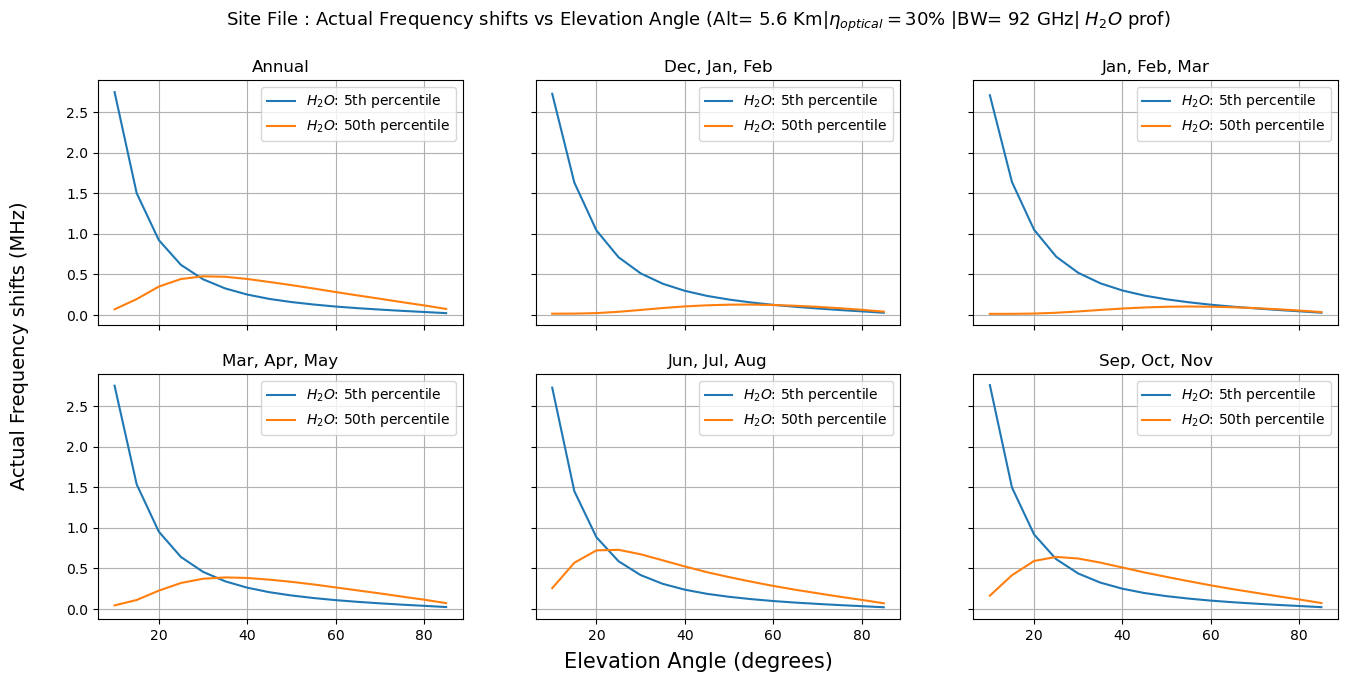

In [150]:
fig, axs = plt.subplots(2,3,sharex=True,sharey=True,figsize=(16,7))

fig.suptitle("Site File : Actual Frequency shifts vs Elevation Angle (Alt= 5.6 Km|$\eta_{optical}=30\% $ |BW= 92 GHz| $H_2O$ prof)",size=13)

axs[0][0].set_title("Annual") 
axs[0][0].plot(ea_CCAT_annual_5_skydip_h20[0:16] ,act_freq_shift_CCAT_annual_5_skydip_h20*1e-6,label ="$H_2O$: 5th percentile")
axs[0][0].plot(ea_CCAT_annual_50_skydip_h20[0:16] ,act_freq_shift_CCAT_annual_50_skydip_h20*1e-6,label ="$H_2O$: 50th percentile")
#axs[0][0].plot(ea_CCAT_annual_95_skydip_h20[0:16] ,act_freq_shift_CCAT_annual_95_skydip_h20*1e-6,label ="$H_2O$: 95th percentile")
axs[0][0].legend()

axs[0][1].set_title("Dec, Jan, Feb")
axs[0][1].plot(ea_CCAT_DJF_5_skydip_h20[0:16] ,act_freq_shift_CCAT_DJF_5_skydip_h20*1e-6,label ="$H_2O$: 5th percentile")
axs[0][1].plot(ea_CCAT_DJF_50_skydip_h20[0:16] ,act_freq_shift_CCAT_DJF_50_skydip_h20*1e-6,label ="$H_2O$: 50th percentile")
#axs[0][1].plot(ea_CCAT_DJF_95_skydip_h20[0:16] ,act_freq_shift_CCAT_DJF_95_skydip_h20*1e-6,label ="$H_2O$: 95th percentile")
axs[0][1].legend()

axs[0][2].set_title("Jan, Feb, Mar")
axs[0][2].plot(ea_CCAT_JFM_5_skydip_h20[0:16] ,act_freq_shift_CCAT_JFM_5_skydip_h20*1e-6,label ="$H_2O$: 5th percentile")
axs[0][2].plot(ea_CCAT_JFM_50_skydip_h20[0:16] ,act_freq_shift_CCAT_JFM_50_skydip_h20*1e-6,label ="$H_2O$: 50th percentile")
#axs[0][2].plot(ea_CCAT_JFM_95_skydip_h20[0:16] ,act_freq_shift_CCAT_JFM_95_skydip_h20*1e-6,label ="$H_2O$: 95th percentile")
axs[0][2].legend()

axs[1][0].set_title("Mar, Apr, May")
axs[1][0].plot(ea_CCAT_MAM_5_skydip_h20[0:16] ,act_freq_shift_CCAT_MAM_5_skydip_h20*1e-6,label ="$H_2O$: 5th percentile")
axs[1][0].plot(ea_CCAT_MAM_50_skydip_h20[0:16] ,act_freq_shift_CCAT_MAM_50_skydip_h20*1e-6,label ="$H_2O$: 50th percentile")
#axs[1][0].plot(ea_CCAT_MAM_95_skydip_h20[0:16] ,act_freq_shift_CCAT_MAM_95_skydip_h20*1e-6,label ="$H_2O$: 95th percentile")
axs[1][0].legend()

axs[1][1].set_title("Jun, Jul, Aug")
axs[1][1].plot(ea_CCAT_JJA_5_skydip_h20[0:16] ,act_freq_shift_CCAT_JJA_5_skydip_h20*1e-6,label ="$H_2O$: 5th percentile")
axs[1][1].plot(ea_CCAT_JJA_50_skydip_h20[0:16] ,act_freq_shift_CCAT_JJA_50_skydip_h20*1e-6,label ="$H_2O$: 50th percentile")
#axs[1][1].plot(ea_CCAT_JJA_95_skydip_h20[0:16] ,act_freq_shift_CCAT_JJA_95_skydip_h20*1e-6,label ="$H_2O$: 95th percentile")
axs[1][1].legend()

axs[1][2].set_title("Sep, Oct, Nov")
axs[1][2].plot(ea_CCAT_SON_5_skydip_h20[0:16] ,act_freq_shift_CCAT_SON_5_skydip_h20*1e-6,label ="$H_2O$: 5th percentile")
axs[1][2].plot(ea_CCAT_SON_50_skydip_h20[0:16] ,act_freq_shift_CCAT_SON_50_skydip_h20*1e-6,label ="$H_2O$: 50th percentile")
#axs[1][2].plot(ea_CCAT_SON_95_skydip_h20[0:16] ,act_freq_shift_CCAT_SON_95_skydip_h20*1e-6,label ="$H_2O$: 95th percentile")
axs[1][2].legend()

# plt.xlabel("Elevation Angle (dgrees)",size=12)
# plt.ylabel("Loading act_freq_shifter (pW) ",size=12)

fig.text(0.5, 0.04, 'Elevation Angle (degrees)', ha='center',size=15)
fig.text(0.07, 0.5, 'Actual Frequency shifts (MHz)', va='center', rotation='vertical',size=14)


plt.savefig("v1_outputs/Site File : 350 um Loading act_freq_shifter vs Elevation Angle (Alt= 5.6 Km| BW= 92 GHz| $H_2O$ prof)_V1.jpg",dpi="figure")

plt.show()

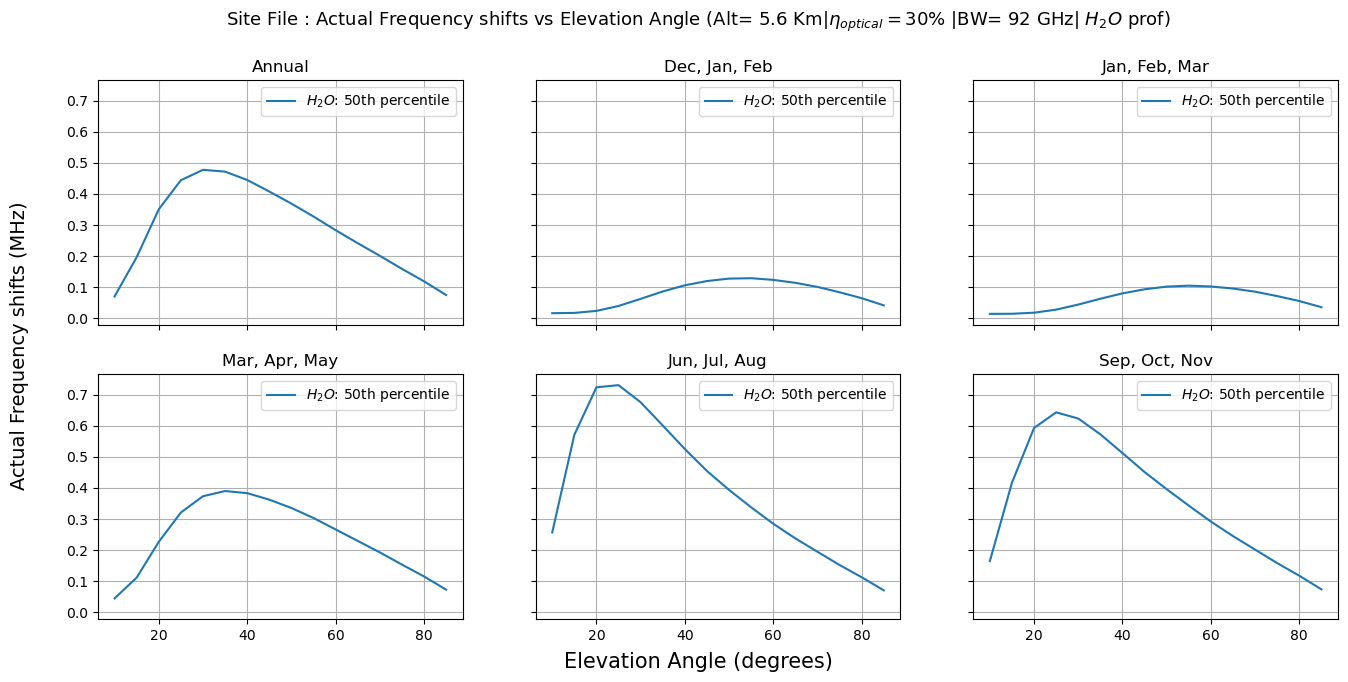

In [151]:
fig, axs = plt.subplots(2,3,sharex=True,sharey=True,figsize=(16,7))

fig.suptitle("Site File : Actual Frequency shifts vs Elevation Angle (Alt= 5.6 Km|$\eta_{optical}=30\% $ |BW= 92 GHz| $H_2O$ prof)",size=13)

axs[0][0].set_title("Annual") 
#axs[0][0].plot(ea_CCAT_annual_5_skydip_h20[0:16] ,act_freq_shift_CCAT_annual_5_skydip_h20*1e-6,label ="$H_2O$: 5th percentile")
axs[0][0].plot(ea_CCAT_annual_50_skydip_h20[0:16] ,act_freq_shift_CCAT_annual_50_skydip_h20*1e-6,label ="$H_2O$: 50th percentile")
#axs[0][0].plot(ea_CCAT_annual_95_skydip_h20[0:16] ,act_freq_shift_CCAT_annual_95_skydip_h20*1e-6,label ="$H_2O$: 95th percentile")
axs[0][0].legend()

axs[0][1].set_title("Dec, Jan, Feb")
#axs[0][1].plot(ea_CCAT_DJF_5_skydip_h20[0:16] ,act_freq_shift_CCAT_DJF_5_skydip_h20*1e-6,label ="$H_2O$: 5th percentile")
axs[0][1].plot(ea_CCAT_DJF_50_skydip_h20[0:16] ,act_freq_shift_CCAT_DJF_50_skydip_h20*1e-6,label ="$H_2O$: 50th percentile")
#axs[0][1].plot(ea_CCAT_DJF_95_skydip_h20[0:16] ,act_freq_shift_CCAT_DJF_95_skydip_h20*1e-6,label ="$H_2O$: 95th percentile")
axs[0][1].legend()

axs[0][2].set_title("Jan, Feb, Mar")
#axs[0][2].plot(ea_CCAT_JFM_5_skydip_h20[0:16] ,act_freq_shift_CCAT_JFM_5_skydip_h20*1e-6,label ="$H_2O$: 5th percentile")
axs[0][2].plot(ea_CCAT_JFM_50_skydip_h20[0:16] ,act_freq_shift_CCAT_JFM_50_skydip_h20*1e-6,label ="$H_2O$: 50th percentile")
#axs[0][2].plot(ea_CCAT_JFM_95_skydip_h20[0:16] ,act_freq_shift_CCAT_JFM_95_skydip_h20*1e-6,label ="$H_2O$: 95th percentile")
axs[0][2].legend()

axs[1][0].set_title("Mar, Apr, May")
#axs[1][0].plot(ea_CCAT_MAM_5_skydip_h20[0:16] ,act_freq_shift_CCAT_MAM_5_skydip_h20*1e-6,label ="$H_2O$: 5th percentile")
axs[1][0].plot(ea_CCAT_MAM_50_skydip_h20[0:16] ,act_freq_shift_CCAT_MAM_50_skydip_h20*1e-6,label ="$H_2O$: 50th percentile")
#axs[1][0].plot(ea_CCAT_MAM_95_skydip_h20[0:16] ,act_freq_shift_CCAT_MAM_95_skydip_h20*1e-6,label ="$H_2O$: 95th percentile")
axs[1][0].legend()

axs[1][1].set_title("Jun, Jul, Aug")
#axs[1][1].plot(ea_CCAT_JJA_5_skydip_h20[0:16] ,act_freq_shift_CCAT_JJA_5_skydip_h20*1e-6,label ="$H_2O$: 5th percentile")
axs[1][1].plot(ea_CCAT_JJA_50_skydip_h20[0:16] ,act_freq_shift_CCAT_JJA_50_skydip_h20*1e-6,label ="$H_2O$: 50th percentile")
#axs[1][1].plot(ea_CCAT_JJA_95_skydip_h20[0:16] ,act_freq_shift_CCAT_JJA_95_skydip_h20*1e-6,label ="$H_2O$: 95th percentile")
axs[1][1].legend()

axs[1][2].set_title("Sep, Oct, Nov")
#axs[1][2].plot(ea_CCAT_SON_5_skydip_h20[0:16] ,act_freq_shift_CCAT_SON_5_skydip_h20*1e-6,label ="$H_2O$: 5th percentile")
axs[1][2].plot(ea_CCAT_SON_50_skydip_h20[0:16] ,act_freq_shift_CCAT_SON_50_skydip_h20*1e-6,label ="$H_2O$: 50th percentile")
#axs[1][2].plot(ea_CCAT_SON_95_skydip_h20[0:16] ,act_freq_shift_CCAT_SON_95_skydip_h20*1e-6,label ="$H_2O$: 95th percentile")
axs[1][2].legend()

# plt.xlabel("Elevation Angle (dgrees)",size=12)
# plt.ylabel("Loading act_freq_shifter (pW) ",size=12)

fig.text(0.5, 0.04, 'Elevation Angle (degrees)', ha='center',size=15)
fig.text(0.07, 0.5, 'Actual Frequency shifts (MHz)', va='center', rotation='vertical',size=14)


plt.savefig("v1_outputs/Site File 50th : 350 um Loading act_freq_shifter vs Elevation Angle (Alt= 5.6 Km| BW= 92 GHz| $H_2O$ prof)_V1.jpg",dpi="figure")

plt.show()

In [ ]:
ea_CCAT_MAM_50_skydip_h20[0:16] ,act_freq_shift_CCAT_MAM_50_skydip_h20

In [152]:
# ---------------------------------------------------------------------------deg shift gradient -----------------------------------------------------------------------------

deg_shifts_CCAT_annual_5_skydip_h20 = (2200*5)/act_freq_shift_CCAT_annual_5_skydip_h20  # this amount of deg shift for a change in 2.2 KHz or 1/10 the line width of 22000 Hz
deg_shifts_CCAT_annual_50_skydip_h20 = (2200*5)/act_freq_shift_CCAT_annual_50_skydip_h20
deg_shifts_CCAT_annual_95_skydip_h20 = (2200*5)/act_freq_shift_CCAT_annual_95_skydip_h20

deg_shifts_CCAT_DJF_5_skydip_h20 = (2200*5)/act_freq_shift_CCAT_DJF_5_skydip_h20  # this amount of deg shift for a change in 2.2 KHz or 1/10 the line width of 22000 Hz
deg_shifts_CCAT_DJF_50_skydip_h20 = (2200*5)/act_freq_shift_CCAT_DJF_50_skydip_h20
deg_shifts_CCAT_DJF_95_skydip_h20 = (2200*5)/act_freq_shift_CCAT_DJF_95_skydip_h20

deg_shifts_CCAT_JFM_5_skydip_h20 = (2200*5)/act_freq_shift_CCAT_JFM_5_skydip_h20  # this amount of deg shift for a change in 2.2 KHz or 1/10 the line width of 22000 Hz
deg_shifts_CCAT_JFM_50_skydip_h20 = (2200*5)/act_freq_shift_CCAT_JFM_50_skydip_h20
deg_shifts_CCAT_JFM_95_skydip_h20 = (2200*5)/act_freq_shift_CCAT_JFM_95_skydip_h20

deg_shifts_CCAT_MAM_5_skydip_h20 = (2200*5)/act_freq_shift_CCAT_MAM_5_skydip_h20  # this amount of deg shift for a change in 2.2 KHz or 1/10 the line width of 22000 Hz
deg_shifts_CCAT_MAM_50_skydip_h20 = (2200*5)/act_freq_shift_CCAT_MAM_50_skydip_h20
deg_shifts_CCAT_MAM_95_skydip_h20 = (2200*5)/act_freq_shift_CCAT_MAM_95_skydip_h20

deg_shifts_CCAT_JJA_5_skydip_h20 = (2200*5)/act_freq_shift_CCAT_JJA_5_skydip_h20  # this amount of deg shift for a change in 2.2 KHz or 1/10 the line width of 22000 Hz
deg_shifts_CCAT_JJA_50_skydip_h20 = (2200*5)/act_freq_shift_CCAT_JJA_50_skydip_h20
deg_shifts_CCAT_JJA_95_skydip_h20 = (2200*5)/act_freq_shift_CCAT_JJA_95_skydip_h20

deg_shifts_CCAT_SON_5_skydip_h20 = (2200*5)/act_freq_shift_CCAT_SON_5_skydip_h20  # this amount of deg shift for a change in 2.2 KHz or 1/10 the line width of 22000 Hz
deg_shifts_CCAT_SON_50_skydip_h20 = (2200*5)/act_freq_shift_CCAT_SON_50_skydip_h20
deg_shifts_CCAT_SON_95_skydip_h20 = (2200*5)/act_freq_shift_CCAT_SON_95_skydip_h20

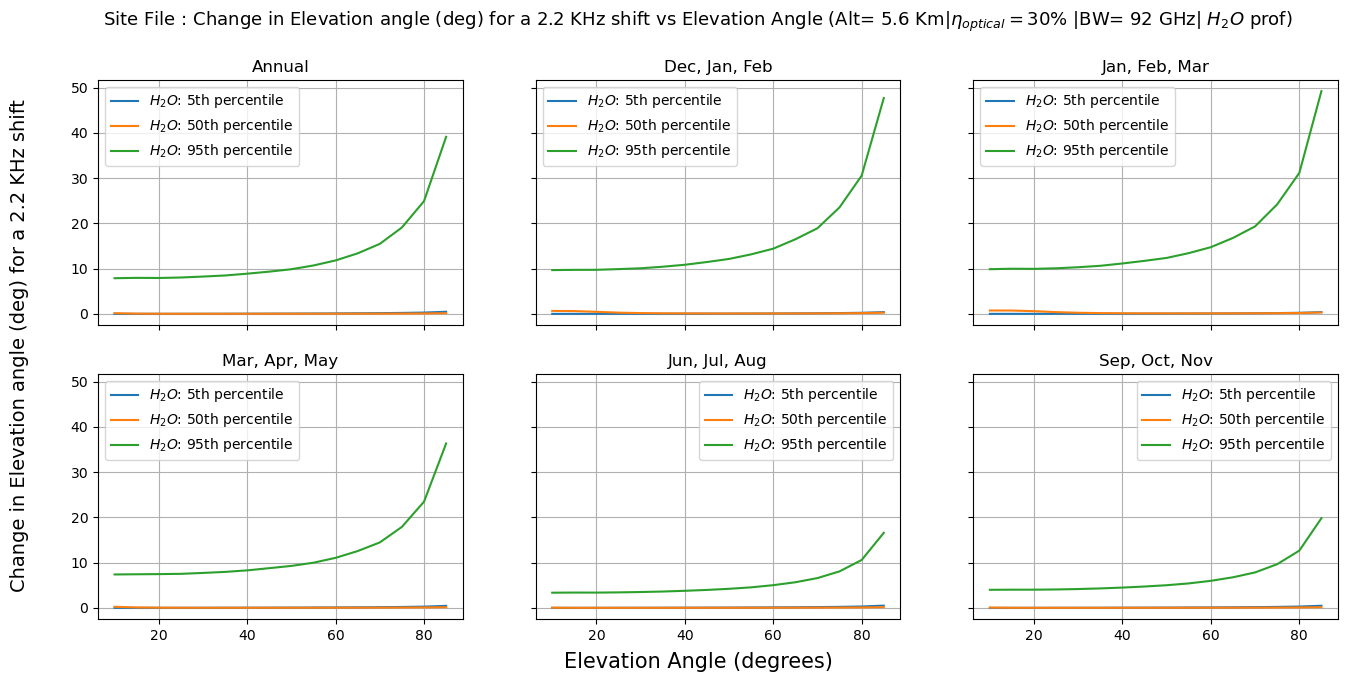

In [153]:
fig, axs = plt.subplots(2,3,sharex=True,sharey=True,figsize=(16,7))

fig.suptitle("Site File : Change in Elevation angle (deg) for a 2.2 KHz shift vs Elevation Angle (Alt= 5.6 Km|$\eta_{optical}=30\% $ |BW= 92 GHz| $H_2O$ prof)",size=13)

axs[0][0].set_title("Annual") 
axs[0][0].plot(ea_CCAT_annual_5_skydip_h20[0:16] ,deg_shifts_CCAT_annual_5_skydip_h20,label ="$H_2O$: 5th percentile")
axs[0][0].plot(ea_CCAT_annual_50_skydip_h20[0:16] ,deg_shifts_CCAT_annual_50_skydip_h20,label ="$H_2O$: 50th percentile")
axs[0][0].plot(ea_CCAT_annual_95_skydip_h20[0:16] ,deg_shifts_CCAT_annual_95_skydip_h20,label ="$H_2O$: 95th percentile")
axs[0][0].legend()

axs[0][1].set_title("Dec, Jan, Feb")
axs[0][1].plot(ea_CCAT_DJF_5_skydip_h20[0:16] ,deg_shifts_CCAT_DJF_5_skydip_h20,label ="$H_2O$: 5th percentile")
axs[0][1].plot(ea_CCAT_DJF_50_skydip_h20[0:16] ,deg_shifts_CCAT_DJF_50_skydip_h20,label ="$H_2O$: 50th percentile")
axs[0][1].plot(ea_CCAT_DJF_95_skydip_h20[0:16] ,deg_shifts_CCAT_DJF_95_skydip_h20,label ="$H_2O$: 95th percentile")
axs[0][1].legend()

axs[0][2].set_title("Jan, Feb, Mar")
axs[0][2].plot(ea_CCAT_JFM_5_skydip_h20[0:16] ,deg_shifts_CCAT_JFM_5_skydip_h20,label ="$H_2O$: 5th percentile")
axs[0][2].plot(ea_CCAT_JFM_50_skydip_h20[0:16] ,deg_shifts_CCAT_JFM_50_skydip_h20,label ="$H_2O$: 50th percentile")
axs[0][2].plot(ea_CCAT_JFM_95_skydip_h20[0:16] ,deg_shifts_CCAT_JFM_95_skydip_h20,label ="$H_2O$: 95th percentile")
axs[0][2].legend()

axs[1][0].set_title("Mar, Apr, May")
axs[1][0].plot(ea_CCAT_MAM_5_skydip_h20[0:16] ,deg_shifts_CCAT_MAM_5_skydip_h20,label ="$H_2O$: 5th percentile")
axs[1][0].plot(ea_CCAT_MAM_50_skydip_h20[0:16] ,deg_shifts_CCAT_MAM_50_skydip_h20,label ="$H_2O$: 50th percentile")
axs[1][0].plot(ea_CCAT_MAM_95_skydip_h20[0:16] ,deg_shifts_CCAT_MAM_95_skydip_h20,label ="$H_2O$: 95th percentile")
axs[1][0].legend()

axs[1][1].set_title("Jun, Jul, Aug")
axs[1][1].plot(ea_CCAT_JJA_5_skydip_h20[0:16] ,deg_shifts_CCAT_JJA_5_skydip_h20,label ="$H_2O$: 5th percentile")
axs[1][1].plot(ea_CCAT_JJA_50_skydip_h20[0:16] ,deg_shifts_CCAT_JJA_50_skydip_h20,label ="$H_2O$: 50th percentile")
axs[1][1].plot(ea_CCAT_JJA_95_skydip_h20[0:16] ,deg_shifts_CCAT_JJA_95_skydip_h20,label ="$H_2O$: 95th percentile")
axs[1][1].legend()

axs[1][2].set_title("Sep, Oct, Nov")
axs[1][2].plot(ea_CCAT_SON_5_skydip_h20[0:16] ,deg_shifts_CCAT_SON_5_skydip_h20,label ="$H_2O$: 5th percentile")
axs[1][2].plot(ea_CCAT_SON_50_skydip_h20[0:16] ,deg_shifts_CCAT_SON_50_skydip_h20,label ="$H_2O$: 50th percentile")
axs[1][2].plot(ea_CCAT_SON_95_skydip_h20[0:16] ,deg_shifts_CCAT_SON_95_skydip_h20,label ="$H_2O$: 95th percentile")
axs[1][2].legend()

# plt.xlabel("Elevation Angle (dgrees)",size=12)
# plt.ylabel("Loading act_freq_shifter (pW) ",size=12)

fig.text(0.5, 0.04, 'Elevation Angle (degrees)', ha='center',size=15)
fig.text(0.07, 0.5, 'Change in Elevation angle (deg) for a 2.2 KHz shift', va='center', rotation='vertical',size=14)


plt.savefig("v1_outputs/Site File : Change in Elevation angle (deg) for a 2.2 KHz shift vs Elevation Angle (Alt= 5.6 Km|$\eta_{optical}=30\% $ |BW= 92 GHz| $H_2O$ prof)_V1.jpg",dpi="figure")

plt.show()

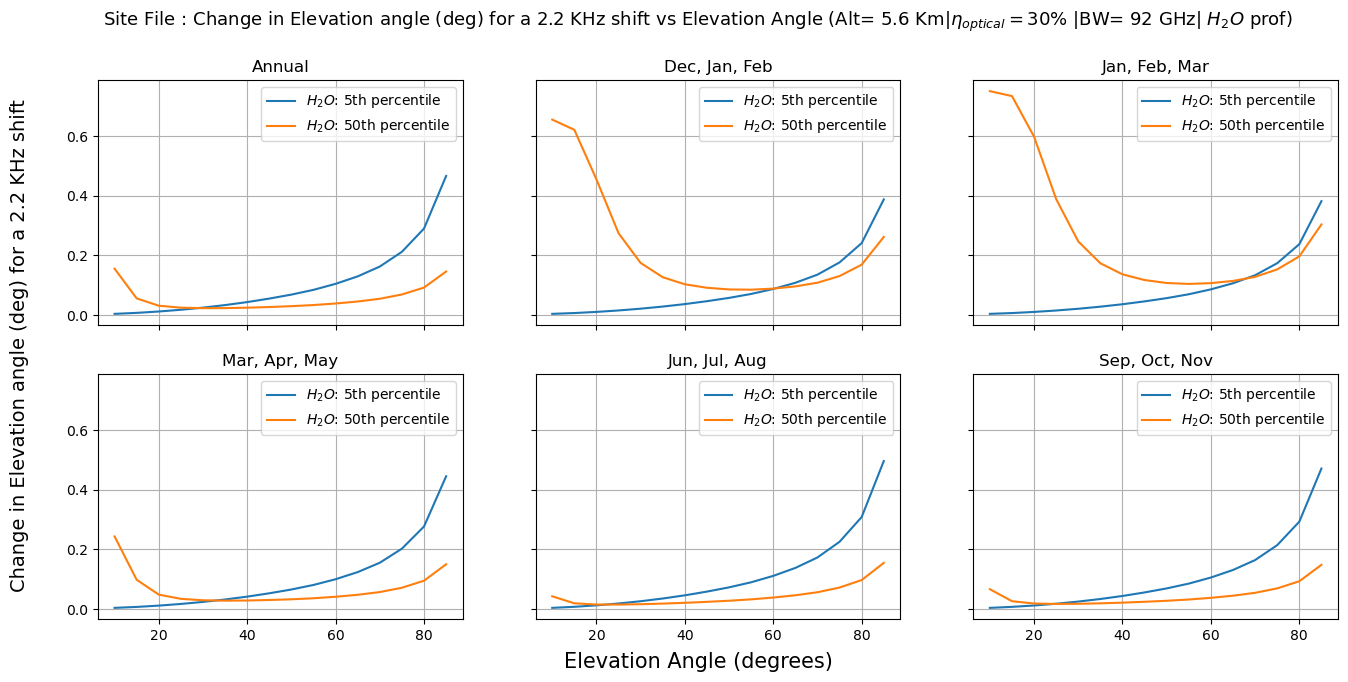

In [154]:
fig, axs = plt.subplots(2,3,sharex=True,sharey=True,figsize=(16,7))

fig.suptitle("Site File : Change in Elevation angle (deg) for a 2.2 KHz shift vs Elevation Angle (Alt= 5.6 Km|$\eta_{optical}=30\% $ |BW= 92 GHz| $H_2O$ prof)",size=13)

axs[0][0].set_title("Annual") 
axs[0][0].plot(ea_CCAT_annual_5_skydip_h20[0:16] ,deg_shifts_CCAT_annual_5_skydip_h20,label ="$H_2O$: 5th percentile")
axs[0][0].plot(ea_CCAT_annual_50_skydip_h20[0:16] ,deg_shifts_CCAT_annual_50_skydip_h20,label ="$H_2O$: 50th percentile")
#axs[0][0].plot(ea_CCAT_annual_95_skydip_h20[0:16] ,deg_shifts_CCAT_annual_95_skydip_h20,label ="$H_2O$: 95th percentile")
axs[0][0].legend()

axs[0][1].set_title("Dec, Jan, Feb")
axs[0][1].plot(ea_CCAT_DJF_5_skydip_h20[0:16] ,deg_shifts_CCAT_DJF_5_skydip_h20,label ="$H_2O$: 5th percentile")
axs[0][1].plot(ea_CCAT_DJF_50_skydip_h20[0:16] ,deg_shifts_CCAT_DJF_50_skydip_h20,label ="$H_2O$: 50th percentile")
#axs[0][1].plot(ea_CCAT_DJF_95_skydip_h20[0:16] ,deg_shifts_CCAT_DJF_95_skydip_h20,label ="$H_2O$: 95th percentile")
axs[0][1].legend()

axs[0][2].set_title("Jan, Feb, Mar")
axs[0][2].plot(ea_CCAT_JFM_5_skydip_h20[0:16] ,deg_shifts_CCAT_JFM_5_skydip_h20,label ="$H_2O$: 5th percentile")
axs[0][2].plot(ea_CCAT_JFM_50_skydip_h20[0:16] ,deg_shifts_CCAT_JFM_50_skydip_h20,label ="$H_2O$: 50th percentile")
#axs[0][2].plot(ea_CCAT_JFM_95_skydip_h20[0:16] ,deg_shifts_CCAT_JFM_95_skydip_h20,label ="$H_2O$: 95th percentile")
axs[0][2].legend()

axs[1][0].set_title("Mar, Apr, May")
axs[1][0].plot(ea_CCAT_MAM_5_skydip_h20[0:16] ,deg_shifts_CCAT_MAM_5_skydip_h20,label ="$H_2O$: 5th percentile")
axs[1][0].plot(ea_CCAT_MAM_50_skydip_h20[0:16] ,deg_shifts_CCAT_MAM_50_skydip_h20,label ="$H_2O$: 50th percentile")
#axs[1][0].plot(ea_CCAT_MAM_95_skydip_h20[0:16] ,deg_shifts_CCAT_MAM_95_skydip_h20,label ="$H_2O$: 95th percentile")
axs[1][0].legend()

axs[1][1].set_title("Jun, Jul, Aug")
axs[1][1].plot(ea_CCAT_JJA_5_skydip_h20[0:16] ,deg_shifts_CCAT_JJA_5_skydip_h20,label ="$H_2O$: 5th percentile")
axs[1][1].plot(ea_CCAT_JJA_50_skydip_h20[0:16] ,deg_shifts_CCAT_JJA_50_skydip_h20,label ="$H_2O$: 50th percentile")
#axs[1][1].plot(ea_CCAT_JJA_95_skydip_h20[0:16] ,deg_shifts_CCAT_JJA_95_skydip_h20,label ="$H_2O$: 95th percentile")
axs[1][1].legend()

axs[1][2].set_title("Sep, Oct, Nov")
axs[1][2].plot(ea_CCAT_SON_5_skydip_h20[0:16] ,deg_shifts_CCAT_SON_5_skydip_h20,label ="$H_2O$: 5th percentile")
axs[1][2].plot(ea_CCAT_SON_50_skydip_h20[0:16] ,deg_shifts_CCAT_SON_50_skydip_h20,label ="$H_2O$: 50th percentile")
#axs[1][2].plot(ea_CCAT_SON_95_skydip_h20[0:16] ,deg_shifts_CCAT_SON_95_skydip_h20,label ="$H_2O$: 95th percentile")
axs[1][2].legend()

# plt.xlabel("Elevation Angle (dgrees)",size=12)
# plt.ylabel("Loading act_freq_shifter (pW) ",size=12)

fig.text(0.5, 0.04, 'Elevation Angle (degrees)', ha='center',size=15)
fig.text(0.07, 0.5, 'Change in Elevation angle (deg) for a 2.2 KHz shift', va='center', rotation='vertical',size=14)


plt.savefig("v1_outputs/Site File(no 95) : Change in Elevation angle (deg) for a 2.2 KHz shift vs Elevation Angle (Alt= 5.6 Km|$\eta_{optical}=30\% $ |BW= 92 GHz| $H_2O$ prof)_V1.jpg",dpi="figure")

plt.show()